## Introduction

### Read Me First

#### Purpose
This notebook covers a variety of technologies relating to deep learning using neural networks. The broad categories are organized by neural network type with various subcategories to describe the technologies therein. Most of the topics in this notebook are derived from the [Deep Learning Specialization on Coursera](https://www.coursera.org/specializations/deep-learning) taught by [Professor Andrew Ng](https://www.andrewng.org/). However, some topics/comments were derived from other books, blogs, and video series.

#### Intended Audience
This is not a comprehensive training guide nor a work of expertise. The author is a newcomer to the world of machine learning. This notebook reflects his personal notes and experiments while studying. Readers should have a good grasp of the technologies as this notebook is designed as a quick reference for ML learners and professionals. Said another way, it should refresh/reinforce to your existing ML knowledge, rather than teach you entirely new things from scratch.

#### About the Author
Nicholas (Nick) Russo, CCDE #20160041 and CCIE #42518 (EI/SP), is an internationally recognized expert in IP/MPLS networking and design. Recently, Nick has been self-studying ML/AI topics to improve his overall technical acumen. Nick also holds a Bachelor's of Science in Computer Science from the Rochester Institute of Technology (RIT). Nick lives in Maryland, USA with his wife, Carla, and daughters, Olivia and Josephine. You can learn more about Nick at his [personal website](https://njrusmc.net/).

#### Required Python imports
Run the code cell below if you intend to run other Python cells later. That code cell notwithstanding, all other code cells are independent. If you are only reading the text and equations, you don't have to run that code cell. Be sure you've already installed the required Python packages: `pip install -r requirements.txt`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## Multi-Layer Perceptron (MLP)

### Matrix shapes

#### Overview
This section describes the shape (dimensions) of common matrices in a neural network.

#### X: Input dataset
Each column is a training example and each row is a feature. The transpose of this matrix is used for linear and logistic regression analyses with sklearn. The number of training examples is $m$ and the number of input features is either $n_0$ or $n_x$. If each training example is a multi-dimensional array, such as a grayscale image (2D: length x width) or color image (3D: length x width x 3 RBG channels), it must be unrolled into a column vector whereby the number of rows is equal to the production of all dimensions.

It is common to vertically split $X$ into 3 parts after shuffling the examples: training, validating, and testing. Typical percentage splits between $J_{train}$/$J_{cv}$/$J_{test}$ are 70/15/15 or 60/20/20. As the number of training examples increases, $J_{train}$ can also increase. If there are millions of examples, a 98/1/1 split may be adequate.

$$
X ({n_0}, m) = A^{[0]} =
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
$$

#### Y: Expected outputs/labels
For linear and logistic regression problems, there will be a "right answer" corresponding to each training example. These neural networks will have a single unit in the output layer $(n_L=1)$. A multi-class problem (e.g. softmax) will also have one label per training example, although it is commonly one-hot encoded (OHE) into one label per class, represented by rows. This corresponds to one unit per class in the output layer of the neural network. Likewise, a multi-label problem (e.g. many yes/no questions at once) will have a similar shape, albeit without the one-hot restriction. Predictions/inferences from the model are stored in $\hat{y}$ or "y-hat" which always has the same shape as $y$ once OHE, if required, is complete.

$$
Y_{singleclass} (1, m) =
\begin{bmatrix}
y^{(1)} & y^{(2)} & \cdots & y^{(m)}
\end{bmatrix}
$$

$$
y_{multiclass} (n_L, m) =
\begin{bmatrix}
y^{(1)}_1 & y^{(2)}_1 & \cdots & y^{(m)}_1 \\
y^{(1)}_2 & y^{(2)}_2 & \cdots & y^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{n_L} & y^{(2)}_{n_L} & \cdots & y^{(m)}_{n_L}
\end{bmatrix}
$$

#### W: Weights
Each value corresponds to an edge, interconnecting units from the current layer to units in the previous layer. The rows correspond to the current layer's units while the columns correspond to the previous layer's units. Note that this matrix is a function of the neural network architecture and not a function of the training example quantity. No $W$ matrix ever has a dimension of $m$.

$$
W^{[l]} (n_l, {n_{l-1}}) =
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
$$

#### b: Biases
A column vector with a value for each unit in the current layer. Like weights, the shape of this matrix depends upon the neural network's architecture (current layer only) and not the number of training examples $m$.

$$
b^{[l]} (n_l, 1)=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l} \\
\end{bmatrix}
$$

#### Z: Linear outputs
The algebraic combination of weights, biases, and previous layer activations. At the first layer, the previous layer activations is equal to $X$, the input data. Each column corresponds to a training example just like $X$ and $Y$ while the rows correspond to the number of units in the current layer.

$$
Z^{[l]} (n_l, m)=
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
$$

#### A: Activations
A transform function that enables a layer to represent the linear output in a more meaningful way to the next layer. Same shape as $Z$.

$$
A^{[l]} (n_l, m)=
\begin{bmatrix}
a^{(1)}_1 & a^{(2)}_1 & \cdots & a^{(m)}_1 \\
a^{(1)}_2 & a^{(2)}_2 & \cdots & a^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
a^{(1)}_{n_l} & a^{(2)}_{n_l} & \cdots & a^{(m)}_{n_l}
\end{bmatrix}
$$

### Categorical Feature Encoding

#### Overview
Sometimes features (rows of $X$ or $Y$) are represented by non-numeric identifiers, such as strings. This section explains how such data can be encoded in a machine-friendly format.

#### Ordinal Encoding
Ordinal encoding maps each unique string into a unique number. Such a technique is useful for decision trees or other algorithms that can learn/split on categorical values. It also works well when there is an intrinsic order to the categories, such as small (1), medium (2) and large (3). Ordinal encoding is sometimes known as "label encoding", not to be confused with the expected output labels of $Y$.

Consider $X$ with 3 features: height in inches, weight in pounds, and T-shirt size. Ordinal encoding answers the open-ended question in a single row of $X$: "What is the T-shirt size?"

$$
X =
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
\text{small} & \text{medium} & \text{small} & \cdots & \text{large}
\end{bmatrix}
\verb|--(ordinal_encode)-->|
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
1 & 2 & 1 & \cdots & 3
\end{bmatrix}
$$

Ordinal encoding does not require a meaningful amount of additional disk space or memory as it does not change the dimensionality of the source matrix. However, it's a poor choice for nominal, unorderable features. For example, the average of man (1), bear (2), pig (3) would be bear (2), which doesn't make sense.

The snippet below maps each color to an integer using the `c2i` dictionary, which must have unique values. This could be done dynamically but is statically defined for simplicity. The strings of `X` are mapped to their integer equivalents in `X_int`. Then, a new matrix `X_ord` is created from `X` but excludes the last row containing strings. The new `X_int` row vector is concatenated to the bottom of `X_ord`, yielding the correct result.

In [51]:
c2i = {
    "small": 0,
    "medium": 1,
    "large": 2
}

assert len(c2i.keys()) == len(set(c2i.values()))

X = np.array([
    [60, 65, 62, 70],
    [100, 140, 110, 180],
    ["small", "medium", "small", "large"],
], dtype=object)

X_int = np.array([[c2i[color] for color in X[2]]])
X_ord = X[:-1].astype(int)
X_ord = np.concatenate((X_ord, X_int), axis=0)

print(f"X\n{X}\n")
print(f"X_ord\n{X_ord}")

X
[[60 65 62 70]
 [100 140 110 180]
 ['small' 'medium' 'small' 'large']]

X_ord
[[ 60  65  62  70]
 [100 140 110 180]
 [  0   1   0   2]]


#### One-hot Encoding (OHE)
One-hot encoding can be applied to features of $X$ or $Y$ (rows) to create a binary representation of the classes. Each training example in $X$ or label in $Y$ (columns) will have a single 1 with all other values set to 0.

For input features of $X$, OHE works better for nominal categories whereby there is no implicit ordering, such as the eeye colors of brown, blue, and green. Unlike T-shirt sizes, eye color is unlikely to be correlated with height or weight, and there is no direct comparison between the colors. A new feature is created for each possible category, which each answer a binary question:
  1. Is the eye color brown?
  2. Is the eye color blue?
  3. Is the eye color green?

Consider $X$ with 3 features: height in inches, weight in pounds, and eye color.

$$
X =
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
\, \text{brown} & \text{green} & \text{brown} & \cdots & \text{blue}\, 
\end{bmatrix}
\, \verb|--(one_hot_encode)-->|\, 
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
1 & 0 & 1 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 1 \\
0 & 1 & 0 & \cdots & 0
\end{bmatrix}
$$

For output features of $Y$, OHE is the preferred approach for softmax regression as each training example will correspond to a prediction containing $N$ different probabilities where $N$ is the number of categories. This is the structure of $\hat{Y}$. Consider $Y$ that corresponds with the $X$ example above containing height in inches, weight in pounds, and eye color. The model predicts hair color based on those inputs, selecting from the colors of black, brown, or blonde ($N=3$). A new feature is created for each possible category, which answers a binary question:
  1. Is the hair color black?
  2. Is the hair color brown?
  3. Is the hair color blonde?

$$
Y =
\begin{bmatrix}
\, \text{black} & \text{brown} & \text{black} & \cdots & \text{blonde}\, 
\end{bmatrix}
\, \verb|--(one_hot_encode)-->|\, 
\begin{bmatrix}
1 & 0 & 1 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
$$

The one-hot encoded version of $Y$ is now directly comparable with the softmax predictions $\hat{Y}$. This simplifies the cost calculation its corresponding derivatives.

The benefit of OHE is that it allows most machine learning algorithms, such as those used in neural networks, to train on nominal categories. The drawback is the increase in dimensionality. For a large number of input categories, the number of rows in $X$ (features) increases rapidly. At a minimum, this requires a large input layer to account for these features of $X$, increeasing the size of $W[1]$ and $b[1]$. Likewise, many output categories increases the number of rows of $Y$, thus increasing the size of $W[L]$ and $b[L]$. Training such a model may be more computationally expensive and require more time.

The snippet below maps each color to an integer using the `c2i` dictionary, which must have unique values. This could be done dynamically but is statically defined for simplicity. The strings of `y_str` are mapped to their integer equivalents in `y_int`. A matrix of zeros of shape $(k, m)$ where $k=3$ is total number of classes. To compute OHE, each row represents a class, so iterate over the training examples $m$ (columns) and assign a value of 1 to the cell at the intersection point.

In [50]:
c2i = {
    "black": 0,
    "brown": 1,
    "blonde": 2
}

assert len(c2i.keys()) == len(set(c2i.values()))

y_str = ["black", "brown", "black", "blonde"]
y_int = np.array([c2i[color] for color in y_str]) 
y_ohe = np.zeros((len(c2i), y_int.size), dtype=int) 
y_ohe[y_int, np.arange(y_int.size)] = 1

print(f"y_str\n{y_str}\n")
print(f"y_int\n{y_int}\n")
print(f"y_ohe\n{y_ohe}")

y_str
['black', 'brown', 'black', 'blonde']

y_int
[0 1 0 2]

y_ohe
[[1 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


### Principal Component Analysis (PCA)

#### Overview
This unsupervised machine learning algorithm is not directly related to neural networks. However, it is commonly used to visualize the input data $X$. When $X$ has many features, PCA can compress the data to reduce the number of features. Visualizing highly dimensional data in 2 or 3 dimensions helps engineers surface correlations and patterns. PCA's ability to reduce dimensionality also reduces the computing time and power required to train a neural network.

In practice, PCA is more commonly used for visualization/exploration. It is less commonly used to speed up training as this reduction does cause some loss of granularity/variance, leading to worse predictions. Given the computing resources available in modern times, compressing the input data is less important than it was in years past.

Some practitioners have suggested using PCA to reduce dimensionality when one-hot encoding (OHE) is in use. For example, applying OHE to a classification with 4 choices only yields 4 features. Apply the same logic to a country code may yield 200 features. This explosion of data may not have much predictive relevance for the model; reducing it with PCA might be worthwhile.

#### Data Visualization
Suppose we have this input data matrix $X$, which compares the height, shoulder width, hip circumference, weight, and body fat percentange for several human adults. As is typical with deep network input matrices, these features are listed along the rows. Lengths are measured in inches and weights are measured in pounds. Columns identify training examples. This is the standard $(n,m)$ structure used for deep learning.

The final row identifies whether the person is a man (1)or not (0), which are labels of vector $y$. For simplicity, the first 10 are men and the last 10 are not men.

|         |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |  12 |  13 |  14 |  15 |  16 |  17 |  18 |  19 |  20 | 
| ------- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Height  |  71 |  68 |  64 |  61 |  70 |  74 |  69 |  65 |  62 |  66 |  49 |  52 |  55 |  50 |  51 |  50 |  53 |  54 |  55 |  53 |
| S width |  14 |  15 |  16 |  14 |  14 |  18 |  17 |  17 |  16 |  18 |  12 |  15 |  15 |  14 |  14 |  16 |  12 |  14 |  12 |  16 |
| H circ  |  40 |  41 |  40 |  41 |  37 |  37 |  40 |  40 |  38 |  41 |  39 |  41 |  41 |  36 |  39 |  40 |  39 |  41 |  36 |  37 |
| Weight  | 180 | 173 | 170 | 145 | 190 | 255 | 212 | 168 | 140 | 225 | 100 | 120 | 155 | 105 |  98 | 131 | 116 | 130 | 170 | 127 |
| BFat %  |  13 |  16 |  12 |  12 |  13 |  25 |  11 |  10 |  14 |  18 |  23 |  23 |  29 |  31 |  22 |  25 |  29 |  31 |  30 |  22 |
| IS MAN? |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   1 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |

The code below defines the input matrix $X$. Many of the features within scikit-learn (`sklearn`) require the rows of $X$ to represent training examples and the columns to represent features. Therefore, we first transpose $X$ to achieve a shape of $(m,n)$. Note that the label vector $y$ remains undefined as labels do not factor into PCA.

You must first decide how many principal components (PCs) are required. Each PC is ranked by magnitude of explained variance. That is to say, PC1 will always explain the greatest amount of variance in the training data, with PC2 explaining the second greatest amount, etc. In data sets where correlation between features is high, a small number of PCs can capture most of the variance. In noisier data sets with weaker correlation between features, more PCs are required to capture most of the variance.

In this example, PC1 explains nearly all of the variance with PC2 contributing a small amount. Together, these two PCs account for more than 99% of the variance. Although the data set $X$ had 5 unique features, PCA has reduced it to 2 features while still retaining the vast majority of the variance. This is because many of the features are highly correlated, such as height and weight, weight and body fat, etc. Some features, such as hip circumference (at least in this fabricated example) do not appear predictive. They likely correlated poorly to other features as the mean values are similar for "men" and "not men" labels.

In [2]:
X = np.array([
    [71, 68, 64, 61, 70, 74, 69, 65, 62, 66, 49, 52, 55, 50, 51, 50, 53, 54, 55, 53],
    [14, 15, 16, 14, 14, 18, 17, 17, 16, 18, 12, 15, 15, 14, 14, 16, 12, 14, 12, 16],
    [40, 41, 40, 41, 37, 37, 40, 40, 38, 41, 39, 41, 41, 36, 39, 40, 39, 41, 36, 37],
    [180, 173, 170, 145, 190, 255, 212, 168, 140, 225, 100, 120, 155, 105, 98, 131, 116, 130, 170, 127],
    [13, 16, 12, 12, 13, 25, 11, 10, 14, 18, 23, 23, 29, 31, 22, 25, 29, 31, 30, 22],
])
X = X.T
pca_2 = PCA(n_components=2)
pca_2.fit(X)
for i, evr in enumerate(pca_2.explained_variance_ratio_):
    print(f"PCA {i+1} explained variance ratio: {(evr * 100):.4f}%")
print(f"Total variance retained by PCA: {(np.sum(pca_2.explained_variance_ratio_) * 100):.4f}%")

PCA 1 explained variance ratio: 96.6138%
PCA 2 explained variance ratio: 2.8472%
Total variance retained by PCA: 99.4611%


To visualize the data, use a scatterplot. This one is enhanced with color-coding based on the expected label; again, labels have no influence over PCA. This helps emphasize the diagonal decision boundary separating "men" from "not men". It is also not common to annotate individual points with their example number. Doing so here helps further reinforce the visualization of the clusters.

By definition, PC1 accounts for a greater share of the variance than PC2. The difference between the leftmost (15) and rightmost (6) values is about 160 along the PC1 axis. The difference between the topmost (19) and bottommost (8) is about 22 along the PC2 axis. If we completely ignored PC2 and only projected all the points onto a number line representing PC1, we still have a pretty good idea of how the data separates. However, adding the second dimension with the PC2 axis gives us a clearer picture. It also helps to draw a better decision boundary.

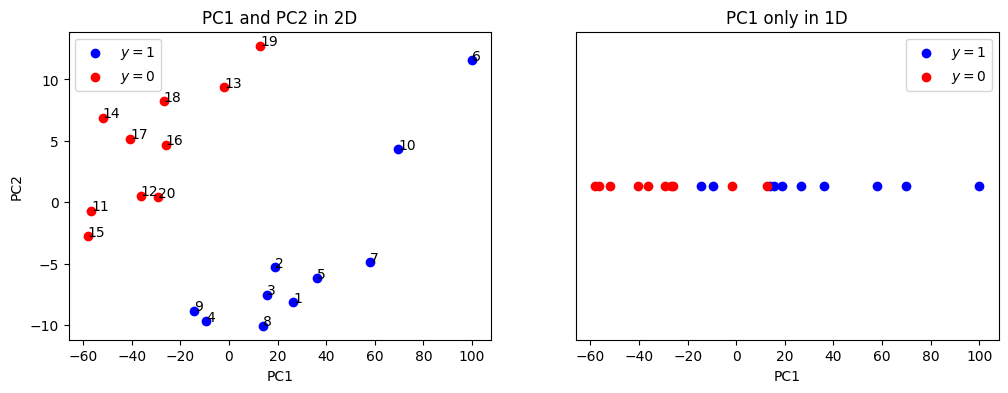

In [3]:
X_pca_2 = pca_2.transform(X)
pc1 = X_pca_2[:, 0]
pc2 = X_pca_2[:, 1]

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].scatter(pc1[:10], pc2[:10], color="b", label=r"$y=1$")
ax[0].scatter(pc1[10:], pc2[10:], color="r", label=r"$y=0$")
ax[0].set_xlabel("PC1"); ax[0].set_ylabel("PC2")
ax[0].set_title("PC1 and PC2 in 2D"); ax[0].legend()
for i in range(X.shape[0]):
    ax[0].annotate(i+1, (pc1[i], pc2[i]))

ax[1].scatter(pc1[:10], np.zeros(10), color="b", label=r"$y=1$")
ax[1].scatter(pc1[10:], np.zeros(10), color="r", label=r"$y=0$")
ax[1].set_xlabel("PC1"); ax[1].get_yaxis().set_visible(False)
ax[1].set_title("PC1 only in 1D"); ax[1].legend()

#### Simplified Supervised Training
The `transform()` function performs dimensionality reduction after the PCs have been discovered by the `fit()` function. The code below compares a logistic regression model trained on all features of $X$, versus another logistic regression model trained on the PCA-reduced dimensions of $X$. Because the PCs represent more than 99% of the variance, we expect both models to perform about the same, with the PCA-trained model performing slightly worse. Whenever you compress data using PCA, you forfeit a bit of granularity for a significant decrease in dimensionality (at least in theory).

There are 4 example queries shown below. The first 2 are "men" and the second 2 are "not men". When making predictions with a PCA-trained model, one must transform the input query (containing all 5 features) into a PCA-compatible query containing only 2 features represented by PCs. Behind the scenes, PCA applies Z-score normalization (standardization) to the data; this is also required at prediction time, hence the call to `transform()`. In this simple test, both models get all 4 predictions correct.

In [4]:
from sklearn import linear_model

queries = [
    [[70, 15, 42, 195, 16]], # is a man, y=1
    [[67, 14, 39, 180, 13]], # is a man, y=1
    [[56, 14, 39, 110, 20]], # not a man, y=0
    [[60, 12, 45, 130, 22]], # not a man, y=0
]
y = np.concatenate((np.ones(10), np.zeros(10)))

# training with full-featured X
full_logreg = linear_model.LogisticRegression()
print("Full X shape:", X.shape)
full_logreg.fit(X, y)
for query in queries:
    print(query, bool(full_logreg.predict(query)[0]))

# training with X after transform with 2 PCAs
pca_logreg = linear_model.LogisticRegression()
print("\nPCA2 X shape:", X_pca_2.shape)
pca_logreg.fit(X_pca_2, y)
for query in queries:
    # must transform query based on PCA values (mean, etc).
    pca_2_query = pca_2.transform(query)
    print(query, bool(pca_logreg.predict(pca_2_query)[0]))

Full X shape: (20, 5)
[[70, 15, 42, 195, 16]] True
[[67, 14, 39, 180, 13]] True
[[56, 14, 39, 110, 20]] False
[[60, 12, 45, 130, 22]] False

PCA2 X shape: (20, 2)
[[70, 15, 42, 195, 16]] True
[[67, 14, 39, 180, 13]] True
[[56, 14, 39, 110, 20]] False
[[60, 12, 45, 130, 22]] False


#### Limitations
PCA has several limitations. Because the purpose of PCA is to find correlations between sets of features, no/weak correlation makes PCA ineffective. The PCs would only account for small amounts of the variance.

The PCs are linear combinations of numbers which makes it hard to determine which original features contribute most to a given PC. Due to PCA's linear nature, it is not effective at measuring non-linear relationships between features. Consider scaling your data using exponential (logarithmic curve to line) or logarithmic (exponential curve to line) transforms to make it linear before running PCA. 

### Normalization

#### Overview
This section describes normalizers used for feature or neural network layer scaling. For all methods, be sure to apply normalization when making predictions using the same computed values (such as $\mu$, $\sigma$, and various minimums/maximums) to the new input. Normalization is not applied to categorical features of $X$ or labels of $\hat{Y}$.

The main benefit is that the ranges between values of a feature, and between features, will shrink. This allows you to use a larger learning rate $\alpha$ in gradient descent, reducing both time and computational energy required to train a model.

#### Z-score
Given $\vec{x}$, this method subtracts the mean $\mu$ then divides by the standard deviation $\sigma$ (not related to sigmoid activation function). This is most commonly used for general features, although may perform poorly with some extreme outliers. The mean is 0 and the standard deviation is 1. Positive numbers represent values above the mean while negative numbers represent values below the mean. It is also called "standardization" or "the standard scaler".

$$
\begin{aligned}
\mu & = \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\sigma & = \sqrt{\frac{1}{n} \cdot \sum\limits^n_{i=1}{(x_i)}^2} \\
\vec{x}' & = \frac{\vec{x}-\mu}{\sigma}
\end{aligned}
$$

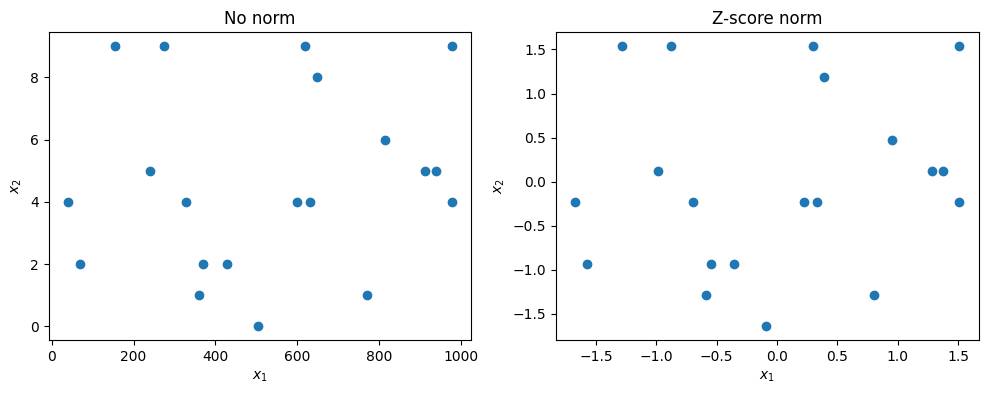

In [23]:
def zscore_norm(xvec):
    return (xvec - np.mean(xvec)) / np.std(xvec)

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].scatter(x_1, x_2)  # same as: ax[0].plot(x_1, x_2, linestyle="", marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Z-score norm")
ax[1].scatter(zscore_norm(x_1), zscore_norm(x_2))

#### Clipping
Given $\vec{x}$ plus user-defined minimum and maximum thresholds, this method assigns extremely large outliers to the maximum and extremely small outliers to the minimum. Unlike the other methods, this only modifies a subset of values and may have no effect if the dataset lacks outliers.

$$
\vec{x}' =
\begin{cases}
x > \text{user}_{\text{max}}: & x := \text{user}_{\text{max}} \\
x < \text{user}_{\text{min}}: & x := \text{user}_{\text{min}}
\end{cases}
$$

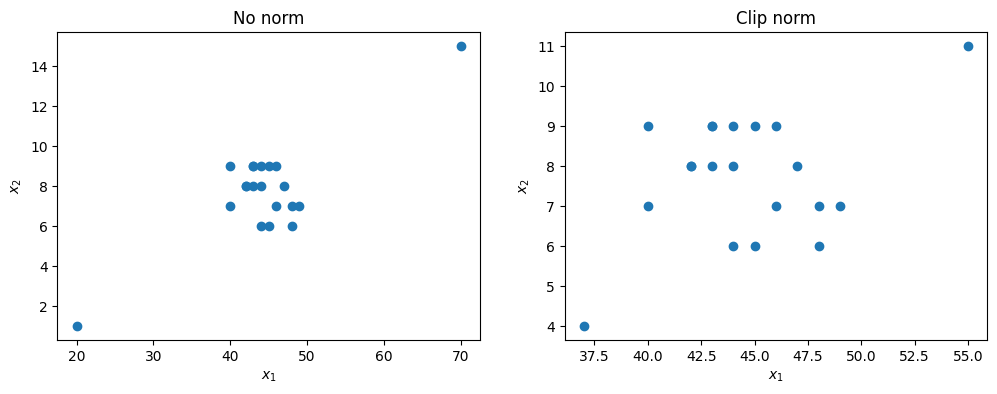

In [24]:
def clip_norm(xvec, umin, umax):
    xnew = np.copy(xvec)
    xnew[xvec > umax] = umax
    xnew[xvec < umin] = umin
    return xnew

x_1 = np.random.randint(40, 50, (18,))
x_1 = np.append(x_1, 20)
x_1 = np.append(x_1, 70)
x_2 = np.random.randint(5, 10, (18,))
x_2 = np.append(x_2, 1)
x_2 = np.append(x_2, 15)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].scatter(x_1, x_2)

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Clip norm")
ax[1].scatter(clip_norm(x_1, 37, 55), clip_norm(x_2, 4, 11))

#### Mean
Given $\vec{x}$, this method subtracts the mean $\mu$, then divides by the difference between the largest and smallest values within $\vec{x}$. The values always sum to 0 with a maximum span of 1 between smallest and largest values. In other words, ${x_{\text{max}}-x_{\text{min}}} = 1$ after normalization. Because the values cluster near the origin, they are all relatively small.

$$
\begin{aligned}
\mu & = \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\vec{x}' & = \frac{\vec{x}-\mu}{x_{\text{max}}-x_{\text{min}}}
\end{aligned}
$$

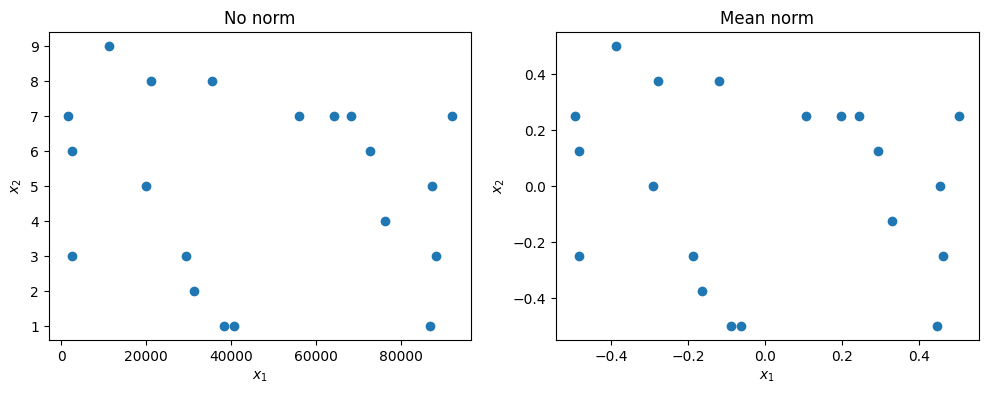

In [26]:
def mean_norm(xvec):
    return (xvec - np.mean(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 100000, (20,))
x_2 = np.random.randint(0, 10, (20,))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].scatter(x_1, x_2)

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Mean norm")
ax[1].scatter(mean_norm(x_1), mean_norm(x_2))

#### Linear
Given $\vec{x}$, this method subtracts the smallest value within $\vec{x}$, then divides by the difference between the largest and smallest values within $\vec{x}$. It works when the feature is uniformly distributed (evenly spaced) across a range. Results are guaranteed to be between 0 and 1. It is sometimes called "min max" normalization as well.

$$
\vec{x}' = \frac{\vec{x}-x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}
$$

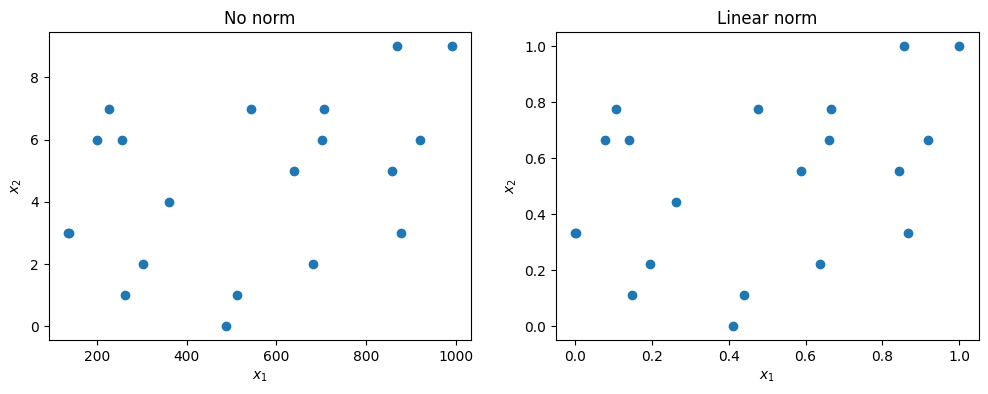

In [27]:
def linear_norm(xvec):
    return (xvec - np.min(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].scatter(x_1, x_2)

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Linear norm")
ax[1].scatter(linear_norm(x_1), linear_norm(x_2))

#### Logarithmic
Given $\vec{x}$ and a user-specific log base $b$, this method applies a logarithm to "power law" feature values (ie, it looks like $f(x) = \frac{1}{x}$ on a plot). The result is data better suited to linear arithmetic. Cannot be used with input value of 0 unless this case is explicitly handled in the implementation.

$$
\vec{x}' = \log_b(\vec{x})
$$

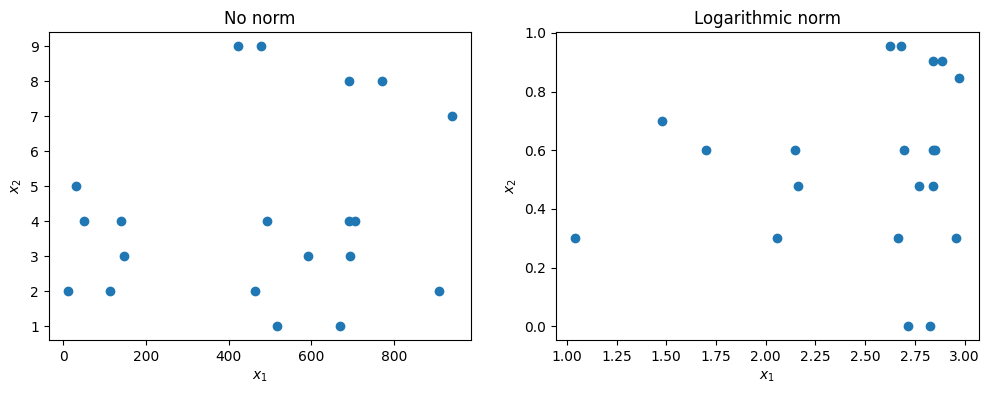

In [29]:
def logarithmic_norm(xvec, base=10):
    return np.emath.logn(base, xvec)

x_1 = np.random.randint(1, 1000, (20,))
x_2 = np.random.randint(1, 10, (20,))

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].scatter(x_1, x_2)

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Logarithmic norm")
ax[1].scatter(logarithmic_norm(x_1), logarithmic_norm(x_2))

#### Batch
Just as with $X$, layered outputs within a neural network can be normalized. It is possible to apply this normalization to the linear output $Z^{[l]}$ or the activation output $A^{[l]}$, although it is more commonly applied to $Z^{[l]}$. You could replace all instances of $Z^{[l]}$ with $A^{[l]}$ in these equations to batch normalize the results after activation.

For every feature $_j$ of $Z^{[l]}$ (which corresponds to a unit in that layer), compute the mean $\mu$ and variance $\sigma^2$.

$$
\begin{aligned}
\mu & = \frac{1}{m} \cdot \sum\limits_{j=1}^m Z^{[l]}_j \\
\sigma^2 & = \frac{1}{m} \cdot \sum\limits_{j=1}^m (Z^{[l]}_j - \mu)^2 \\
\end{aligned}
$$

Then, normalize $Z^{[l]}_j$ to yield $Z^{[l]\text{norm}}_j$ which has a mean of 0 in a variance of 1 for each feature. The presence of $\varepsilon$ is for numeric stability and has an infinitesimal impact on the mean and variance just described. Two additional per-layer parameters, $\gamma^{[l]}$ and $\beta^{[l]}$, are introduced to further transform the result. To retain a mean of zero, in a variance of one, use $\gamma^{[l]}=1$ and $\beta^{[l]}=0$. To nullify the batch normalization process entirely, use $\gamma^{[l]}=\sqrt{\sigma^2 + \varepsilon}$ and $\beta^{[l]}=\mu$. Like the weights $W^{[l]}$ and biases $b^{[l]}$, $\gamma^{[l]}$ and $\beta^{[l]}$ are learnable. Finally, all of $\tilde{Z}^{[l]}$ becomes an input to the activation function $g()$ and the process continues as usual.

$$
\begin{aligned}
Z^{[l]\text{norm}}_j & = \frac{Z^{[l]}_j - \mu}{\sqrt{\sigma^2 + \varepsilon}} \\
\tilde{Z}^{[l]}_j & = (\gamma^{[l]} \cdot Z^{[l]\text{norm}}_j) + \beta^{[l]} \\
A^{[l+1]} & = g(\tilde{Z}^{[l]})
\end{aligned}
$$

Note that bias $b^{[l]}$ becomes irrelevant with batch normalization because the mean $\mu$ is set to 0. Instead, $\beta^{[l]}$ serves as the per-unit offset. You can either set all biases to 0 or remove it from your algorithm entirely. Like the bias matrix $b^{[l]}$, both $\gamma^{[l]}$ and $\beta^{[l]}$ are applied unit-wise and thus have a shape of $(n_l, 1)$. Additionally, batch normalization has a slight regularizing effect when combined with mini-batch gradient descent. Due to the scaling by the mean $\mu$ and variance $\sigma^2$ of a mini-batch (which doesn't represent all of $X$), the precise activation values become noisier. The smaller the mini-batch size, the greater the regularization effect.

To make predictions when mini-batches are use, we must estimate $\mu$ and $\sigma^2$ since the values computed for a single mini-batch cannot be used at test time. Instead, use an EWMA across the $\mu$ and $\sigma^2$ values for each mini-batch. These are non-learnable parameters of the algorithm.

### Weight Initialization

#### Overview
Proper initialization of weights is necessary to prevent exploding and vanishing gradient problems in deep neural networks (those with many layers). Derivatives used during back propagation can become too large (exploding), which causes divergence, if the weights are initialized too large. They can also become too small (vanishing), which causes an inability to converge, if the weights are initialized too small. Initializing the weights with values slightly less than 1 and slightly greater than 1 mitigates the problem, although does not completely solve it.

Additionally, weight initialization avoids the "symmetry" problem whereby by every units learns the same thing, reducing the entire neural network to a single unit. Such a model is only as powerful as linear or logistic regression in isolation. Note that you can also initialize biases the same way. It is common to initialize biases to zero as this will not inhibit a model's ability to learn.

In the formulas that follow, $\mathcal{N}$ refers to a normal (Gaussian) distribution of random values matching the proper matrix shape at a given layer.

#### Xavier
This method works best on layers using the linear, sigmoid, tanh, or softmax activation functions. As $n_{l-1}$ increases (which represents a more populous previous layer), the resulting vector values creep closer to zero.

$$
W^{[l]}_{\text{init}} = \mathcal{N} \cdot \sqrt{\frac{1}{n_{l-1}}}
$$

In [10]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(1/prev_n)}")

norm distro
[[-0.90118406 -1.75974916 -0.0634446   0.33696373  0.10878533]
 [-0.49587235  0.43900268  0.81979572  0.33328487  0.64749804]]

n_l-1 = 10
[[-0.28497942 -0.55648154 -0.02006294  0.10655729  0.03440094]
 [-0.15680861  0.13882484  0.25924217  0.10539393  0.20475686]]

n_l-1 = 20
[[-0.20151088 -0.39349187 -0.01418664  0.07534738  0.02432514]
 [-0.11088043  0.09816398  0.1833119   0.07452476  0.14478496]]

n_l-1 = 50
[[-0.12744667 -0.24886611 -0.00897242  0.04765387  0.01538457]
 [-0.07012694  0.06208435  0.11593662  0.0471336   0.09157005]]


#### Normalized Xavier
This method is similar to Xavier except it considers both the input and output unit counts (sometimes called "fan in" and "fan out") between layers. If these two terms are equal, it yields identical results as Xavier. As the $(n_{l-1} + n_l)$ denominator term increases, the resulting vector values creep closer to zero.

$$
W^{[l]}_{\text{init}} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1} + n_l}}
$$

In [11]:
norm = np.random.randn(2, 5)
cur_n = 20
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}, n_l = {cur_n}\n{norm * np.sqrt(2/(prev_n + cur_n))}")

norm distro
[[ 0.43103391 -0.1051166  -0.24698433  0.17393808 -1.31413967]
 [ 0.56163933 -0.5279348  -0.54955077 -0.62292866  1.27631776]]

n_l-1 = 10, n_l = 20
[[ 0.11129248 -0.02714099 -0.06377108  0.04491062 -0.3393094 ]
 [ 0.14501465 -0.13631218 -0.1418934  -0.16083949  0.32954383]]

n_l-1 = 20, n_l = 20
[[ 0.09638211 -0.02350479 -0.05522738  0.03889374 -0.29385056]
 [ 0.12558637 -0.11804981 -0.12288329 -0.13929108  0.28539333]]

n_l-1 = 50, n_l = 20
[[ 0.07285803 -0.01776795 -0.04174797  0.0294009  -0.22213015]
 [ 0.09493437 -0.08923727 -0.09289103 -0.10529416  0.21573708]]


#### He 何
This method works best on layers using the ReLU activation function (and its variants). It is very similar to Xavier except uses 2 as the numerator instead of 1. This yields slightly smaller movements towards zero when compared to Xavier given the larger numerator.

$$
W^{[l]}_{\text{init}} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1}}}
$$

In [12]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(2/prev_n)}")

norm distro
[[-0.29570014 -0.49784357  0.84205155  0.2185271  -1.40454913]
 [ 0.74344045 -0.73019334 -0.88484265  0.88511495  0.8202679 ]]

n_l-1 = 10
[[-0.13224112 -0.22264241  0.3765769   0.09772829 -0.62813347]
 [ 0.33247668 -0.32655239 -0.39571366  0.39583544  0.36683496]]

n_l-1 = 20
[[-0.09350859 -0.15743196  0.26628008  0.06910434 -0.44415743]
 [ 0.23509651 -0.23090741 -0.27981181  0.27989792  0.25939149]]

n_l-1 = 50
[[-0.05914003 -0.09956871  0.16841031  0.04370542 -0.28090983]
 [ 0.14868809 -0.14603867 -0.17696853  0.17702299  0.16405358]]


### Activation Functions

#### Overview
This section describes activation functions applied to the linear outputs $Z$ to yield $A$, plus their derivatives. Note that the following generic, non-annotated, non-vectorized formula is true for all activations. The superscripts and subscripts may vary as the context changes. This equation is not repeated for individual activation summaries below.

$$
z = w \bullet x + b
$$

#### Linear/None
Returns the input $z$ unchanged. Not useful in a hidden layer, but could be used at the final layer for linear regression.

$$
\begin{aligned}
g(z) & = z \\
\frac{\partial g(z)}{\partial z} & = 1
\end{aligned}
$$

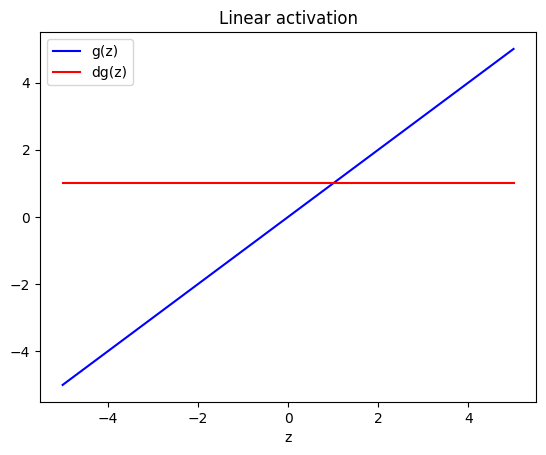

In [30]:
def g_linear(z):
    return z

def dg_linear(z):
    return np.ones(z.shape)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_linear(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_linear(z_in), color="r", label="dg(z)")
plt.title("Linear activation"); plt.xlabel("z"); plt.legend()

#### Sigmoid
Returns values between 0 and 1 with most values being close to those two asymptotes. This value corresponds to the probability that $y = 1$. Typically used in the final layer for logistic regression (binary classification).

$$
\begin{aligned}
g(z) & = \frac{1}{1+e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = g(z) \cdot (1 - g(z))
\end{aligned}
$$

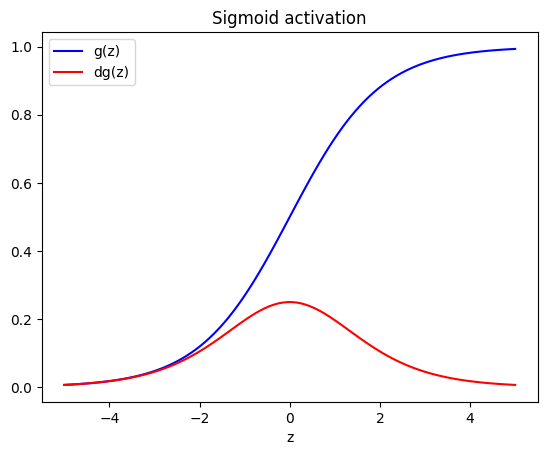

In [31]:
def g_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dg_sigmoid(z):
    gz = g_sigmoid(z)
    return np.multiply(gz, 1 - gz)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_sigmoid(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_sigmoid(z_in), color="r", label="dg(z)")
plt.title("Sigmoid activation"); plt.xlabel("z"); plt.legend()

#### Rectified Linear Unit (ReLU)
Like the linear activation, returns the input $z$ unchanged when $z$ is positive. When $z$ is negative, returns 0. The function is technically undefined when $z = 0$, but most implementations will return 0 for simplicity.

$$
\begin{aligned}
g(z) & =
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} & =
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & 1
\end{cases}
\end{aligned}
$$

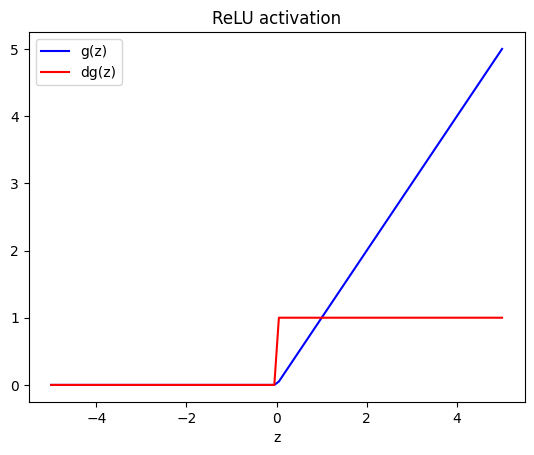

In [32]:
def g_relu(z):
    return z * (z > 0)

def dg_relu(z):
    return 1.0 * (z > 0)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_relu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_relu(z_in), color="r", label="dg(z)")
plt.title("ReLU activation"); plt.xlabel("z"); plt.legend()

#### Leaky ReLU
Like the ReLU activation, except when $z$ is negative, returns a small positive number. This allows $z$ values to be preserved but heavily discounted.

$$
\begin{aligned}
g(z) & =
\begin{cases}
z \lt 0: & 0.01z \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} & =
\begin{cases}
z \lt 0: & 0.01 \\
z \ge 0: & 1
\end{cases}
\end{aligned}
$$

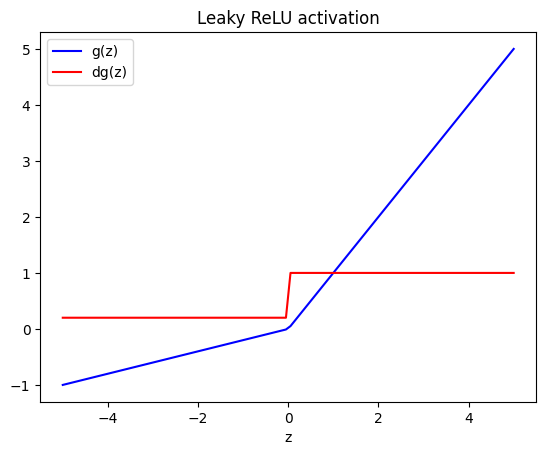

In [33]:
# Note: Large neg_slope used for visual aid only

def g_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, z, neg_slope * z)

def dg_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, 1, neg_slope)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_leakyrelu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_leakyrelu(z_in), color="r", label="dg(z)")
plt.title("Leaky ReLU activation"); plt.xlabel("z"); plt.legend()

#### Hyperbolic tangent (tanh)
Similar in shape to the sigmoid function, it returns values between -1 and 1. The theoretical mean of the activation results is closer to 0, compared to 0.5 with sigmoid.
$$
\begin{aligned}
g(z) & = \frac{e^z - e^{-z}}{{e^z} + e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = 1 - g(z)^{2}
\end{aligned}
$$

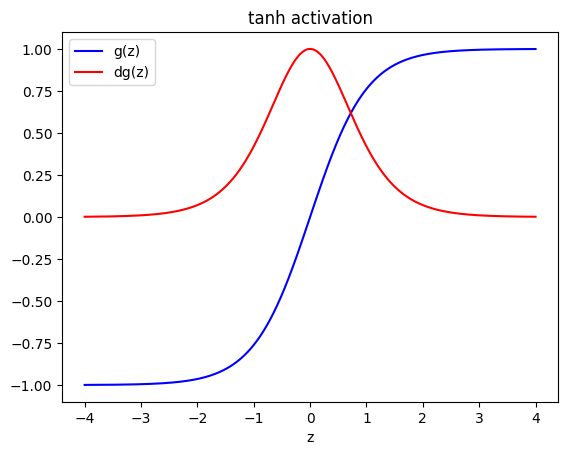

In [34]:
def g_tanh(z):
    epz = np.exp(z)
    enz = np.exp(-z)
    return (epz - enz)/(epz + enz)

def dg_tanh(z):
    return 1 - np.square(g_tanh(z))

z_in = np.linspace(-4, 4, 10000)
plt.plot(z_in, g_tanh(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_tanh(z_in), color="r", label="dg(z)")
plt.title("tanh activation"); plt.xlabel("z"); plt.legend()

#### Softmax
Across $k$ units (classes) in a layer, returns values between 0 and 1 corresponding to the probability of a match for each class. The sum of all activation values is one. Typically used in the final layer for softmax regression (multiple class classification). Cannot be easily visualized as it typically has many dimensions.

$$
\begin{aligned}
g(z_{j}) & = \frac{e^{z_{j}}}{\sum^{n}_{k=1}{e^{z_{k}}}} = P(y = j|\vec{x}) \\
\frac{\partial g(z_{j})}{\partial z_{j}} & = g(z_{j}) \cdot (1 - g(z_{j})) \\
\frac{\partial g(z_{j})}{\partial z_{k}} & = -g(z_{j}) \cdot g(z_{k})
\end{aligned}
$$

### Model Evaluation

#### Overview
This section describes the criteria for identifying underfitting and overfitting models. Definitions:
  1. $J_{\text{bayes}}$: theoretically lowest possible cost (Bayes error)
  2. $J_{\text{human}}$: human baseline performance
  3. $J_{\text{train}}$: total cost of training set $X_{\text{train}}$
  4. $J_{\text{cv}}$: total cost of cross validation (aka development or dev) set $X_{\text{cv}}$

Examples of $X$ should be shuffled between these three sets, especially if they come from different distributions. This may include different sources (real vs. synthetic, official database vs. social media, etc), different geographical regions, or any other differentiating factor. This is especially important with respect to the cross validation and test sets.

Selection of a model is based on two types of metrics:
  1. __Optimizing__: the single metric that should be improved to the greatest degree. For example, maximizing accuracy or minimizing false positives.
  2. __Satisficing__: the remaining metrics that must be satisfied, but not necessarily optimized. For example, ensuring that predictions take less than 10 seconds or ensuring that the model fits into 200 megabytes of memory space.

Given these metrics, use the __evaluation criteria__ to intelligently combine them. First, find all models that meet the satisficing metrics. Of those models, select the one with the best optimizing metric. Suppose that accuracy is the optimizing metric while prediction time and memory consumption are satisficing metrics. Following this process, model D is superior in the example table below.

|                | Accuracy % | Pred time (s) | Mem con (MB) | Analysis           |
| -------------- | ---------- | ------------- | ------------ | ------------------ |
| Eval criteria  | $\ge$ 95   | $\le$ 10      | $\le$ 200    |                    |
| Model A        | 100        | 5             | 1500         | mem con too high   |
| Model B        | 99         | 30            | 75           | pred time too high |
| Model C        | 93         | 5             | 150          | accuracy too low   |
| Model D        | 97         | 9             | 190          | best option        |

To most rapidly improve accuracy, identify the biggest contributor to the error. For example, if 30% of incorrect predictions are due to blurry images, but only 10% are due to upside down images, you should focus on tuning the model to tolerate blurry images first. This isn't rigorously proven, but it provides a general direction for taking the first remedial steps. Make small changes in the chosen direction (e.g. improving burry image performance), see if it helps, then continue to iterate.

Use the plots below to help visualize the concepts discussed in the following texts.

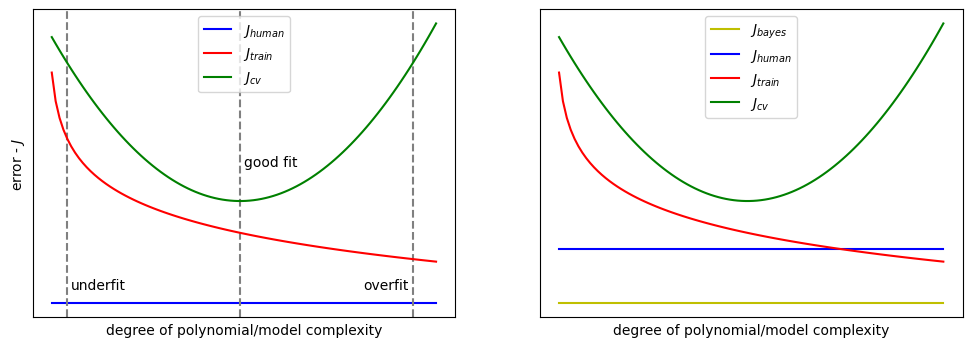

In [36]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
desc = []

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("error - $J$")

ax[0].plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
ax[0].axvline(x=5, color="gray", linestyle="--"); ax[0].text(5.1,2,"good fit")
ax[0].axvline(x=9.5, color="gray", linestyle="--"); ax[0].text(8.2,1.1,"overfit")
ax[0].axvline(x=0.5, color="gray", linestyle="--"); ax[0].text(0.6,1.1,"underfit")

ax[1].plot(error_in, np.ones(error_in.shape), color="y", label="$J_{bayes}$")
ax[1].plot(error_in, np.ones(error_in.shape) + 0.4, color="b", label="$J_{human}$")

for axis in ax:
    axis.plot(error_in, -np.log(error_in) * 0.3 + 2, color="r", label="$J_{train}$")
    axis.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
    axis.set_xlabel("degree of polynomial/model complexity")
    axis.set_xticks([]); axis.set_yticks([]); axis.legend()

#### Test for "good" fit
If the errors of the training and cross validation sets are close to the human baseline, the model is a good fit. Both the bias and variance are low.

$$
J_{\text{human}} \approx J_{\text{train}} \approx J_{\text{cv}}
$$

Note that the human baseline error may still be significantly better than the training and cross validation errors. This is acceptable if the training and cross validation errors are tolerably low and do not suggest an underfit.

$$
J_{\text{human}} \lesssim J_{\text{train}} \lesssim J_{\text{cv}}
$$

It is sometimes possible to surpass human performance. The theoretical minimum cost is the Bayes error rate (also called Bayes optimal error) which can never be surpassed. However, once the model's performance reaches this point, progress becomes much slower. Determining what to change is difficult because there is no obvious baseline against which to compare.

$$
J_{\text{human}} \gtrsim J_{\text{train}} \gtrsim J_{\text{cv}}
$$

#### Test for underfit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is equally high, the model has underfitted to the training set. The model consistently makes poor predictions on any kind of input. Consider adding features, creating polynomial features to match more complex curves, or removing/decreasing regularization. It is not recommended to remove training examples at random. Also known as "high bias".

$$
\begin{aligned}
J_{\text{human}} & \ll J_{\text{train}} \\
J_{\text{train}} & \approx J_{\text{cv}}
\end{aligned}
$$

Note that $J_{\text{train}} - J_{\text{human}}$ is called "avoidable" bias because it is theoretically possible to eliminate via training.

#### Test for overfit
If the error of the training set is close to the human baseline, but the error of the cross validation set is far higher than both, the model has overfitted to the training set. It will likely generalize poorly to unseen inputs and make inaccurate predictions. Consider adding training examples, removing features, or applying/increasing regularization. Also known as "high variance".

$$
\begin{aligned}
J_{\text{human}} & \approx J_{\text{train}} \\
J_{\text{train}} & \ll J_{\text{cv}}
\end{aligned}
$$

You can approximate the variance by computing $J_{\text{cv}} - J_{\text{train}}$ which can theoretically be reduced, similar to avoidable bias.

#### Test for "worst" fit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is far higher the training error, the model exhibits high bias and high variance simultaneously. This is a rare case that appears impossible to depict in two dimensions. Compute the avoidable bias and variance using the subtraction formulas above and first solve whichever is larger.

$$
J_{\text{human}} \ll J_{\text{train}} \ll J_{\text{cv}}
$$

#### Skewed Data Sets
Maximizing accuracy (minimizing error) is a good measure of success for regression models and classification models with uniform/diverse data sets. However, it is a poor choice for assessing classification models with skewed data sets. A model can be highly accurate by simply predicting $\hat{y}=1$ every single time if the data sete contains very few $y=0$ labels, or vice versa.

A "confusion matrix" has shape $(k, k)$ whereby the $k$ is the number of classes. Assuming binary classification, the shape is $(2, 2)$. The rows and columns represent all possible values and the intersecting cells enumerate the permutations. Assign the results of each training example into one of these four categories. From this, compute accuracy $A$, precision $P$, and recall $R$.

|             | $y=1$          | $y=0$          |
| ----------- |----------------| -------------- |
| $\hat{y}=1$ | true positive  | false positive |
| $\hat{y}=0$ | false negative | true negative  |

As an example, suppose this model predicts whether a patient has a rare and deadly disease.

Accuracy $A$: for each training example, how often was the model correct $y=\hat{y}$? Total the number of "true" values then divide by the total.

$$
A = \frac{\text{true-pos} + \text{true-neg}}{\text{true-pos} + \text{true-neg} + \text{false-pos} + \text{false-neg}}
$$

Precision $P$: for each prediction of true $(\hat{y}=1)$, how often did the model correctly diagnose the disease $(y=1)$? A high precision indicates that the model rarely misdiagnoses a healthy person; the number of false positives will be small.

$$
P = \frac{\text{true-pos}}{\text{true-pos} + \text{false-pos}}
$$

Recall $R$ : for each patient with the disease $(y=1)$, how often did the model correct predict the disease's presence $(\hat{y}=1)$? A high recall indicates that the model rarely forgets to include a sick person; the number of false negatives will be small.

$$
R = \frac{\text{true-pos}}{\text{true-pos} + \text{false-neg}}
$$

Much like bias and variance, precision and recall must be traded off. In some cases, one metric is more important than the other. As it relates to a rare disease, recall is more important. This ensures the model does not fail to identify a sick patient (fewer false negatives), although this will likely lead to more healthy patients being misdiagnosed (more false positives). In the context of logistic regression, you would select a threshold less than 0.5, leading to a larger share of positive predictions $(\hat{y}=1)$. A bank lending money to a borrower may prefer high precision. It is less important for the bank lend to all borrowers of interest, but more important that the selected borrowers are capable of repayment. The logistic regression threshold would be increased above 0.5 here.

Another way to think about this is in the context of business/personal costs. Maximizing precision is important when the cost of action is high (lending money to a stranger), but the cost of inaction is low (plenty of other candidates exist). Maximizing recall is important when the cost of action is low (treatment for the disease), but the cost of inaction is high (diminished health or death).

#### F-score
This algorithm helps with the analysis and selection of models. The hyperparameter $\beta \in \mathbb{R}\,|\,\beta > 0$ controls the relative importance of precision and recall.

$$
F_\beta = (1 + \beta^2) \cdot \frac{P \cdot R}{(\beta^2 \cdot P) + R}
$$

Although $\beta$ can vary widely, three F-scores are most commonly used:
  1. $F_1$-score: evenly balance the impact of precision and recall. Good for general-purpose use when there isn't an obvious preference. It provides greater weight to whichever value is lower, believing that a balanced model is better than a lobsided one. This is sometimes called the "harmonic mean".

$$
F_1 = 2 \cdot \frac{P \cdot R}{P + R}
$$

  2. $F_2$-score: gives greater weight to recall over precision. Good for the rare disease example.

$$
F_2 = 5 \cdot \frac{P \cdot R}{(4 \cdot P) + R}
$$

  3. $F_{0.5}$-score: gives greater weight to precision over recall. Good for the bank lending example.

$$
F_{0.5} = 1.25 \cdot \frac{P \cdot R}{(0.25 \cdot P) + R}
$$

Consider four scenarios arrayed side by side, each representing a model trained with 100 examples.

  1. This model performs well in both categories with a slightly higher recall than precision because there are more false positives than false negatives.
  2. This model has good precision but poor recall given the small number of false positives and large number of false negatives.
  3. This model has poor precision but good recall given the large number of false positives and small number of false negatives.
  4. This model performs poorly by all measures with many false positives false negatives.

| Scenario 1  | $y=1$        | $y=0$         | Scen 2  | $y=1$ | $y=0$  | Scen 3  | $y=1$ | $y=0$  | Scen 4  | $y=1$ | $y=0$  |
| ----------- |--------------| ------------- | ------- |-------| ------ | ------- |-------| ------ | ------- |-------| ------ |
| $\hat{y}=1$ | true pos: 50 | false pos: 10 |         | 30    | 5      |         | 40    | 20     |         | 35    | 20     |
| $\hat{y}=0$ | false neg: 5 | true neg: 35  |         | 25    | 40     |         | 5     | 35     |         | 25    | 15     |

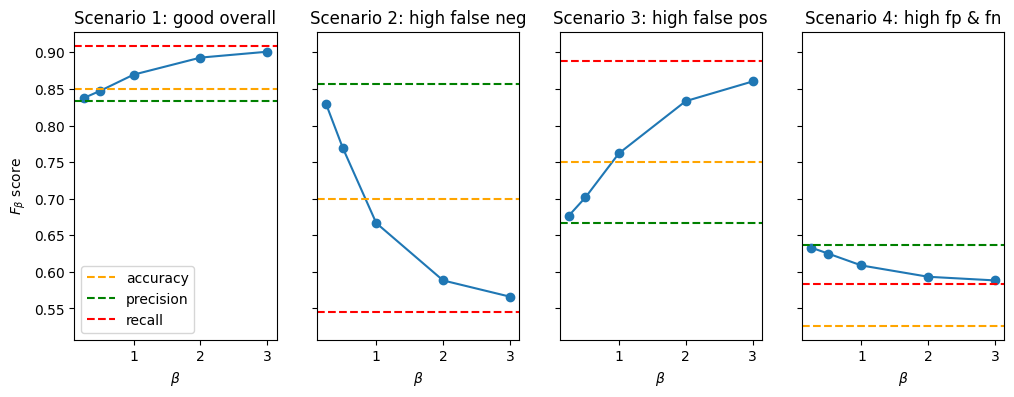

In [19]:
scenario = np.array([[50, 10, 5, 35], [30, 5, 25, 40], [40, 20, 5, 35], [35, 20, 25, 15]])
desc = ["good overall", "high false neg", "high false pos", "high fp & fn"]
beta = np.array([0.25, 0.5, 1.0, 2.0, 3.0])

def accuracy(tp, fp, fn, tn): return (tp + tn) / (tp + tn + fp + fn)
def precision(tp, fp): return tp / (tp + fp)
def recall(tp, fn): return tp / (tp + fn)
def fbeta_score(P, R, B): return (1 + B**2) * ((P * R) / ((B**2 * P) + R))

fig, ax = plt.subplots(nrows=1, ncols=len(scenario), sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"$F_{\beta}$ score")

for i in range(len(scenario)):
    A = accuracy(*scenario[i])
    P = precision(scenario[i, 0], scenario[i, 1])
    R = recall(scenario[i, 0], scenario[i, 2])
    fscore = np.array([fbeta_score(P, R, B) for B in beta])
    ax[i].set_title(f"Scenario {i+1}: {desc[i]}")
    ax[i].plot(beta, fscore, marker="o")
    ax[i].axhline(y=A, color="orange", linestyle="--", label="accuracy")
    ax[i].axhline(y=P, color="green", linestyle="--", label="precision")
    ax[i].axhline(y=R, color="red", linestyle="--", label="recall")
    ax[i].set_xlabel(r"$\beta$");

ax[0].legend()

### Model Recycling

#### Overview
This section describes solving multiple problems using some of all of an existing model, ultimately reducing the total training effort.

#### Transfer Learning
This technique involves first training a model for a generic purpose, such as image recognition, speech transcription, or text generation. Later, perhaps someone introduces a more specific use case for each of these categories, such radiology (image), translation to a specific language (speech), or composing Python code (text). One can "transfer" all of the existing layers, excluding the output layer, to a new model. Technically, it transfers the trained parameters, which required time and computing power to learn. In this way, the new model leverages all of the effort already invested. This process is called __pre-training__ and the addition of one or more layers to the end of the model is called __fine-tuning__.

Note that the pre-trained model may be effective in its own right, but a finely-tuned model is specialized for a single use case. Such a model can be trained with a relatively small data set. For example, there are many images on the Internet. The total number of radiological images is far fewer, allowing the radiology use case to consume the generic image recognition techniques within the pre-trained layers of the model. In addition to reducing the training time and the burden of collecting training data, transfer learning also enables entirely new use cases that would otherwise be difficult or impossible to implement.

The last layers of a neural network are considered at the "top" in some frameworks, which are typically retrained, if not entirely replaced or augmented. In general, the less training data available for fine-tuning, the more topmost layers should be retrained. If you have a sizable amount of data for fine-tuning, you may want to retrain a handful of the topmost layers (say, the topmost 5 layers). The pre-trained parameters can serve as good initial values for those final layers. This retraining technique is effective because it enables the high-level features to be retrained (such as facial expressions) while retaining the low-level (such as lines, corners, and curves) seen earlier in the model's architecture. Note that transfer learning is still useful even if you have an enormous training set. You can start from a known-good model, using the trained parameters as initial values, then retraining everything.

As an implementation detail, layers that are untrainable effectively turn into a static function that gives a consistent results for any given input. After all, their weights, biases, activations, and hyperparameters never change. Sometimes it can be effective to process all of training examples through the untrainable layers of the model and write those activations at the disk. Suppose that the model has 22 layers with the first 20 being untrainable. The activations of layer 20 $(A^{[20]})$ are stored on disk and serve as inputs to layer 21, the first trainable layer. This can further reduce the computing power required.

Also note that the prediction matrix shape $\hat{Y}$ of the model may also change. For example, consider a generic model with a single sigmoid-activated unit in the output layer (mimicking logistic regression) that determines whether a patient has any kind of cancer $y=1$ or not $y=0$ given a tumor image. This model could be finely-tuned into a softmax regression layer that offers probabilities on the 5 different stages of lung cancer given a tumor image.

#### Multi-task Learning
In contrast to single task learning, multi-task learning creates a single model to solve multiple problems at the same time. For example, if you are developing an image recognition model to determine if the image contains cars, people, and buildings, the shape of the prediction matrix $\hat{Y}$ would be $(3,m)$ where $m$ the number of training examples. Each row of this matrix represents the yes $y=1$ or no $y=0$ answer to the 3 aforementioned questions, effectively combining 3 otherwise separate binary classification problems. Note that this is unlike softmax regression as these 3 results are not dependent upon one another.

It is also possible to create 3 separate single-task models, each yielding a prediction matrix $\hat{Y}$ of shape $(1,m)$ to classify the 3 attributes independently. This is a reasonable solution and has the benefit of decoupling the problem set. However, the models would need to be independently trained, despite having nearly identical images as inputs, which requires more time and/or computing power.

### Regularization

#### Overview
This section contains techniques to regularize (desensitize) an overfitted model. Regularization reduces the impact of the weights applied to each feature, sometimes entirely eliminating features. Note that this only applies to training, not predictions.

Use this conceptual plot to see how $\lambda$ impacts the quality of a model's fit to various data sets.

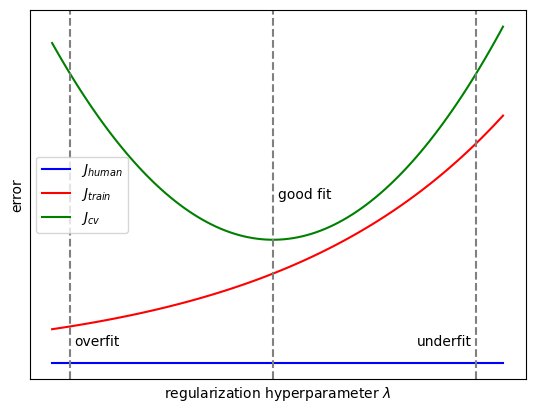

In [20]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
plt.plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
plt.plot(error_in, np.exp(error_in/5)/5 + 1, color="r", label="$J_{train}$")
plt.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
plt.axvline(x=5, color="gray", linestyle="--"); plt.text(5.1,2,"good fit")
plt.axvline(9.5, color="gray", linestyle="--"); plt.text(8.2,1.1,"underfit")
plt.axvline(0.5, color="gray", linestyle="--"); plt.text(0.6,1.1,"overfit")
plt.xticks([]); plt.yticks([])
plt.xlabel("regularization hyperparameter $\lambda$"); plt.ylabel("error"); plt.legend()

#### LASSO (L1 norm)
Short for Least Absolute Shrinkage and Selection Operator. It sums the absolute values of the weights and can perform automatic feature selection by applying a weight of 0 to certain features. Use this method when there are many useless/nonpredictive features.

General definition:

$$
\|W\|_1=\lambda \cdot {\sum\limits^{n}_{i=1}{|W_{n}|}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term". Note that $|w_j|$ cannot be differentiated (and thus cannot be represented in closed-form) as the function is not continuous.

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{m} \cdot \|\vec{w}\|_1\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{m} \cdot {\sum\limits^{n}_{i=1}{|\vec{w}_{n}|}}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot
\begin{cases}
w_j \neq 0: & \frac{w_j}{|w_j|} \\
w_j = 0: & \text{undefined}
\end{cases}
\end{aligned}
$$

In both plots below, there is a steep change in shape when $w=0$ for both the cost function and derivative. This abrupt change becomes more prominent as $\lambda$ increases. It drives the weights down to 0, eliminating their impact on the overall cost.

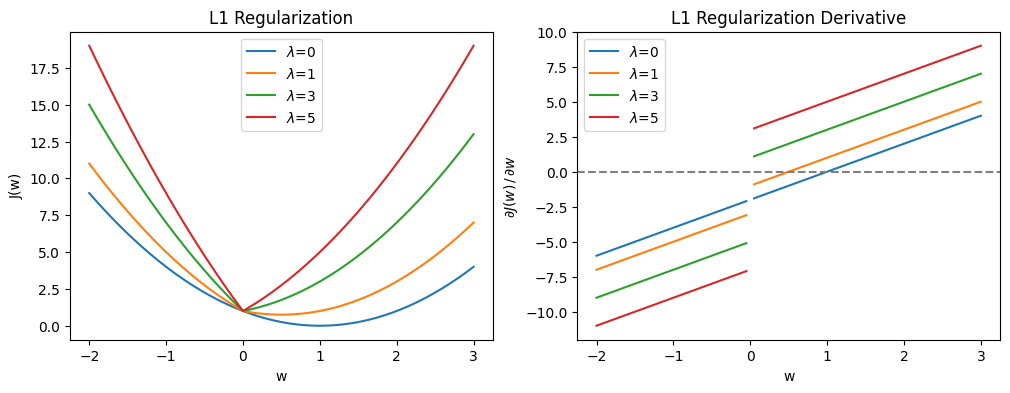

In [21]:
lambdas = [0, 1, 3, 5]
size = 101
w = np.linspace(-2, 3, size)

# let y=1, x=1, b=0 for simplicity, J(w) = mean squared error
x = np.ones(size); y = np.ones(size); b = np.zeros(size)
def J(w, b, x, y, lambd):
    return ((w * x - y + b) ** 2) + (lambd * np.abs(w))

def dJ_dw(w, b, x, y, lambd):
    sign = np.sign(w)
    sign[sign == 0.] = np.nan
    return (w * x - y + b) * 2 + (lambd * sign)

params = [
    (J, "L1 Regularization", "J(w)"),
    (dJ_dw, "L1 Regularization Derivative", "$\partial J(w)\,/\,\partial w$"),
]

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
for axis, param in zip(ax, params):
    func, title, ylabel = param
    for lambd in lambdas:
        axis.plot(w, func(w, b, x, y, lambd), label=f"$\lambda$={lambd}")
    axis.set_title(title)
    axis.set_ylabel(ylabel)
    axis.set_xlabel("w")
    axis.legend()
    
ax[1].axhline(y=0, color="gray", linestyle="--")

#### Ridge (L2 norm)
It sums the squares of the weights. Use this method to reduce the impact of weights without eliminating them entirely. Ridge is more commonly used than LASSO for this reason. The L2 regularization term is so called when applied to vectors, but is the Frobenius norm when applied to matrices.

General definition:

$$
\|W\|_2=\lambda \cdot {\sum\limits^{n}_{i=1}{(W_{n})^2}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term":

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{2m} \cdot \|\vec{w}\|_2\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{2m} \cdot {\sum\limits^{n}_{i=1}{(\vec{w}_{n})}^2}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot w_j
\end{aligned}
$$

In the plot below, notice that the parabolic distributions continue to move their minimums towards 0. This drives the weights down ever smaller, reducing their impact on the overall cost.

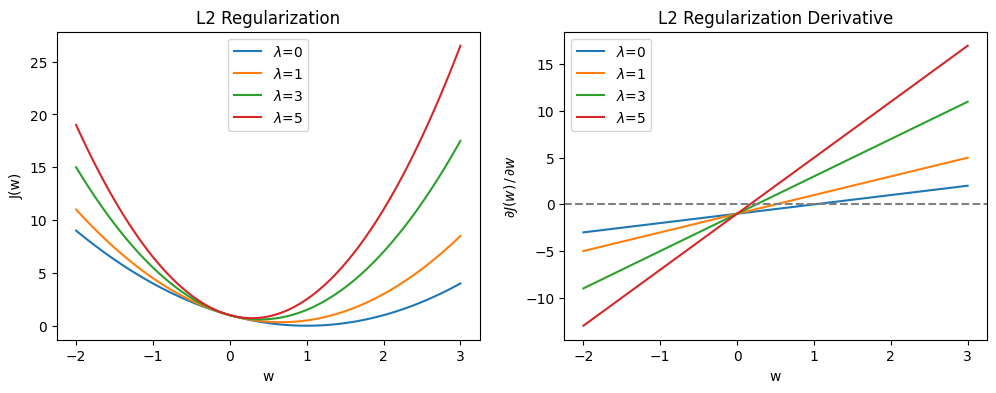

In [22]:
lambdas = [0, 1, 3, 5]
size = 101
w = np.linspace(-2, 3, size)

# let y=1, x=1, b=0 for simplicity, J(w) = mean squared error
x = np.ones(size); y = np.ones(size); b = np.zeros(size)
def J(w, b, x, y, lambd):
    return ((w * x - y + b) ** 2) + ((lambd / 2) * w**2)

def dJ_dw(w, b, x, y, lambd):
    return (w * x - y + b) * x + (lambd * w)

params = [
    (J, "L2 Regularization", "J(w)"),
    (dJ_dw, "L2 Regularization Derivative", "$\partial J(w)\,/\,\partial w$"),
]

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
for axis, param in zip(ax, params):
    func, title, ylabel = param
    for lambd in lambdas:
        axis.plot(w, func(w, b, x, y, lambd), label=f"$\lambda$={lambd}")
    axis.set_title(title)
    axis.set_ylabel(ylabel)
    axis.set_xlabel("w")
    axis.legend()

ax[1].axhline(y=0, color="gray", linestyle="--")

#### Dropout
Randomly deactivate certain units in a neural network layer for a given iteration of gradient descent. This makes layers more sparse and the remaining units are trained normally. When applied, the model cannot rely heavily on a single feature as the weight values are spread out. Dropout is commonly used in computer vision as there is rarely enough data, making overfitting common.

Most implementations define a `keep_prob` input, identifying the probability that any given unit remains in service. Other implementations define a `drop_prob` input, identifying the probability that any given unit is dropped from service. Focusing on the `keep_prob` logic, the range is $\{p \in \mathbb{R}\,|\,0 \lt p \le 1\}$. Setting `keep_prob = 1` disables dropout. It is specified on a per-layer basis, and it typically limited to hidden layers. Applying dropout to the input layer means discarding entire features. Applying dropout to the output layer means discarding categorical classes in a softmax regression, for example.

It is also common to divide the resulting activation matrix $A$ by the `keep_prob` so that the activation values more closely resemble results from the "full" layer. This specific implementation is known as "inverted dropout".

Because the neural network is different at each iteration of gradient descent, there is no well-defined cost function. Thus, the training and cost cannot be plotted to ensure it continuously decreases. To troubleshoot a model using dropout, set `keep_prob = 1` to temporarily disable dropout, ensure the cost function decreases at each iteration, then re-enable it.

Note that some implementations reverse the logic by specifying a `drop_prob` value in the range $\{p \in \mathbb{R}\,|\,0 \le p \lt 1\}$. This determines the probability that a unit is dropped rather than the probability that a unit is kept. The concept is otherwise identical.

In [85]:
n = 20
keep_prob = 0.8
drop_prob = 1.0 - keep_prob

np.random.seed(7)
units = np.random.rand(n)
keep_method = (units < keep_prob).astype(int)
drop_method = (units > drop_prob).astype(int)
print(f"keep_method: {keep_method} {np.count_nonzero(keep_method)}/{n}")
print(f"drop_method: {drop_method} {np.count_nonzero(drop_method)}/{n}")

keep_method: [1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1] 16/20
drop_method: [0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0] 16/20


#### Other Techniques
Overfitting can sometimes be solved by supplying additional training examples. Sometimes, sufficient data simply does not exist. Instead, you can create additional examples that are realistic representations of real data. Using the computer vision example, you can flip a picture horizontally or vertically, or perform slight rotations, to create variants of an existing image. Other distortions, such as crops, stretches, and minor color shifts can also help. One particular use of color shifting is to simulate different lighting environments. For example, "cooler" light tends to be more blue while warmer light tends to be more yellow. Adjust the RGB values accordingly when creating new images to reflect (no pun intended) these different lighting styles.

Not all of these techniques are universally valid. For example, if you are training a model to recognize human faces, you would not flip images vertically as it would yield upside down faces. Perhaps this is useful in some scenarios, but likely not most; context matters. Synthesizing training examples is not mutually exclusive with the aforementioned regularization methods. As an added bonus, data augmentation can also help with transfer learning (described elsewhere in this document).

You can also stop the gradient descent process early, preferably when the difference between the cross-validation error and training error is minimized. This is depicted as "good fit" in the conceptual plot. First, train the model and plot both the training and cross-validation error curves. Then, find the required minimum and stop the process after the correct number of iterations. The drawback of this solution is that it is tightly couples the training and regularization processes. It limits future options because if you want to modify the training process, you may also inadvertently impact the regularization process. Many experts prefer to use a dedicated regularization method to separate these two efforts (ie, to keep them orthogonal).

### Forward Propagation

#### Overview
This section describes the prediction/inference process of a neural network.

#### Computing Z
Each unit performs two steps in series. First, the linear outputs are computed using the formula below. The dot product of matrices $W^{[l]}$ and $A^{[l-1]}$ yields a matrix of shape $(n_l,n_{l-1}) \bullet (n_{l-1},m) = (n_l,m)$. In order for matrix multiplication to work, the number of columns in $W^{[l]}$ must match the number of rows in $A^{[l-1]}$, which is always equal to the number of units in the previous layer $n_{l-1}$. Adding the column vector $b^{[l]}$ retains the same shape, but applies the bias values on a per column basis. Superscript $[l]$ notations are omitted from the individual matrix elements for cleanliness.

$$
Z^{[l]} = W^{[l]} \bullet A^{[l-1]} + b^{[l]}
$$

First layer matrix expansion for $X = A^{[0]}$, which means $l=1$ and therefore $n_{l-1} = n_0$.

$$
\begin{aligned}
Z^{[1]} & = 
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
{=}
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
\bullet
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
{+}
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l}
\end{bmatrix} \\
Z^{[1]} & = 
\begin{bmatrix}
% first row
\vec{w}_1 \bullet \vec{x}^{(1)} + b_1 & \vec{w}_1 \bullet \vec{x}^{(2)} + b_1 & \cdots &
\vec{w}_1 \bullet \vec{x}^{(m)} + b_1 \\
% second row
\vec{w}_2 \bullet \vec{x}^{(1)} + b_2 & \vec{w}_2 \bullet \vec{x}^{(2)} + b_2 & \cdots &
\vec{w}_2 \bullet \vec{x}^{(m)} + b_2 \\
% third row
\vdots & \vdots & \ddots & \vdots \\
% fourth row
\vec{w}_{n_l} \bullet \vec{x}^{(1)} + b_{n_l} & \vec{w}_{n_l} \bullet \vec{x}^{(2)} + b_{n_l} &
\cdots & \vec{w}_{n_l} \bullet \vec{x}^{(m)} + b_{n_l} \\
\end{bmatrix} \\
Z^{[1]} & = 
\begin{bmatrix}
% first row
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(1)}_j)} + b_1 &
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(2)}_j)} + b_1 & \cdots & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(m)}_j)} + b_1 \\
% second row
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(1)}_j)} + b_2 & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(2)}_j)} + b_2 & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(m)}_j)} + b_2 \\
% third row
\vdots & \vdots & \ddots & \vdots \\
% fourth row
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(1)}_j)} + b_{n_l} & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(2)}_j)} + b_{n_l} & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(m)}_j)} + b_{n_l}
\end{bmatrix}
\end{aligned}
$$

In [14]:
# Freely adjust these positive integers
n0 = 2
n1 = 3
m = 4

A0 = np.random.randn(n0, m)  # same as X
W1 = np.random.randn(n1, n0)
b1 = np.random.randn(n1, 1)
Z1 = W1.dot(A0) + b1

assert Z1.shape == (n1, m)
print(f"A0 {A0.shape}\n{A0}\n")
print(f"W1 {W1.shape}\n{W1}\n")
print(f"b1 {b1.shape}\n{b1}\n")
print(f"Z1 {Z1.shape}\n{Z1}")

A0 (2, 4)
[[ 0.34346522  0.2967668   0.23186475  2.1018444 ]
 [-0.071889   -0.16808807  1.24540042 -1.74206753]]

W1 (3, 2)
[[-0.88858968 -1.04467549]
 [ 0.18595253 -0.06294133]
 [-0.14993514  0.13470527]]

b1 (3, 1)
[[ 0.23185191]
 [-0.93483641]
 [ 0.09301456]]

Z1 (3, 4)
[[ 0.00175293  0.14374548 -1.27522     0.18406991]
 [-0.8664434  -0.86907219 -0.97010773 -0.43434509]
 [ 0.03183323  0.02587644  0.22601189 -0.45679144]]


#### Computing A

Matrix $Z$ serves as the input for the activation function $g$. The result is the activation matrix $A$ which is the same shape as $Z$ because the activation function acts element-wise on $Z$. Activation functions may vary between layers, hence the $[l]$ superscript applied to $g$. Note that $A^{[0]} = X$ and $A^{[L]} = \hat{Y}$ for a neural network with $L$ layers. The ReLU activation (discussed earlier) is shown in the code example, raising all negative values to 0 while retaining positive values.

$$
g^{[l]}(Z^{[l]}) = A^{[l]}
$$

In [15]:
# Freely adjust these positive integers
n1 = 3
m = 4

Z1 = np.random.randn(n1, m)
A1 = Z1 * (Z1 > 0)

assert A1.shape == Z1.shape
print(f"Z1 {Z1.shape}\n{Z1}\n")
print(f"A1 {A1.shape}\n{A1}")

Z1 (3, 4)
[[ 0.09933177  0.24552851 -0.47661218  0.56932457]
 [-0.60380441  1.68306008  0.97759424 -1.08220315]
 [ 0.33824811  0.020806   -1.01547151 -0.29765703]]

A1 (3, 4)
[[ 0.09933177  0.24552851 -0.          0.56932457]
 [-0.          1.68306008  0.97759424 -0.        ]
 [ 0.33824811  0.020806   -0.         -0.        ]]


### Cost Functions

#### Overview
This section describes common cost functions and their derivatives. Computing the cost happens after a prediction is made (forward propagation) and seeds the process of training the model (backward propagation and gradient descent).

#### Mean Squared Error (MSE)
Primarily used for regression problems, such as predicting a continuous value rather than a classification. There is only a single global minimum due to its convex shape (no local minima), assuming linear activation.

$$
\begin{aligned}
\hat{y}^{(i)} & = \vec{w} \bullet \vec{x}^{(i)} + b \\
J_{w,b}(x^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\end{aligned}
$$

The cost function can be partially differentiated with respect to $W$ and $b$:

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{aligned}
$$

#### Binary Cross Entropy
Primarily used for logistic regression problems whereby training examples are labeled with $y = 1$ to indicate presence in a category or $y = 0$ to indicate absence from a category. There is only a single global minimum due to its convex shape (no local minima), assuming sigmoid activation.

$$
\begin{aligned}
\hat{y}^{(i)} = \sigma(\vec{w} \bullet \vec{x}^{(i)} + b)
\end{aligned}
$$

Consider a loss function for a single training example/label pair. Only half of the formula is relevant based on the value of $y^{(i)}$:

$$
\begin{aligned}
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & =
\begin{cases}
y^{(i)} = 1: & -\ln{(\hat{y}^{(i)})} \\
y^{(i)} = 0: & -\ln{(1 - \hat{y}^{(i)})}
\end{cases} \\
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & = (-y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} - (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})}
\end{aligned}
$$

Define the total cost function by expanding the per-example loss function:

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & = -\frac{1}{m} \cdot \sum\limits^{m}_{i=1}(y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} + (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})} \\
\end{aligned}
$$

The cost function can be partially differentiated with respect to $W$ and $b$:

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{aligned}
$$

#### Sparse Categorical Cross Entropy
Primarily used for softmax regression problems whereby training examples are labeled with values representing their categories where the number of categories is greater than 2. "Sparse" means each logit can identify only one class. The loss logic is identical to binary cross entropy except expanded to multiple classes. $n$ is the number of features in the final layer, which is also the number of classes.

$$
L(a_1, a_2, \cdots , a_n, y^{(i)}) =
\begin{cases}
y^{(i)} = 1: & -\ln(a_1) \\
y^{(i)} = 2: & -\ln(a_2) \\
& \vdots \\
y^{(i)} = n: & -\ln(a_n)
\end{cases}
$$

If the labels $y$ are OHE vectors, the formula can be simplified. This is commonly used when generating text embeddings.

$$
L(\hat{y}, y) = - \sum \limits^n_{j=1} y_j \bullet \ln (\hat{y}_j)
$$

Formally: for each training example, for each class, check if the current class matches the expected class. If so, compute the loss. Note that the quantity inside the $\ln()$ is the result of softmax activation. This function is always convex.

$$
\begin{aligned}
J_{\vec{w},b}(\vec{x}^{(i)}) & = -\frac{1}{m} \cdot \left[\sum\limits^m_{i=1}\sum\limits^n_{j=1}1\{y^{(i)}=j\} \cdot \ln \left(\frac{e^{z_j}}{\sum^n_{k=1}e^{z_k}}\right)\right] \\
J_{\vec{w},b}(\vec{x}^{(i)}) & = -\frac{1}{m} \cdot \left[\sum\limits^m_{i=1}\sum\limits^n_{j=1}1\{y^{(i)}=j\} \cdot \ln \left(\hat{y}\right)\right]
\end{aligned}
$$

### Backward Propagation

#### Overview
This section describes the process by which the model computes derivatives with respect to its parameters at each layer. Just as forward propagation unpacks the action of a single unit into two discrete steps (computing $Z$ then computing $A$), so too does backward propagation (back prop) separate the discrete steps of differentiation.

#### Computing dJ/dZ
The derivative of the cost function $J$ with respect to $A^{[l]}$ is computed using $Z^{[l]}$ as an input, which was computed during forward prop. Put simply, this involves differentiating the activation function, resulting in derivative of the cost function with respect to $Z^{[l]}$. The "chain rule" of calculus helps show the logical reduction. Each activation has a different derivative to yield exact numbers, which isn't shown here. Note that the $\odot$ means element-wise multiplication (Hadamard product), which makes sense since $\frac{\partial J}{\partial Z^{[l]}}$ and $\frac{\partial J}{\partial A^{[l]}}$ must have the same shape of $(n1, m)$.

$$
\begin{aligned}
A^{[l]} & = g^{[l]}(Z^{[l]}) \\
\frac{\partial J}{\partial Z^{[l]}} & = \frac{\partial J}{\partial A^{[l]}} \odot g^{[l]'}(Z^{[l]}) \\
\frac{\partial J}{\partial Z^{[l]}} & = \frac{\partial J}{\partial A^{[l]}} \odot \frac{\partial g^{[l]}(Z^{[l]})}{\partial Z^{[l]}}
\end{aligned}
$$

In [4]:
# Freely adjust these positive integers
n1 = 3
m = 4

dJ_dA1 = np.random.randn(n1, m)
dgZ_dZ1 = np.random.randn(n1, m)
dJ_dZ1 = dJ_dA1 * dgZ_dZ

assert dJ_dZ1.shape == dJ_dA1.shape == dgZ_dZ1.shape
print(f"dJ_dA1 {dJ_dA1.shape}\n{dJ_dA1}\n")
print(f"dgZ_dZ1 {dgZ_dZ1.shape}\n{dgZ_dZ1}\n")
print(f"dJ_dZ1 {dJ_dZ1.shape}\n{dJ_dZ1}")

dJ_dA1 (3, 4)
[[-0.17147456  1.70113207  2.3899851  -2.81464899]
 [-0.85458904 -0.23674671  0.29775418  0.45837633]
 [ 0.06097155  0.80109256  0.48259724  0.24979987]]

dgZ_dZ1 (3, 4)
[[-0.43965295 -0.9565958   0.07436123  0.60540956]
 [-0.86469197  0.16364758 -0.08861703  0.89984501]
 [-0.49419037 -0.11813205  1.45545898  0.09038311]]

dJ_dZ1 (3, 4)
[[-0.07617246 -0.98596834 -3.98822537 -1.51478058]
 [-0.38765625  0.32975658  0.20593948 -0.38231988]
 [ 0.08807704  0.88313005 -0.43838129  0.11406206]]


#### Computing dJ/dA, dJ/dW, and dJ/db
All three of the derivatives computed in this section rely on $\frac{\partial J}{\partial Z^{[l]}}$ from the previous step. Note that $W^{[l]}$ and $A^{[l-1]}$ are both required below; both were computed during forward prop. Also note that $b^{[l]}$ is not needed for any calculation and thus should not be retained in the forward prop cache during implementation.

Two formulas require the use of matrix transpose using superscript $T$. This is required to compute $\frac{\partial J}{\partial A^{[l-1]}}$ given $W^{[l]}$ of shape $(n_l, n_{l-1})$ and $\frac{\partial J}{\partial Z^{[l]}}$ of shape $(n_l, m)$. $W^{[l]}$ must be transposed so that the $n_l$ dimension matches, yielding a matrix of shape $(n_{l-1}, m)$ for $\frac{\partial J}{\partial A^{[l-1]}}$. The same idea applies to the computation of $\frac{\partial J}{\partial W^{[l]}}$. Recall that $\frac{\partial J}{\partial Z^{[l]}}$ has shape $(n_l, m)$ while $A^{[l-1]}$ has shape $(n_{l-1}, m)$.

The shapes of the parameter matrices $W$ and $b$ are defined by the neural network's architecture, not the number of training examples. When computing $\frac{\partial J}{\partial W^{[l]}}$, the matrix transpose operation aligns the $m$ dimensions. This yields a $\frac{\partial J}{\partial W^{[l]}}$ matrix of shape $(n_l, n_{l-1})$ to match the shape of $W^{[l]}$. To compute $\frac{\partial J}{\partial b^{[l]}}$, we ignore $b^{[l]}$ and simply sum the values of $\frac{\partial J}{\partial Z^{[l]}}$ across all training examples $m$ (row-wise) to result in a column-vector of shape $(n_l, 1)$, which matches $b^{[l]}$. Note that `keepdims=True` returns a matrix with the aforementioned shape rather than a 1D vector of length 5, which complicates the logic. 

$$
\begin{aligned}
\frac{\partial J}{\partial A^{[l-1]}} & = W^{{[l]}^T} \bullet \frac{\partial J}{\partial Z^{[l]}} \\
\frac{\partial J}{\partial W^{[l]}} & = \frac{1}{m} \cdot (\frac{\partial J}{\partial Z^{[l]}} \bullet A^{{[l-1]}^T}) \\
\frac{\partial J}{\partial b^{[l]}} & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}\frac{\partial J}{\partial Z^{[l](i)}} \\
\end{aligned}
$$

$\frac{\partial J}{\partial W^{[l]}}$ and $\frac{\partial J}{\partial b^{[l]}}$ measure the direction and magnitude of changes required to the weight and bias parameters at a given layer, respectively. Larger values of either sign indicate that the parameter in question is a relatively large contributor to the overall cost, requiring a larger adjustment by the optimization algorithm. $\frac{\partial J}{\partial A^{[l-1]}}$ is passed backwards to the previous layer. At the end of the process, a generalized implementation may also compute $\frac{\partial J}{\partial A^{[0]}}$ or $\frac{\partial J}{\partial X}$, but this value is unused.

In [18]:
# Freely adjust these positive integers
n0 = 2
n1 = 3
m = 4

W1 = np.random.randn(n1, n0)
dJ_dZ1 = np.random.randn(n1, m)
dJ_dA0 = W1.T.dot(dJ_dZ1)  # same as dJ_dX
dJ_dW1 = dJ_dZ1.dot(dJ_dA0.T) / m
dJ_db1 = np.sum(dJ_dZ1, axis=1, keepdims=True)

assert dJ_dA0.shape == (n0, m)
assert dJ_dW1.shape == (n1, n0) == W1.shape
assert dJ_db1.shape == (n1, 1)

print(f"W1 {W1.shape}\n{W1}\n")
print(f"dJ_dZ1 {dJ_dZ1.shape}\n{dJ_dZ1}\n")
print(f"dJ_dA0 {dJ_dA0.shape}\n{dJ_dA0}\n")
print(f"dJ_dW1 {dJ_dW1.shape}\n{dJ_dW1}\n")
print(f"dJ_db1 {dJ_db1.shape}\n{dJ_db1}")

W1 (3, 2)
[[-3.27223203e-01 -2.54448984e-01]
 [-1.71320713e+00  1.71277023e-02]
 [-1.28235476e-03  6.52328367e-01]]

dJ_dZ1 (3, 4)
[[-0.2557113   0.11609858 -0.48213068 -0.86283355]
 [-0.07438856  0.20283053 -0.41139756  1.16733953]
 [-0.72196523 -1.07943288 -0.99403506 -0.4004188 ]]

dJ_dA0 (2, 4)
[[ 0.21204349 -0.38409665  0.86384829 -1.71704177]
 [-0.40716702 -0.73021183 -0.5328059  -0.02166358]]

dJ_dW1 (3, 2)
[[ 0.24155462  0.0737287 ]
 [-0.61335899  0.0190214 ]
 [ 0.02258971  0.40511934]]

dJ_db1 (3, 1)
[[-1.48457694]
 [ 0.88438394]
 [-3.19585198]]


### Optimization Algorithms

#### Overview
This section describes algorithms to train a model given a cost function, its derivative, plus weights and biases computed through forward propagation.

#### Batch Gradient Descent
Update the weights $W$ and biases $b$ at a given layer $[l]$ after a full pass of the training set. It subtracts the product of the learning rate $\alpha$ and derivative with respect to the parameters in question $\frac{\partial J}{\partial W^{[l]}}$ or $\frac{\partial J}{\partial b^{[l]}}$. The derivative determines the parameters's contribution to the total cost $J$. If the parameter was a major contributor to the total cost, the derivative will be a large positive or negative number. Negative derivatives will result in a positive change to the value, bringing it closer to 0. Positive derivatives achieve the same goal in the opposite direction, reducing the value to bring it closer to 0.

The point at which the derivative is 0 is the minimum (the "valley" on a 2D or 3D plot). Such a point could be a local minimum rather than the global minimum. Given a highly dimensional plot with many parameters, such local minima are rare as all dimensions would need to be convex (sloping upwards) at once. It is more likely that there is a single global minimum with many "saddles" along the way, which slope upwards in some dimensions and downwards in others.

$$
\text{repeat until convergence}
\begin{cases}
W^{[l]} :& = W^{[l]} - \alpha \cdot \frac{\partial J}{\partial W^{[l]}} \\
b^{[l]} :& = b^{[l]} - \alpha \cdot \frac{\partial J}{\partial b^{[l]}}
\end{cases}
$$

#### Mini-batch Gradient Descent
When the number of training examples $m$ is large, batch gradient descent cannot act until all training examples have been processed. Minibatches break up this process, allowing gradient descent to act sooner, albeit without seeing the entire training set. This makes the weight and bias adjustments less precise but faster and more frequent.

Be sure to shuffle the training data and the corresponding labels before dividing into mini-batches. Use a common random seed to ensure $X$ and $Y$ are shuffled according to the same scheme. It is common to create mini-batches sized by powers of 2, such as 32, 64, 128, 256, and 512. The sizes are chosen so that they can fit inside of GPUs memory, which vary. Each mini-batch matrix is notated as $X^{\{t\}}$ where $t$ is the mini-batch number. Given a mini-batch size of $N$ examples, the shape of $X^{\{t\}}$ is $(n_0, N)$. The final mini-batch is likely to be smaller than the mini-batch size to collect all the remaining examples, but this is an implementation detail.

#### Stochastic Gradient Descent (SGD)
This is conceptually identical to mini-batch gradient descent, except the number of training examples in each mini-batch $N$ is only 1. This allows the model to run gradient descent very quickly given that only one training example is being processed, although the cost may not monotonically decrease. That is to say, the cost may occasionally increase, although it is expected to trend downward towards. The drawback of SGD is that it requires $m$ iterations, one per training example, which could number in the millions. This can be computationally expensive as it reduces the efficiency benefits of a fully vectorized implementation.

#### Gradient Descent with Momentum
This algorithm enhances gradient descent by using an exponentially weighted moving average (EWMA) to compute the gradients, then using that EWMA to update the parameters.

The relevant formulas to compute EWMA are shown below. The first value $V_0$ starts off at 0. The next value $V_1$ is a combination of the previous value $V_0$ and the resulting data point $f(t)$ at a given time $t$. The hyperparameter $\beta$ controls the algorithm's sensitivity to changes.

Larger values of $\beta$ account for more data over a longer time period, making the average less responsive to recent changes. Smaller values of $\beta$ give more weight to newer samples, making the average more responsive to recent changes. As a rough estimate, the algorithm averages over $\frac{1}{1-\beta}$ time entries.

The $V_t^{corr}$ value represents the optional bias correction process. During the first few iterations of the algorithm, the EWMA will routinely underestimate the true average. Bias correction yields more accurate results early in the training process but becomes less relevant over time as more data is processed.

$$
\begin{aligned}
V_0 & = 0 \\
V_t & = \beta \cdot V_{t-1} + (1-\beta) \cdot f(t) \\
V_t^{corr} & = \frac{V_t}{1-\beta^t}
\end{aligned}
$$



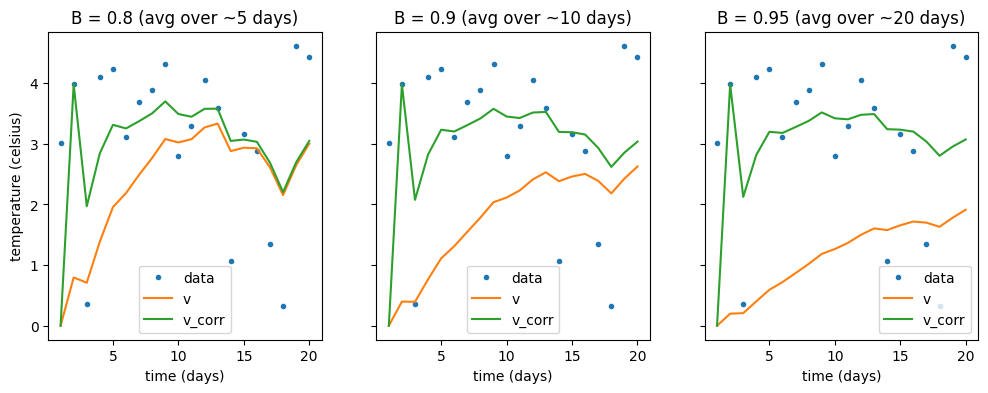

In [25]:
size_in = 20
beta = np.array([0.8, 0.9, 0.95])
x_in = np.arange(1, size_in + 1, 1)
y_in = np.random.rand(size_in) * 5

def ewma(size, y, B):
    v, v_corr = np.zeros(size), np.zeros(size)
    for t in range(1, len(y)):
        v[t] = (B * v[t-1]) + ((1 - B) * y[t])
        v_corr[t] = v[t] / (1 - B**t)

    return v, v_corr

fig, ax = plt.subplots(nrows=1, ncols=len(beta), sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("temperature (celsius)")

for B, axis in zip(beta, ax):
    v, v_corr = ewma(size_in, y_in, B)
    axis.set_title(f"B = {B} (avg over ~{int(round(1/(1-B)))} days)")
    axis.set_xlabel("time (days)")
    axis.plot(x_in, y_in, label="data", linestyle="", marker=".")
    axis.plot(x_in, v, label="v")
    axis.plot(x_in, v_corr, label="v_corr")
    axis.legend()

In the context of gradient descent, the EWMA resembles "momentum", allowing the algorithm to trend downhill more quickly without oscillations in dimensions that diverge from the global minimum. This strategy can be combined with any of the aforementioned gradient descent variants (batch, mini-batch, or stochastic).

The matrix $v_{\partial W^{[l]}}$ has the same shape as the weights $W^{[l]}$ and the weight derivatives. The matrix $v_{\partial b^{[l]}}$ has the same shape as the biases $b^{[l]}$ and the bias derivatives. Both are initialized to all zeros. The derivatives ${\partial W^{[l]}}$ and ${\partial b^{[l]}}$ are the normal values computed by backwards propagation, omitting the numerator $\partial J(\theta)$ for brevity. The new matrices $v_{\partial W^{[l]}}$ and $v_{\partial b^{[l]}}$ represent the computed EWMA values for weight and bias derivatives, respectively.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta) \cdot {\partial b^{[l]}}\bigr) \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot v_{\partial W^{[l]}} \\
b^{[l]} & := b^{[l]} - \alpha \cdot v_{\partial b^{[l]}}
\end{cases}
$$

The algorithm can be modified by including the optional $v_{\partial W^{[l]}\_corr}$ and $v_{\partial b^{[l]}\_corr}$ bias correction steps. In practice, this is not commonly implemented because given a relatively large $\beta$ value, the EWMA algorithm will decay the older values. This makes the first few results less relevant over time.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta) \cdot {\partial b^{[l]}}\bigr) \\
v_{\partial W^{[l]}}^{corr} & = \frac{v_{\partial W^{[l]}}}{1 - \beta^t} \\
v_{\partial b^{[l]}}^{corr} & = \frac{v_{\partial b^{[l]}}}{1 - \beta^t} \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot v_{\partial W^{[l]}}^{corr} \\
b^{[l]} & := b^{[l]} - \alpha \cdot v_{\partial b^{[l]}}^{corr}
\end{cases}
$$

#### Adaptive Moment Estimation (ADAM)
ADAM adds Root Mean Squared (RMS) propagation to the momentum-based gradient descent algorithm. RMS propagation allows gradient descent to speed up in the direction towards the global minimum while slowing down in directions orthogonal to the global minimum. It is similar in concept to momentum except computes the square of the derivatives ${\partial W^{[l]}}$ and ${\partial b^{[l]}}$ when computing an EWMA. When updating the weights, it multiplies $\alpha$ by the ratio of the momentum EWMA and the square root of that RMS-computed EWMA.

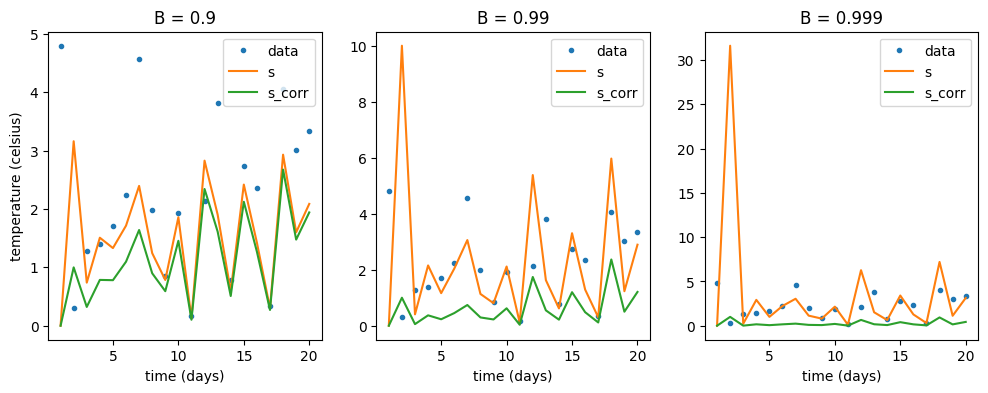

In [26]:
size_in = 20
beta = np.array([0.9, 0.99, 0.999])
x_in = np.arange(1, size_in + 1, 1)
y_in = np.random.rand(size_in) * 5

def rms_prop(size, y, B, epsilon=1e-8):
    s, s_corr = np.zeros(size), np.zeros(size)
    for t in range(1, len(y)):
        s[t] = (B * s[t-1]) + ((1 - B) * y[t]**2)
        s_corr[t] = s[t] / (1 - B**t)

        s[t] = y[t] / (np.sqrt(s[t]) + epsilon)
        s_corr[t] = y[t] / (np.sqrt(s_corr[t]) + epsilon)
        
    return s, s_corr

fig, ax = plt.subplots(nrows=1, ncols=len(beta), sharey=False)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("temperature (celsius)")

for B, axis in zip(beta, ax):
    s, s_corr = rms_prop(size_in, y_in, B)
    axis.set_title(f"B = {B}")
    axis.set_xlabel("time (days)")
    axis.plot(x_in, y_in, label="data", linestyle="", marker=".")
    axis.plot(x_in, s, label="s")
    axis.plot(x_in, s_corr, label="s_corr")
    axis.legend()

The matrices $v_{\partial W^{[l]}}$ and $s_{\partial W^{[l]}}$ have the same shape as the weights $W^{[l]}$ and the weight derivatives. The matrices $v_{\partial b^{[l]}}$ and $s_{\partial b^{[l]}}$ have the same shape as the biases $b^{[l]}$ and the bias derivatives. These four matrices are initialized to all zeros. Note that both algorithms use $\beta$ in their formal definitions, which are rewritten as $\beta_1$ and $\beta_2$ to differentiate them. Their default values in most implementations are $\beta_1 = 0.9$ and $\beta_2 = 0.999$ which are rarely tuned. The tiny value $\varepsilon = 1 \times 10^{-8}$ is almost never tuned and only prevents against division by zero errors. The learning rate $\alpha$ remains the most interesting hyperparameter in ADAM.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta_1 \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta_1) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta_1 \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta_1) \cdot {\partial b^{[l]}}\bigr) \\
v_{\partial W^{[l]}}^{corr} & = \frac{v_{\partial W^{[l]}}}{1 - \beta_1^t} \\
v_{\partial b^{[l]}}^{corr} & = \frac{v_{\partial b^{[l]}}}{1 - \beta_1^t} \\
\\
s_{\partial W^{[l]}} & = (\beta_2 \cdot s_{\partial W^{[l]}}) + \bigl((1 - \beta_2) \cdot {\partial W^{[l]}}^2\bigr) \\
s_{\partial b^{[l]}} & = (\beta_2 \cdot s_{\partial b^{[l]}}) + \bigl((1 - \beta_2) \cdot {\partial b^{[l]}}^2\bigr) \\
s_{\partial W^{[l]}}^{corr} & = \frac{s_{\partial W^{[l]}}}{1 - \beta_2^t} \\
s_{\partial b^{[l]}}^{corr} & = \frac{s_{\partial b^{[l]}}}{1 - \beta_2^t} \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot \frac{v_{\partial W^{[l]}}^{corr}}{\sqrt{s_{\partial W^{[l]}}^{corr}} + \varepsilon} \\
b^{[l]} & := b^{[l]} - \alpha \cdot \frac{v_{\partial b^{[l]}}^{corr}}{\sqrt{s_{\partial b^{[l]}}^{corr}} + \varepsilon}
\end{cases}
$$

#### Optional: Gradient Checking
This technique is used for troubleshooting, not training, and can determine if your gradients (derivatives) have been computed correctly. Consider this definition of a derivative that includes sampling on both sides of the function:

$$
\frac{\partial}{\partial \theta_i}J(\vec{\theta}) = \lim_{\varepsilon \to 0}
\frac{J(\theta_1, \theta_2, \cdots, \theta_i + \varepsilon) -
J(\theta_1, \theta_2, \cdots, \theta_i - \varepsilon)}{2 \cdot \varepsilon}
$$

In this context, $\vec{\theta}$ is a 1D vector that contains all of the weights $W$ and biases $b$. The weight matrices are unrolled into one dimension and the biases are concatenated afterwards. This process repeats for every layer, resulting in a giant vector.

Next, repeat this flattening process for all of the derivatives computed with respect to each parameter $W$ and $b$. These derivatives are the result of back propagation and are the specific values that gradient checking will validate. Let's call this vector of gradients $\partial{\vec{\theta}}$ for short which has the same length as $\vec{\theta}$.

The gradient checking algorithm iterates over elements of $\vec{\theta}$, computing the cost using fixed values for each element in $\vec{\theta}$ except for the current one under evaluation $\theta_i$. This is how we approximate the derivatives with respect to individual parameters; we must fix all other elements of $\vec{\theta}$ and only change $\theta_i$ up by a tiny amount $\varepsilon$. The algorithm stores these gradient approximations in a vector that is also the same length as $\vec{\theta}$ and $\partial{\vec{\theta}}$. This new vector is $\partial{\vec{\theta}}_a$ with subscript $a$ indicating "approximate".

Theoretically, the derivatives computed by backward propagation should equal the approximated derivatives computed by gradient checking. In reality, the values will be slightly different. We can measure the similarity of these two vectors using a normalized variant of Euclidean distance.

$$
d = \frac{\|\partial{\vec{\theta}}_a - \partial{\vec{\theta}}\|_2}{\|\partial{\vec{\theta}}_a\|_2 + \|\partial{\vec{\theta}}\|_2}
$$

If the resulting distance $d$ is less than a tiny threshold, such as $1 \times 10^{-7}$, then backward propagation has computed the correct gradients. If the resulting distance is too large, it suggests a software bug. Examine the two gradient vectors closely and look for pairwise values that have large differences. This indicates the specific parameter at the specific layer where the bug is likely to be.

Note that the cost function $J(\vec{\theta})$ must include regularization, if applied, when performing gradient checking. If not, the approximated gradients and backprop-computed gradients will be very different. Also, gradient checking cannot work with dropout regularization as the cost function is not well-defined. You can use `keep_prob = 1` or `drop_prob=0` temporarily to run gradient checking on models using dropout.

#### Optional: Learning Rate Decay
This optional enhancement allows the learning rate $\alpha$ to send to slowly decrease (decay) as gradient descent runs. This may reduce oscillations near the global minimum, thus speeding up training. As $t$ increases over time, $\alpha$ decays more slowly, regardless of the implementation. Several plausible options are shown here; many others also exist.

1. Reduce the learning rate $\alpha$ with each epoch $t$ based on a specified rate of decay $r$ based on some initial learning rate $\alpha_0$. Larger values of $r$ yield faster rates of decay (faster reduction of $\alpha$), although values slightly greater than 0 are most reasonable. This update occurs after every iteration.

$$
\alpha = \frac{\alpha_{0}}{1+(r \cdot t)}
$$

2. Reduce the learning rate $\alpha$ after a certain number $n$ epochs $t$. This is a step-based decay using the mathematical "floor" function. A smaller value of $n$ yields more rapid decay as the learning rate changes more frequently.
$$
\alpha = \frac{\alpha_{0}}{1+\lfloor{\frac{t}{n}}\rfloor}
$$

3. Alternative implementation to per-iteration decay, relying on base $b \in \mathbb{R}\,|\,0 < b < 1$. It decays more rapidly at first, whereby smaller values of $b$ yield faster rates of decay in general. Values slightly less than 1 are most reasonable.
 
$$
\alpha = \alpha_{0} \cdot b^{t}
$$

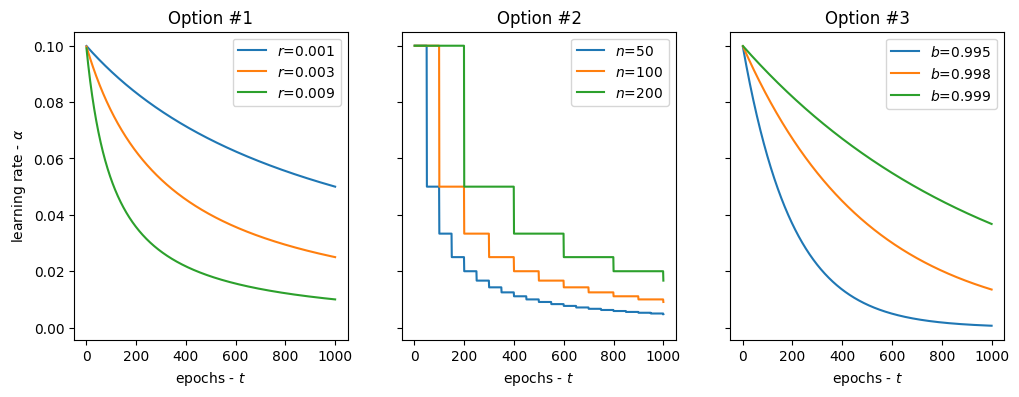

In [27]:
# Run with 1000 epochs and an initial learning rate
t = np.arange(1, 1001, 1, dtype=int)
a0 = 1.0e-01

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"learning rate - $\alpha$")

for r in np.array([1.0e-3, 3.0e-3, 9.0e-3]):
    ax[0].plot(t, a0 / (1 + r * t), label=f"$r$={r}")

for n in np.array([50, 100, 200]):
    ax[1].plot(t, a0 / (1 + np.floor(t / n)), label=f"$n$={n}")

for b in np.array([0.995, 0.998, 0.999]):
    ax[2].plot(t, a0 * np.power(b, t), label=f"$b$={b}")

for i, axis in enumerate(ax, start=1):
    axis.set_title(f"Option #{i}")
    axis.set_xlabel("epochs - $t$")
    axis.legend()

#### Optional: Hyperparameter Tuning
Hyperparameters are human-selected values that are used by the model but are not trained by it. This section describes common techniques for selecting hyperparameters. Note that as the input data changes over time, hyperparameters should be re-evaluated to ensure they are still adequate for data set.

To use an Information Technology (IT) analogy, AI models can be seen as pets or cattle. As pets, we closely monitor them, making small adjustments to hyperparameters to optimize performance. This approach is typically used when compute resources are limited or during training/experimentation. Perhaps only one model can be trained at once. 

As cattle, we raise several at the same time, combining different hyperparameters together to yield several models. This assumes that compute resources are ample and that hyperparameter combinations have been determined ahead of time. At the end of the process, select the best model based on some metric such as lowest cost, highest accuracy/precision/recall, etc.

Suppose we are using gradient descent with momentum, which has 2 important hyperparameters: the learning rate $\alpha$, and the momentum $\beta$. There are several methods for selecting values.

  1. __Grid uniform__: On the linear scale, select values at fixed intervals across a range of reasonable values for each hyperparameter. When visualized on a 2D plot, it looks like a grid. This approach is conceptually simple and deterministic, but it limits the number of unique hyperparameter values available.

  2. __Random uniform__: On a linear scale, randomly generate reasonable values for each hyperparameter. The coverage area is the same as the grid, but tends to work better. If one hyperparameter has a very small impact on the learning algorithm (say $\beta$), the randomness will yield more options for the other hyperparameter (say $\alpha$), which presumably has a larger impact.

  3. __Random log__: On a logarithmic scale, randomly generate reasonable values for each hyperparameter. This provides the benefits of diverse value selection while also more evenly distributing samples across logarithmic ranges. Consider $\beta$ which typically ranges from 0.9 to 0.999. Rather than uniformly sample across this range, it's more effective to collect a roughly equal number of samples across the different orders of magnitude. 

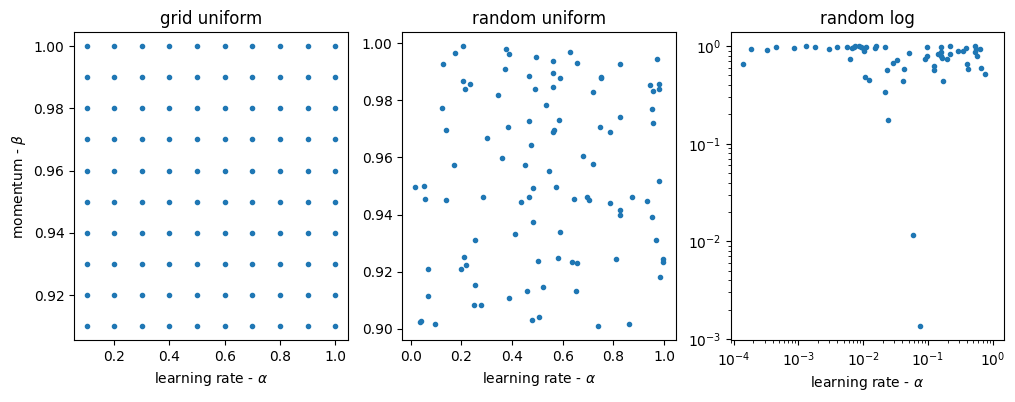

In [28]:
alpha = [
    np.tile(np.arange(0.1, 1.1, 0.1), 10),
    np.random.uniform(1e-5, 1,(100,)),
    np.array([[10**(-power * np.random.rand()) for _ in range(20)] for power in range(1,5)]).flatten(),
]
beta = [
    np.repeat(np.arange(0.91, 1.01, 0.01), 10),
    np.random.uniform(1 - 1e-1, 1 - 1e-5,(100,)),
    np.array([[1 - (10**(-power * np.random.rand())) for _ in range(20)] for power in range(4)]).flatten(),
]
desc = ["grid uniform", "random uniform", "random log"]
scale = ["linear", "linear", "log"]

fig, ax = plt.subplots(nrows=1, ncols=len(desc), sharey=False)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"momentum - $\beta$")

for i in range(len(desc)):
    ax[i].set_xscale(scale[i]); plt.yscale(scale[i])
    ax[i].set_title(desc[i])
    ax[i].set_xlabel(r"learning rate - $\alpha$")
    ax[i].plot(alpha[i], beta[i], marker=".", linestyle="")

## Convolutional Neural Network (CNN)

### Convolutional Layer (CONV)

#### Overview
This layer forms the basis of a CNN. Primarily used for computer vision use-cases, CONV layers examine subsets of an image at a time, and reducing that subset to a single value. Different filters are used to examine different subsets and are used to detect different features by panning across the image using a stride interval. The total number of parameters is greatly reduced when compared to MLP layers, requiring less time and compute power to train.

Convolutional layers are effective because the feature-detecting filters are likely to be useful across different parts of the image, which reduces the number of parameters to be trained. Additionally, there are far fewer connections between convolutional layers compared to fully-connected layers. Each convolutional output is depends only on a few inputs (those in the filter's window).

Because 2D images are so pervasive, they dominate the discussion of CNNs. However, the concepts can also apply to 1D data (such as EKG streams) and 3D data (such as CT/MRI scans).

#### Notation and Matrix Shapes

Many of the notational conventions from the MLP section are retained here. The CNN-specific notation of key values at layer $l$ is below.

$$
\begin{aligned}
f^{[l]} & = \text{filter height and width (if square, which is common)} \\
f_H^{[l]} & = \text{filter height (if not square)} \\
f_W^{[l]} & = \text{filter width (if not square)} \\
s^{[l]} & = \text{number of strides} \\
p^{[l]} & = \text{thickness of padded cells (number of surrounding layers)} \\
n_H^{[l]} & = \text{input matrix height (vertical)} \\
n_W^{[l]} & = \text{input matrix width (horizontal)} \\
n_C^{[l]} & = \text{input matrix channels (depth)}
\end{aligned}
$$

The following equations summarize how to compute the matrix dimensions at layer $l$. In general, a larger value of $f$ implies a larger filter, resulting in smaller values of $n_H^{[l]}$ and $n_W^{[l]}$. Larger values of $p$ imply additional layers of padding, resulting in larger values of $n_H^{[l]}$ and $n_W^{[l]}$. Larger values of $s$ imply longer strides when panning, resulting in smaller values of $n_H^{[l]}$ and $n_W^{[l]}$. In summary, $f$ and $s$ are indirectly proportional to $n_H^{[l]}$ and $n_W^{[l]}$ while $p$ is directly proportional to $n_H^{[l]}$ and $n_W^{[l]}$.

$$
\begin{aligned}
n_H^{[l]} & = \Bigl\lfloor \frac{(n_H^{[l-1]} - f^{[l]}) + (2 \times p^{[l]})}{s^{[l]}} \Bigr\rfloor + 1 \\
n_W^{[l]} & = \Bigl\lfloor \frac{(n_W^{[l-1]} - f^{[l]}) + (2 \times p^{[l]})}{s^{[l]}} \Bigr\rfloor + 1 \\
n_C^{[l]} & = \text{number of filters applied}
\end{aligned}
$$

Each filter is a feature selector which is squared-shaped, often using an odd natural number for $f^{[l]}$. The depth of the filter is always equals the depth of the matrix being evaluated $n_C^{[l-1]}$. This is because the filter only pans along the height/width 2D plane. For this reason, filters of shape $(1,1,n_C^{[l-1]})$ can be useful as they evaluate the entire depth of the 3D matrix despite only panning one cell at a time in 2D. This special type of filter is called "network in network" and can reduce the depth of a 3D volume by ensuring there are fewer such filters at the present layer compared to the previous layer $n_C^{[l]} < n_C^{[l-1]}$. Although less commonly used, these filters can also increase the depth of the volume using a larger number of filters.

$$
f^{[l]}_{dim} = f^{[l]} \times f^{[l]} \times n_C^{[l-1]}
$$

Each value in the filter is a trainable weight. The number of channels in the current layer $n_C^{[l]}$ represents the number of filters applied by that layer. Therefore, the total number of weights at a layer $w^{[l]}_{dim}$ equals the dimensions of the filter times the number of filters at that layer. Also note that sometimes the word "kernel" is used instead of "filter" and is the denoted as $k$; they are fully synonymous.

$$
\begin{aligned}
w^{[l]}_{dim} & = f^{[l]} \times f^{[l]} \times n_C^{[l-1]} \times n_C^{[l]} \\
w^{[l]}_{dim} & = f^{[l]}_{dim} \times n_C^{[l]}
\end{aligned}
$$

A single bias is applied element-wise (broadcasted) to each value in each filter. It is also trainable. Therefore, the total number of biases at a layer $b^{[l]}_{dim}$ equals the number to filters at that layer.
$$
b^{[l]}_{dim} = n_C^{[l]}
$$

The total number of parameters at a layer $t^{[l]}_{dim}$ is the sum of the numbers of weights and biases at that layer.

$$
\begin{aligned}
t^{[l]}_{dim} & = w^{[l]}_{dim} + b^{[l]}_{dim} \\
t^{[l]}_{dim} & = f^{[l]} \times f^{[l]} \times n_C^{[l-1]} \times n_C^{[l]} + n_C^{[l]} \\
t^{[l]}_{dim} & = (f^{[l]} \times f^{[l]} \times n_C^{[l-1]} + 1) \times n_C^{[l]}
\end{aligned}
$$

#### Padding Types

1. __valid__: No padding applied ($p=0$).
2. __same__: Apply padding such that the the output matrix preserves the height and width dimensions of the input matrix. This technique enables the existence of a deeper CNN that doesn't keep shrinking the image after each convolution. It guarantees $n_H^{[l]} = n_H^{[l-1]}$ and $n_W^{[l]} = n_W^{[l-1]}$. Note that $n_C^{[l]}$ and $n_C^{[l-1]}$ may vary as they represent the number of filters applied at their respective layers.

In [29]:
X = np.random.randint(low=1, high = 9, size=(4,4))
for i in range(3):
    X_pad = np.pad(X, ((i, i), (i, i)), mode="constant", constant_values = (0, 0))
    print(f"\nX padding={i} shape{X_pad.shape}\n{X_pad}")


X padding=0 shape(4, 4)
[[3 8 5 8]
 [8 1 4 7]
 [6 7 4 8]
 [6 6 4 1]]

X padding=1 shape(6, 6)
[[0 0 0 0 0 0]
 [0 3 8 5 8 0]
 [0 8 1 4 7 0]
 [0 6 7 4 8 0]
 [0 6 6 4 1 0]
 [0 0 0 0 0 0]]

X padding=2 shape(8, 8)
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 3 8 5 8 0 0]
 [0 0 8 1 4 7 0 0]
 [0 0 6 7 4 8 0 0]
 [0 0 6 6 4 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


#### Computing Z
Unlike MLP inputs, the 2D or 3D matrix is not flattened/unrolled. The formula below describes how to compute a given cell $Z^{[l]}_{m,n}$ of the resulting matrix $Z^{[l]}$. Somewhat similar to an MLP, it is a function of the previous layer's activation matrix $A^{[l-1]}$ and the current layers weight matrix $F^{[l]}$.

$$
Z^{[l]}_{m,n} = \sum\limits^{f^{[l]}_H-1+m}_{i=m} \sum\limits^{f^{[l]}_W-1+n}_{j=n} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-m, j-n}
$$

Consider a grayscale ($n_C^{[0]}=1$) input image matrix with shape $n_H^{[0]} \times n_W^{[0]} = (6,6)$ for a total of 36 pixels. Assuming a filter size of 3 $(f^{[1]}=3)$, the filter matrix has shape $(3,3)$. Valid padding is used ($p^{[1]}=0$) with the minimum stride ($s^{[1]}=1$). The resulting matrix at layer 1 after convolution will have shape $(4,4)$ after computing $n_H^{[1]}$ and $n_W^{[1]}$:

$$
\begin{aligned}
n_H^{[1]} & = \Bigl\lfloor \frac{(n_H^{[0]} - f^{[l]}) + (2 \times p^{[1]})}{s^{[1]}} \Bigr\rfloor + 1 \\
n_H^{[1]} & = \Bigl\lfloor \frac{(6 - 3) + (2 \times 0)}{1} \Bigr\rfloor + 1 = 4
\end{aligned}
$$

$$
\begin{aligned}
n_W^{[1]} & = \Bigl\lfloor \frac{(n_W^{[0]} - f^{[l]}) + (2 \times p^{[1]})}{s^{[1]}} \Bigr\rfloor + 1 \\
n_W^{[1]} & = \Bigl\lfloor \frac{(6 - 3) + (2 \times 0)}{1} \Bigr\rfloor + 1 = 4
\end{aligned}
$$

$$
Z^{[l]} = 
\begin{bmatrix}
\biggl(Z^{[l]}_{0,0} = \sum\limits^2_{i=0} \sum\limits^2_{j=0} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i, j}\biggr) & 
\biggl(Z^{[l]}_{0,1} = \sum\limits^2_{i=0} \sum\limits^3_{j=1} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i, j-1}\biggr) &
\biggl(Z^{[l]}_{0,2} = \sum\limits^2_{i=0} \sum\limits^4_{j=2} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i, j-2}\biggr) & 
\biggl(Z^{[l]}_{0,3} = \sum\limits^2_{i=0} \sum\limits^5_{j=3} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i, j-3}\biggr) \\
\biggl(Z^{[l]}_{1,0} = \sum\limits^3_{i=1} \sum\limits^2_{j=0} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-1, j}\biggr) & 
\biggl(Z^{[l]}_{1,1} = \sum\limits^3_{i=1} \sum\limits^3_{j=1} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-1, j-1}\biggr) &
\biggl(Z^{[l]}_{1,2} = \sum\limits^3_{i=1} \sum\limits^4_{j=2} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-1, j-2}\biggr) & 
\biggl(Z^{[l]}_{1,3} = \sum\limits^3_{i=1} \sum\limits^5_{j=3} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-1, j-3}\biggr) \\
\biggl(Z^{[l]}_{2,0} = \sum\limits^4_{i=2} \sum\limits^2_{j=0} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-2, j}\biggr) & 
\biggl(Z^{[l]}_{2,1} = \sum\limits^4_{i=2} \sum\limits^3_{j=1} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-2, j-1}\biggr) &
\biggl(Z^{[l]}_{2,2} = \sum\limits^4_{i=2} \sum\limits^4_{j=2} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-2, j-2}\biggr) & 
\biggl(Z^{[l]}_{2,3} = \sum\limits^4_{i=2} \sum\limits^5_{j=3} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-2, j-3}\biggr) \\
\biggl(Z^{[l]}_{3,0} = \sum\limits^5_{i=3} \sum\limits^2_{j=0} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-3, j}\biggr) & 
\biggl(Z^{[l]}_{3,1} = \sum\limits^5_{i=3} \sum\limits^3_{j=1} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-3, j-1}\biggr) &
\biggl(Z^{[l]}_{3,2} = \sum\limits^5_{i=3} \sum\limits^4_{j=2} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-3, j-2}\biggr) & 
\biggl(Z^{[l]}_{3,3} = \sum\limits^5_{i=3} \sum\limits^5_{j=3} A^{[l-1]}_{i,j} \cdot F^{[l]}_{i-3, j-3}\biggr) \\
\end{bmatrix}
$$

This concrete example of the previous explanation explains further. The image is a picture of a white plus sign on a gray background. No activation functions are applied for simplicity. It is a 4-bit grayscale image where -8 means black, 7 means white, and values in between are shades of gray. If it were an RGB image, there would be 3 channels ($n_C^{[0]}=3$), each of the same 2D shape $n_H^{[0]} \times n_W^{[0]} = (6,6)$, with values representing the intensity of red, green, and blue, respectively.

$$
X = Z^{[0]} =
\begin{bmatrix}
0 & 0 & 7 & 7 & 0 & 0 \\
0 & 0 & 7 & 7 & 0 & 0 \\
7 & 7 & 7 & 7 & 7 & 7 \\
7 & 7 & 7 & 7 & 7 & 7 \\
0 & 0 & 7 & 7 & 0 & 0 \\
0 & 0 & 7 & 7 & 0 & 0
\end{bmatrix}
$$

Two filters of shape $(3,3)$ will be applied. All filters applied at a given layer must have the same dimensions. The first filter will detect vertical edges (dark on left, light on right). The second filter will detect horizontal edges (dark on top, light on bottom). The number 3 was chosen to make it easier to visualize when plotting, although other numbers also work.

$$
F^{[l]}_{vert} = 
\begin{bmatrix}
3 & 0 & -3 \\
3 & 0 & -3 \\
3 & 0 & -3
\end{bmatrix}
\hspace{35pt}F^{[l]}_{horiz} =
\begin{bmatrix}
3 & 3 & 3 \\
0 & 0 & 0 \\
-3 & -3 & -3
\end{bmatrix}
$$

The resulting matrix $Z^{[l]}$ will have two channels $(n_C^{[1]}=2)$, one for the result of each filter applied. The final shape of $Z^{[l]}$ will therefore be $(4,4,2)$. The two layers are represented as $Z^{[l]}_{vert}$ for the vertical edge filter result and $Z^{[l]}_{horiz}$ for the horizontal edge filter result. The sharpness of the edge is determined by the difference between adjacent values. The greatest difference occurs along the vertical midpoint division of $Z^{[l]}_{vert}$ and along the horizontal midpoint division of $Z^{[l]}_{horiz}$.

$$
Z^{[l]}_{vert} = 
\begin{bmatrix}
-42 & -42 & 42 & 42 \\
-21 & -21 & 21 & 21 \\
-21 & -21 & 21 & 21 \\
-42 & -42 & 42 & 42
\end{bmatrix}
\hspace{35pt}Z^{[l]}_{horiz} =
\begin{bmatrix}
-42 & -21 & -21 & -42 \\
-42 & -21 & -21 & -42 \\
42 & 21 & 21 & 42 \\
42 & 21 & 21 & 42
\end{bmatrix}
$$

The code below demonstrates a simple implementation of the above example. Note that values of $Z^{[l]}$ less than -7 round up to -7 and values greater than 7 round down to 7. The addition of an element-wise bias $b^{[l]}$ is excluded as it doesn't make sense for static, instructive filters. In a real implementation, the bias $b^{[l]}$ is trainable, as are the weights $w^{[l]}$.


X (6, 6)
[[0 0 7 7 0 0]
 [0 0 7 7 0 0]
 [7 7 7 7 7 7]
 [7 7 7 7 7 7]
 [0 0 7 7 0 0]
 [0 0 7 7 0 0]]

F_vert (3, 3)
[[ 3  0 -3]
 [ 3  0 -3]
 [ 3  0 -3]]

F_horiz (3, 3)
[[ 3  3  3]
 [ 0  0  0]
 [-3 -3 -3]]

Z_vert (4, 4)
[[-42. -42.  42.  42.]
 [-21. -21.  21.  21.]
 [-21. -21.  21.  21.]
 [-42. -42.  42.  42.]]

Z_horiz (4, 4)
[[-42. -21. -21. -42.]
 [-42. -21. -21. -42.]
 [ 42.  21.  21.  42.]
 [ 42.  21.  21.  42.]]


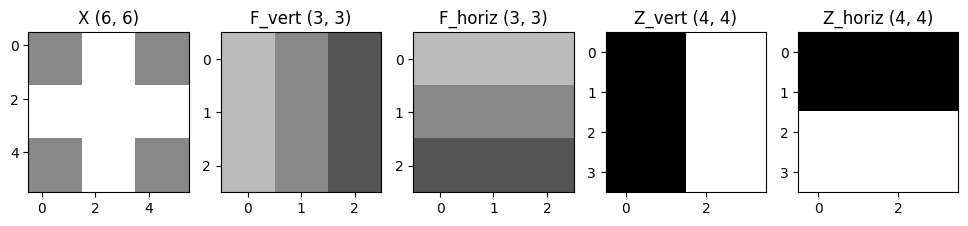

In [30]:
a007700 = np.array([0, 0, 7, 7, 0, 0])
a777777 = np.array([7, 7, 7, 7, 7, 7])
X = np.array([a007700, a007700, a777777, a777777, a007700, a007700]) 
F_vert = np.array([[3, 0, -3], [3, 0, -3], [3, 0, -3]])
F_horiz = np.array([[3, 3, 3], [0, 0, 0], [-3, -3, -3]])  # f_vert.T

def conv2D(X, F):
    X_H, X_W = X.shape
    f_H, f_W = F.shape

    # Initialize Z based on dimension formula for height/width
    Z_H = X_H - f_H + 1
    Z_W = X_W - f_W + 1
    Z = np.zeros((Z_H, Z_W))

    # Update Z[m, n] based on various i,j iterations over X and f
    for m in range(Z_H):
        for n in range(Z_W):
            for i in range(m, f_H + m):  # omitting -1 to include final value
                for j in range(n, f_W + n):  # omitting -1 to include final value
                    Z[m, n] += X[i, j] * F[i - m, j - n]
                    #print(f"{m=}, {n=}, {i=}, {j=}, X={X[i, j]}, f={F[i - m, j - n]}, Z={Z[m, n]}")

    return Z

Z_vert = conv2D(X, F_vert)
Z_horiz = conv2D(X, F_horiz)

fig, ax = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(12, 4)
for axis, name in zip(ax, ["X", "F_vert", "F_horiz", "Z_vert", "Z_horiz"]):
    matrix = locals()[name]
    text = f"{name} {matrix.shape}"
    axis.set_title(text); print(f"\n{text}\n{matrix}")
    axis.imshow(matrix, cmap="gray", vmin=-8, vmax=7)

#### Computing dJ/dZ, dJ/dA, dJ/dW, and dJ/db
Computing $\frac{\partial J}{\partial Z^{[l]}}$ is the same as an MLP as it requires an element-wise (Hadamard) product between the activation value gradients $\frac{\partial J}{\partial A^{[l]}}$ and the derivative of the activation function $g^{[l]'}(Z^{[l]})$. Unlike MLP, computing $\frac{\partial J}{\partial A^{[l-1]}}$ is not necessary to determine the weight derivatives at layer $l$ but is necessary for backwards propagation calculations at the previous layer. It consists of multiplying a given filter $W_c$ by individual scalar values within $\frac{\partial J}{\partial Z^{[l]}}$, which is the exact same operation as forward propagation in a transverse convolutional layer. Unlike that operation, $A^{[l-1]}$ is required to compute the weights, so the exact code cannot be reused. Computing the weights for a given filter $\frac{\partial J}{\partial W_c^{[l]}}$ multiplies the slice of previous-layer activations $A^{[l-1]}_{slice}$ (used to generate $Z^{[l]}$ during forward propagation) by the comparable values of $\frac{\partial J}{\partial Z^{[l]}}$. Last, computing $\frac{\partial J}{\partial b_c^{[l]}}$, the bias for a given filter, requires summing the values of $\partial Z^{[l]}$.

$$
\begin{aligned}
\frac{\partial J}{\partial Z^{[l]}} & =  \frac{\partial J}{\partial A^{[l]}} \odot g^{[l]'}(Z^{[l]}) \\
\frac{\partial J}{\partial A^{[l-1]}} & = \sum\limits_{i=1}^{n_H} \sum\limits_{j=1}^{n_W} W_c^{[l]} \odot \frac{\partial J}{\partial Z^{[l]}_{i,j}} \\
\frac{\partial J}{\partial W_c^{[l]}} & = \sum\limits_{i=1}^{n_H} \sum\limits_{j=1}^{n_W} A^{[l-1]}_{slice} \odot \frac{\partial J}{\partial Z^{[l]}_{i,j}}  \\
\frac{\partial J}{\partial b_c^{[l]}} & = \sum\limits_{i=1}^{n_H} \sum\limits_{j=1}^{n_W} \frac{\partial J}{\partial Z^{[l]}_{i,j}}
\end{aligned}
$$

The matrices below support the example shown in code. Note that `W` is the same as `F` in other contexts, such as those describing forward propagation. Also note that `dZ` replaces `X` (or `A_l1`) in the context of  transposed convolutional forward propagation operations given the reversed directionality. For consistency, `db` is drawn as a matrix with shape $(1,1)$ but in reality, it's a per-filter scalar.

$$
A^{[l-1]} =
\begin{bmatrix}
-1 & 6 & 4 & -1 \\
2 & 2 & -1 & -2 \\
-7 & 8 & 2 & 6 \\
-4 & -2 & -6 & -3
\end{bmatrix}
\hspace{35pt}\frac{\partial J}{\partial Z^{[l]}} =
\begin{bmatrix}
-5 & 1 \\
2 & -2 
\end{bmatrix}
\hspace{35pt}W^{[l]}_c =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
\frac{\partial J}{\partial A^{[l-1]}} =
\begin{bmatrix}
-1 & 6 & 4 & -1 \\
2 & 2 & -1 & -2 \\
-7 & 8 & 2 & 6 \\
-4 & -2 & -6 & -3
\end{bmatrix}
\hspace{35pt}\frac{\partial J}{\partial W_c^{[l]}} =
\begin{bmatrix}
-11 & -20 & -19 \\
-38 & 1 & -5 \\
39 & -30 & -10
\end{bmatrix}
\hspace{35pt}
\frac{\partial J}{\partial b_c^{[l]}} =
\begin{bmatrix}
-4
\end{bmatrix}
$$


dA_l1 (4, 4)
[[ 5. -1. -5.  1.]
 [ 3.  1. -3. -1.]
 [ 3.  1. -3. -1.]
 [-2.  2.  2. -2.]]

dW (3, 3)
[[ 11. -20. -19.]
 [-38.   1.  -5.]
 [ 39. -30. -10.]]

db (1, 1)
[[-4.]]


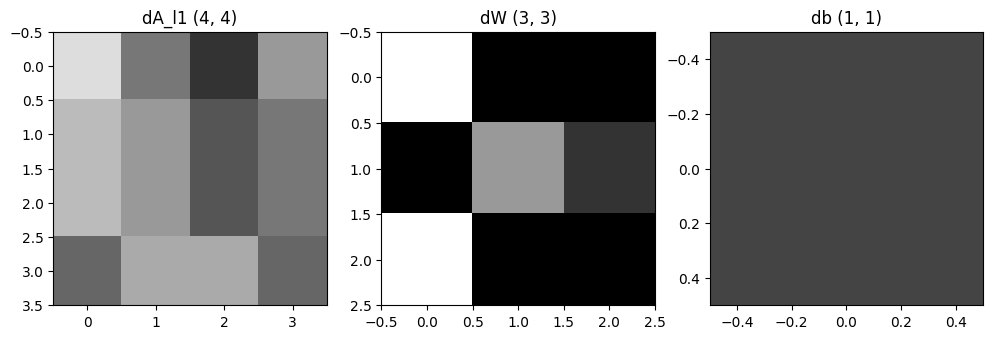

In [31]:
A_l1 = np.array([[-1, 6, 4, -1], [2, 2, -1, -2], [-7, 8, 2, 6], [-4, -2, -6, -3]])
dZ = np.array([[-5, 1], [2, -2]])
W = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) # F_vert
s = 1

dA_l1 = np.zeros((A_l1.shape)) 
nH, nW = dZ.shape
dW = np.zeros(W.shape)
db = np.zeros((1, 1))

# Update derivatives based on various i,j iterations over dZ
for i in range(nH):
    for j in range(nW):
            vs = i * s; ve = vs + W.shape[0]
            hs = j * s; he = hs + W.shape[1]
            dA_l1[vs:ve, hs:he] += W * dZ[i, j]  # same logic as transconv forward prop
            dW += A_l1[vs:ve, hs:he] * dZ[i, j]
            db += dZ[i, j]

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
for axis, name in zip(ax, ["dA_l1", "dW", "db"]):
    matrix = locals()[name]
    text = f"{name} {matrix.shape}"
    axis.set_title(text); print(f"\n{text}\n{matrix}")
    axis.imshow(matrix, cmap="gray", vmin=-8, vmax=7)

### Pooling Layer (POOL)

#### Overview
Pooling is a mechanism to decrease the height and width of a matrix (downsample) by reducing all cells under the corresponding filter to a single value.

#### Computing Z
In a convolutional layer, multiple filters (feature selectors) can be applied. Each one is represented as a channel in the output matrix $Z^{[l]}$. Those filters always have the same depth as the input matrix $Z^{[l-1]}$. In contrast, pooling filters are always 2D matrices. They are applied individually to each channel of the input matrix $Z^{[l-1]}$, resulting in an output matrix $Z^{[l]}$ that has the same number of channels. As it relates to the output matrix $Z^{[l-1]}$, "network in network" filters of shape $(1,1,n_C^{[l-1]})$ can only shrink the number of channels $n_C^{[l]}$ while pooling can only shrink the height $n_H^{[l]}$ and width $n_H^{[l]}$. The techniques can powerfully combine to reform matrices within the network.

Pooling layers seldom use padding ($p^{[l]}=0$), although Inception networks are an exception, which is discussed later. This reduces the convolutional dimension equations to the following:

$$
\begin{aligned}
n_H^{[l]} & = \Bigl\lfloor \frac{n_H^{[l-1]} - f^{[l]}}{s^{[l]}} \Bigr\rfloor + 1 \\
n_W^{[l]} & = \Bigl\lfloor \frac{n_W^{[l-1]} - f^{[l]}}{s^{[l]}} \Bigr\rfloor + 1 \\
n_C^{[l]} & = n_C^{[l-1]}
\end{aligned}
$$

Additionally, pooling does not have any trainable parameters. It has hyperparameters for the filter size $f^{[l]}$, stride $s^{[l]}$, and type of pooling. The two most commonly pooling types are described below:

1.  __max__: "Max pooling" examines all input matrix $A^{[l-1]}$ cells within the filter's window. It then assigns the maximum value to the proper position in the output matrix $Z^{[l]}_{m,n}$. This technique tends to highlight key aspects with a given window while discarding less important aspects.

2.  __average__: "Average pooling" examines all input matrix $A^{[l-1]}$ cells within the filter's window. It then assigns the mean (average) value to the proper position in the output matrix $Z^{[l]}_{m,n}$. This technique tends to equally summarize all of the cells within the filter's window.

Because there are no trainable parameters for pooling layers, they are often considered "part" of the previous convolutional layers in literature. This document treats pooling as a separate layer to be consistent with a notation used for documenting MLP. Pooling layers also have their own formulas for backward propagation. This is only for the benefit of previous layers given the lack of trainable parameters.

The code below demonstrates pooling using an input matrix similar to the previous example. Some shades of gray have been changed to differentiate between the types of pooling. Also, the stride is set to the filter size to eliminate any overlap of cell processing. This technique is not required, but is demonstrated for technical variety. Given an input matrix $X=Z^{[0]}$ of shape $(6,6)$, a pooling filter $f^{[l]}$ of shape $(2,2)$, and a stride $s^{[l]}$ of 2, the resulting matrix $Z^{[1]}$ will have shape $(3,3)$.

f_size: 2

X (6, 6)
[[0 0 7 7 0 0]
 [0 0 7 7 0 0]
 [3 7 3 5 7 3]
 [3 7 3 5 7 3]
 [0 0 7 7 0 0]
 [0 0 7 7 0 0]]

Z_max (3, 3)
[[0. 7. 0.]
 [7. 5. 7.]
 [0. 7. 0.]]

Z_avg (3, 3)
[[0. 7. 0.]
 [5. 4. 5.]
 [0. 7. 0.]]


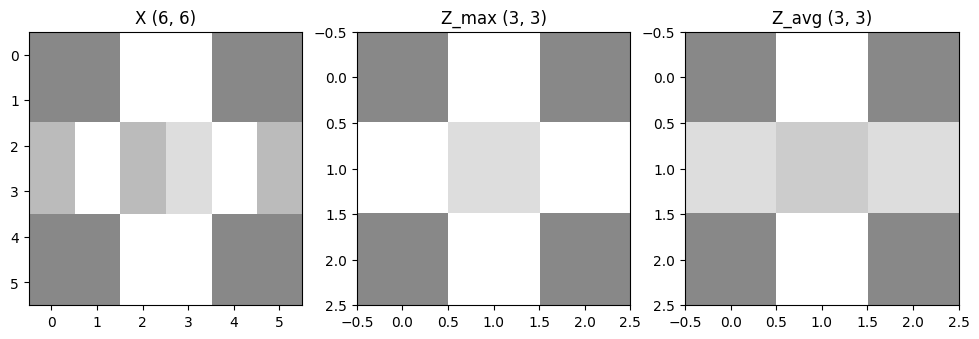

In [32]:
a007700 = np.array([0, 0, 7, 7, 0, 0])
a373573 = np.array([3, 7, 3, 5, 7, 3])
X = np.array([a007700, a007700, a373573, a373573, a007700, a007700])
f_size = 2
print(f"f_size: {f_size}")

def pool2D(X, f_size, pool_func):

    s = f_size
    X_H, X_W = X.shape

    # Initialize Z based on number of times filter fits
    Z_H = X_H // f_size
    Z_W = X_W // f_size
    Z = np.zeros((Z_H, Z_W))

    # Update Z[m, n] based on various i,j iterations over X and f
    for m in range(Z_H):
        for n in range(Z_W):
            for i in range(m, f_size + m, s):  # omitting -1 to include final value
                for j in range(n, f_size + n, s):  # omitting -1 to include final value
                    Z[m, n] = pool_func(X[i * s:i * s + f_size, j * s:j * s + f_size])
                    # print(f"{m=}, {n=}, {i=}, {j=}, X={X[i, j]}, Z={Z[m, n]}")
    return Z

Z_max = pool2D(X, f_size, np.max)
Z_avg = pool2D(X, f_size, np.mean)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
for axis, name in zip(ax, ["X", "Z_max", "Z_avg"]):
    matrix = locals()[name]
    text = f"{name} {matrix.shape}"
    axis.set_title(text); print(f"\n{text}\n{matrix}")
    axis.imshow(matrix, cmap="gray", vmin=-8, vmax=7)

#### Computing dJ/dA given dJ/dZ
For max pooling, only the largest value contributes to the overall cost. The remaining activations should have a gradient of 0. A bit mask representing the position of the maximum values from $A^{[l-1]}$ is multiplied by $\frac{\partial J}{\partial Z^{[l]}}$ to form $\frac{\partial J}{\partial A^{[l-1]}}$. This matrix has the same shape as $A^{[l-1]}$.

$$
A^{[l-1]} =
\begin{bmatrix}
-1 & 6 & 4 & -1 \\
2 & 2 & -1 & -2 \\
-7 & 8 & 2 & 6 \\
-4 & -2 & -6 & -3
\end{bmatrix}
\rightarrow \text{maxpool(s=2,f=2)} \rightarrow
Z^{[l]} =
\begin{bmatrix}
6 & 4 \\
8 & 6
\end{bmatrix}
$$

$$
\frac{\partial J}{\partial A^{[l-1]}} =
\begin{bmatrix}
0 & -5 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 2 & 0 & -2 \\
0 & 0 & 0 & 0
\end{bmatrix}
\leftarrow\
A^{[l-1]}_{mask} =
\begin{bmatrix}
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 \\
0 & 0 & 0 & 0
\end{bmatrix}
\leftarrow
\frac{\partial J}{\partial Z^{[l]}} =
\begin{bmatrix}
-5 & 1 \\
2 & -2
\end{bmatrix}
$$

For average pooling, the flow is similar, except the bit mask is replaced by an even distribution across the values of $\frac{\partial J}{\partial Z^{[l]}}$. The shape of this distribution matrix is the same shape as the filter. Given a filter with height $f_H=2$ and width $f_W=2$, the distribution matrix values all become $\frac{1}{f_H \cdot f_W} = \frac{1}{4}$. This is then multiplied by values of $\frac{\partial J}{\partial Z^{[l]}}$ to form $\frac{\partial J}{\partial A^{[l-1]}}$.

$$
A^{[l-1]} =
\begin{bmatrix}
-1 & 6 & 4 & -1 \\
2 & 2 & -1 & -2 \\
-7 & 8 & 2 & 6 \\
-4 & -2 & -6 & -3
\end{bmatrix}
\rightarrow \text{avgpool(s=2,f=2)} \rightarrow
Z^{[l]} =
\begin{bmatrix}
2.25 & 0 \\
-1.25 & -0.25
\end{bmatrix}
$$

$$
\frac{\partial J}{\partial A^{[l-1]}} =
\begin{bmatrix}
-1.25 & -1.25 & 0.25 & 0.25 \\
-1.25 & -1.25 & 0.25 & 0.25 \\
0.5 & 0.5 & -0.5 & -0.5 \\
0.5 & 0.5 & -0.5 & -0.5
\end{bmatrix}
\leftarrow\
\frac{\partial J}{\partial Z^{[l]}_{dist}} =
\begin{bmatrix}
0.25 & 0.25 \\
0.25 & 0.25
\end{bmatrix}
\leftarrow
\frac{\partial J}{\partial Z^{[l]}} =
\begin{bmatrix}
-5 & 1 \\
2 & -2
\end{bmatrix}
$$

dZ
[[-5  1]
 [ 2 -2]]

A_l1
[[-1  6  4 -1]
 [ 2  2 -1 -2]
 [-7  8  2  6]
 [-4 -2 -6 -3]]

dA_l1 max
[[ 0. -5.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  2.  0. -2.]
 [ 0.  0.  0.  0.]]

dA_l1 avg
[[-1.25 -1.25  0.25  0.25]
 [-1.25 -1.25  0.25  0.25]
 [ 0.5   0.5  -0.5  -0.5 ]
 [ 0.5   0.5  -0.5  -0.5 ]]



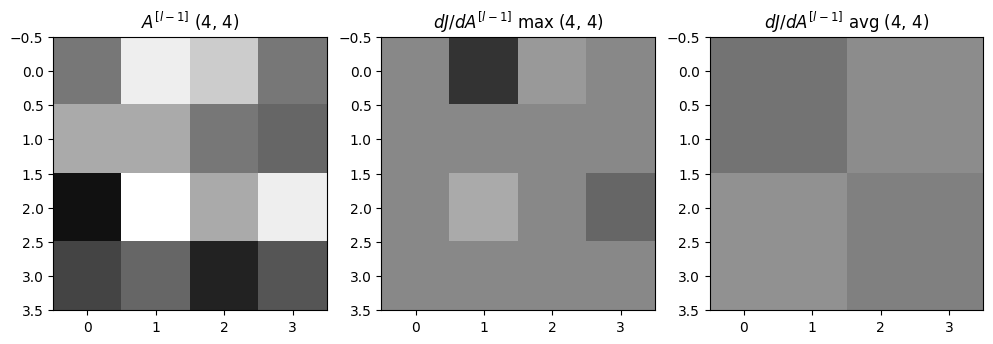

In [33]:
# Forward prop activations from previous layer (via cache) and backprop dJ/dZ are inputs
A_l1 = np.array([[-1, 6, 4, -1], [2, 2, -1, -2], [-7, 8, 2, 6], [-4, -2, -6, -3]])
dZ = np.array([[-5, 1], [2, -2]])
nH, nW = dZ.shape
s, f = 2, 2

dA_l1_dict = {"max": np.zeros(A_l1.shape), "avg": np.zeros(A_l1.shape)}

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
print(f"dZ\n{dZ}\n")
print(f"A_l1\n{A_l1}\n")
ax[0].set_title("$A^{[l-1]}$ " + str(A_l1.shape))
ax[0].imshow(A_l1, cmap="gray", vmin=-8, vmax=7)

for (mode, dA_l1), axis in zip(dA_l1_dict.items(), ax[1:]):

    # Loop over each element of dZ
    for i in range(nH):
        for j in range(nW):
            vs = i * s; ve = vs + f
            hs = j * s; he = hs + f
            A_l1_slice = A_l1[vs:ve, hs:he]

            # Compute binary mask matrix of shape (f,f)
            if mode == "max":
                mask = (A_l1_slice == np.max(A_l1_slice))

            # Compute mask value (scalar float)
            elif mode == "avg":
                mask = 1 / (f**2)

            # Add product of mask (max or avg) and dZ values to dA_l1.
            dA_l1[vs:ve, hs:he] += mask * dZ[i, j]
        
    print(f"dA_l1 {mode}\n{dA_l1}\n")
    axis.set_title("$dJ/dA^{[l-1]}$ " + f"{mode} {dA_l1.shape}")
    axis.imshow(dA_l1, cmap="gray", vmin=-8, vmax=7)

### Fully Connected Layer (FC)

#### Overview
This is a "dense" layer resembling those within an MLP. The input features must be unrolled/flattened, effectively applying: $n_H^{[l]} \times n_W^{[l]} \times n_C^{[l]} = n^{[l]}$. These are typically introduced towards the end of the CNN to make classification predictions, either binary classifications (sigmoid) or multiple classifications (softmax). By this point in the network, the number of units per layer is relatively small, such as on the order of hundreds rather than thousands. This is significantly reduces the dimensions of the weights $W^{[l]}$ and biases $b^{[l]}$ at these dense layers.

### Tranpose Convolution (TRANSCONV)

#### Overview
Valid-padded convolution and pooling techniques tend to decrease the height and width of volume while increasing the number of channels (depth). Transpose convolution, sometimes called de-convolution or un-convolution, reverses this process. This is useful when implementing __semantic segmentation__, enabling precise per-pixel classifications rather than using boundary boxes or landmarks. The U-Net architecture makes extensive use of this technique.

#### Computing Z
Each value of the previous layer's activations $A^{[l-1]}$ are multiplied by all of the filter's values in element-wise (broadcasted) fashion, resulting in a new matrix of shape $(f^{[l]}, f^{[l]})$, the same as the filter. This new matrix is overlaid onto $Z^{[l]}$ based on the stride and padding configured. If padding is applied, the padded cells surrounding $Z^{[l]}$ act as sinks. Those cells are only used for alignment with the projected matrix, but don't retain any values. The example below assumes valid padding $(p^{[l]}=0)$ with the minimum stride $(s^{[l]}=1)$.

Let $F$ be the filter matrix at layer $l$ of shape $(f^{[l]}, f^{[l]})$. Let $A^m_n=A^{[l-1]}_{m,n}$ to represent the previous layer's activations at a specific cell at row $m$ and column $n$, starting at 0. Assume $A$ has shape $(2,2)$. Both notations are compressed due to page width limitations. The values in the corners are visited once, those on the edges twice, and those in the center 4 times. An interesting property of this generic matrix is that the sum of the superscripts (row) and subscripts (column) for each $A \cdot F$ quantity equals the cell location of $Z$. For example, at $Z_{1,1}$ there are 4 quantities that comprise the cell's value:

1. $A^0_0 \cdot F^1_1$: $0,0 + 1,1 = 1,1$
2. $A^0_1 \cdot F^1_0$: $0,1 + 1,0 = 1,1$
3. $A^1_0 \cdot F^0_1$: $1,0 + 0,1 = 1,1$
4. $A^1_1 \cdot F^0_0$: $1,1 + 0,0 = 1,1$

$$
A^{[l-1]} = A^{row}_{col} =
\begin{bmatrix}
A^0_0 & A^0_1 \\
A^1_0 & A^1_1
\end{bmatrix}
\hspace{35pt}F^{[l]} = F^{row}_{col} =
\begin{bmatrix}
F^0_0 & F^0_1 & F^0_2 \\
F^1_0 & F^1_1 & F^1_2 \\
F^2_0 & F^2_1 & F^2_2
\end{bmatrix}
$$

$$
Z^{[l]} =
\begin{bmatrix}
% first row
(A^0_0 \cdot F^0_0) &
(A^0_0 \cdot F^0_1 + A^0_1 \cdot F^0_0) &
(A^0_0 \cdot F^0_2 + A^0_1 \cdot F^0_1) &
(A^0_1 \cdot F^0_2) \\
% second row
(A^0_0 \cdot F^1_0 + A^1_0 \cdot F^0_0) &
(A^0_0 \cdot F^1_1 + A^0_1 \cdot F^1_0 + A^1_0 \cdot F^0_1 + A^1_1 \cdot F^0_0) &
(A^0_0 \cdot F^1_2 + A^0_1 \cdot F^1_1 + A^1_0 \cdot F^0_2 + A^1_1 \cdot F^0_1) &
(A^0_1 \cdot F^1_2 + A^1_1 \cdot F^0_2) \\
% third row
(A^0_0 \cdot F^2_0 + A^1_0 \cdot F^1_0) &
(A^0_0 \cdot F^2_1 + A^0_1 \cdot F^2_0 + A^1_0 \cdot F^1_1 + A^1_1 \cdot F^1_0) &
(A^0_0 \cdot F^2_2 + A^0_1 \cdot F^2_1 + A^1_0 \cdot F^1_2 + A^1_1 \cdot F^1_1) &
(A^0_1 \cdot F^2_2 + A^1_1 \cdot F^1_2) \\
% fourth row
(A^1_0 \cdot F^2_0) &
(A^1_0 \cdot F^2_1 + A^1_1 \cdot F^2_0) &
(A^1_0 \cdot F^2_2 + A^1_1 \cdot F^2_1) &
(A^1_1 \cdot F^2_2) \\
\end{bmatrix}
$$

This formula is a good approximation of the aforementioned algorithm. The logic is similar to computing $\frac{\partial J}{\partial A^{[l-1]}}$ for a regular convolutional layer during backwards propagation. The difference is that $Z^{[l]}$, initialized to all zeros, is updated by the element-wise product of the filter $F^{[l]}$ and previous layer's activation values at a given cell $A^{[l-1]}_{i,j}$. These cells were depicted as $A^i_j$ above.

$$
Z^{[l]} \mathrel{+}= \sum\limits_{i=1}^{n^{[l-1]}_H} \sum\limits_{j=1}^{n^{[l-1]}_W} F^{[l]} \odot A^{[l-1]}_{i,j}
$$
 
The specific example implemented in the following code is depicted below using the same 16-bit grayscale method seen in previous examples.

$$
X =
\begin{bmatrix}
0 & 4 \\
0 & 4
\end{bmatrix}
\hspace{35pt}F^{[1]}_{vert}  =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
\hspace{35pt}Z^{[1]}_{vert} =
\begin{bmatrix}
0 & -4 & 0 & 4 \\
0 & -8 & 0 & 8 \\
0 & -8 & 0 & 8 \\
0 & -4 & 0 & 4
\end{bmatrix}
\hspace{35pt}F^{[1]}_{horiz}  =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
\hspace{35pt}Z^{[1]}_{horiz} =
\begin{bmatrix}
0 & -4 & -4 & -4 \\
0 & -4 & -4 & -4 \\
0 & 4 & 4 & 4 \\
0 & 4 & 4 & 4
\end{bmatrix}
$$


X (2, 2)
[[0 4]
 [0 4]]

F_vert (3, 3)
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Z_vert (4, 4)
[[ 0. -4.  0.  4.]
 [ 0. -8.  0.  8.]
 [ 0. -8.  0.  8.]
 [ 0. -4.  0.  4.]]

F_horiz (3, 3)
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]

Z_horiz (4, 4)
[[ 0. -4. -4. -4.]
 [ 0. -4. -4. -4.]
 [ 0.  4.  4.  4.]
 [ 0.  4.  4.  4.]]


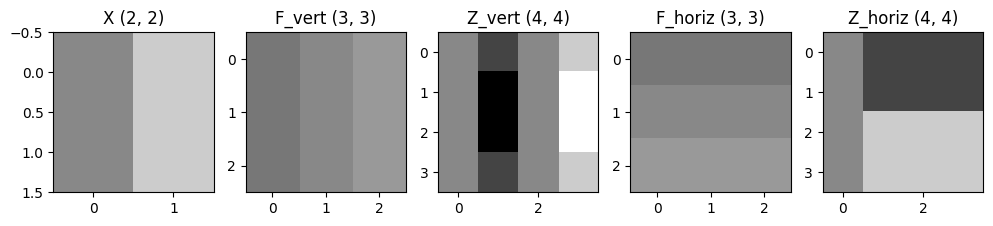

In [34]:
X = np.array([[0, 4], [0, 4]])
F_vert = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
F_horiz = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

def transconv2D(X, F):
    fh, fw = F.shape
    xh, xw = X.shape
    Z = np.zeros((xh + fh - 1, xw + fw - 1))
    for i in range(xh):
        for j in range(xw):
            Z[i: i + fh, j: j + fw] += X[i, j] * F
    return Z

Z_vert = transconv2D(X,F_vert)
Z_horiz = transconv2D(X,F_horiz)

fig, ax = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(12, 4)
for axis, name in zip(ax, ["X", "F_vert", "Z_vert", "F_horiz", "Z_horiz"]):
    matrix = locals()[name]
    text = f"{name} {matrix.shape}"; print(f"\n{text}\n{matrix}")
    axis.set_title(text)
    axis.imshow(matrix, cmap="gray", vmin=-8, vmax=7)

#### Computing dJ/dA given dJ/dZ

Just as the forward propagation step of computing Z in a transpose convolutional layer is similar to the backwards propagation step of computing dA, so too is the reverse. Given $\frac{\partial J}{\partial Z^{[l]}}$, apply the forward propagation convolutional layer step to get $\frac{\partial J}{\partial A^{[l-1]}}$.

$$
\frac{\partial J}{\partial A^{[l-1]}_{m,n}} = \sum\limits^{f^{[l]}_H-1+m}_{i=m} \sum\limits^{f^{[l]}_W-1+n}_{j=n}
\frac{\partial J}{\partial Z^{[l]}_{i,j}} \odot F^{[l]}_{i-m, j-n}
$$

### Object Detection

#### Overview
This section discusses algorithms and strategies for detecting objects within an image using bounding boxes, landmarks, and more. Identifying the specific area occupied by an object of interest it is sometimes called __localization__.

#### Bounding Boxes and Landmarks
When training a CNN, the basic structure of $Y$ changes. A __bounding box__ attempts to draw a rectangle around the object of interest .For a binary classification problem, there are 5 values for each $y^{(m)}$ column vector. $P_c$, short for "probability of classification", is the sigmoid activation output to determine whether the object of interest is contained in the image or not. The next 4 values determine the rectangle's shape. $b_x$ and $b_y$ represent the position at the center of the box relative to the image sized, scaled to values between 0 and 1. $b_h$ and $b_w$ measure the ratio of the bounding box compared to image size. For example, a tall and skinny object (like a person) will occupy a larger share of the image's height compared to its width assuming the image with square-shaped.

$$
y_{singleclass} (5, m) =
\begin{bmatrix}
y^{(1)}_{P_c} & y^{(2)}_{P_c} & \cdots & y^{(m)}_{P_c} \\
y^{(1)}_{b_x} & y^{(2)}_{b_x} & \cdots & y^{(m)}_{b_x} \\
y^{(1)}_{b_y} & y^{(2)}_{b_y} & \cdots & y^{(m)}_{b_y} \\
y^{(1)}_{b_h} & y^{(2)}_{b_h} & \cdots & y^{(m)}_{b_h} \\
y^{(1)}_{b_w} & y^{(2)}_{b_w} & \cdots & y^{(m)}_{b_w}
\end{bmatrix}
$$

If there are multiple classes, additional class variables are neede to specify the type of object contained in the bounding box. If there are 3 classes (e.g., cat, dog, human), then let $k=3$. Thus, $k$ extra class probabilities are appended to $y^{(m)}$. Now, $P_c$ only answers the question as to whether there are any objects of interest in the image. The matrix below generalizes the structure.

$$
y_{multiclass} (5 + k, m) =
\begin{bmatrix}
y^{(1)}_{P_c} & y^{(2)}_{P_c} & \cdots & y^{(m)}_{P_c} \\
y^{(1)}_{b_x} & y^{(2)}_{b_x} & \cdots & y^{(m)}_{b_x} \\
y^{(1)}_{b_y} & y^{(2)}_{b_y} & \cdots & y^{(m)}_{b_y} \\
y^{(1)}_{b_h} & y^{(2)}_{b_h} & \cdots & y^{(m)}_{b_h} \\
y^{(1)}_{b_w} & y^{(2)}_{b_w} & \cdots & y^{(m)}_{b_w} \\
y^{(1)}_{P_{c1}} & y^{(2)}_{P_{c1}} & \cdots & y^{(m)}_{P_{c1}} \\
y^{(1)}_{P_{c2}} & y^{(2)}_{P_{c2}} & \cdots & y^{(m)}_{P_{c2}} \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{P_{ck}} & y^{(2)}_{P_{ck}} & \cdots & y^{(m)}_{P_{ck}}
\end{bmatrix}
$$

A less common alternative to bounding boxes is __landmarks__. These are specific points on the image specified by $(x,y)$ position relative to the image, similar to the center of a bounding box. Note that when training a CNN with landmark labels, the landmarks specified in $Y$ must be consistently positioned. For example, the first landmark $l_1$ must always be above the left eye, while the second landmark $l_2$ must always be above the right eye. Now, the length of each $y^{(m)}$ column vector becomes a function of both of the number of classes $k$ and the number of two-value landmarks $2l$. Landmarks are often used to modify or enhance images, like adding a "hat" or "sunglasses" filter on a picture-sharing app.

$$
y_{multiclass} (1 + 2l + k, m) =
\begin{bmatrix}
y^{(1)}_{P_c} & y^{(2)}_{P_c} & \cdots & y^{(m)}_{P_c} \\
y^{(1)}_{l_{1x}} & y^{(2)}_{l_{1x}} & \cdots & y^{(m)}_{l_{1x}} \\
y^{(1)}_{l_{1y}} & y^{(2)}_{l_{1y}} & \cdots & y^{(m)}_{l_{1y}} \\
y^{(1)}_{l_{2x}} & y^{(2)}_{l_{2x}} & \cdots & y^{(m)}_{l_{2x}} \\
y^{(1)}_{l_{2y}} & y^{(2)}_{l_{2y}} & \cdots & y^{(m)}_{l_{2y}} \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{P_{c1}} & y^{(2)}_{P_{c1}} & \cdots & y^{(m)}_{P_{c1}} \\
y^{(1)}_{P_{c2}} & y^{(2)}_{P_{c2}} & \cdots & y^{(m)}_{P_{c2}} \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{P_{ck}} & y^{(2)}_{P_{ck}} & \cdots & y^{(m)}_{P_{ck}}
\end{bmatrix}
$$

Note that when $P_c=0$, none of the other values matter. There are no bounding boxes to draw or landmarks to identify. Since the image contains no objects of interest, the probabilities for the individual classes ${P_{ck}}$ also don't matter. The CNN will ignore these values on input during training (evaluating $Y$) and will use random noise as output when making predictions (generating $\hat{Y}$)

With respect to cost functions, a hybrid approach is sometimes used. Although mean squared error (MSE) will likely perform tolerably if used across all of $y^{(m)}$, it is common to use a cross entropy variant for the probability values. If $P_c=0$ on a training example, only the loss between $P_c$ components of $Y$ and $\hat{Y}$ matter, much like logistic regression, because the other values are noise.

#### Sliding Window
This algorithm uses a filter (the sliding window) that pan an image, similar to the motion of a convolutional filter.  In order to determine whether the object under the sliding window matches the object of interest, you typically train a CNN using closely-cropped images, containing those objects of interest. That CNN will make predictions for each sub-image under the sliding window. If the desired object is seen within that filter, the algorithm returns 1, otherwise it returns 0. This process repeats with different values of $f$ to control filter size and $s$ to control stride size.

This process is computationally expensive given that the CNN must make many predictions for every sub-image under many variable-sized sliding windows. One optimization is to replace the fully-connected layers with convolutional layers. To do that, set the number of filters is equal to the number of units previously contained in the fully-connected layer ($n_C^{[l]}$). Also, set the height and width of the filters equal to the dimensions of the previous layer's outputs $(f_H^{[l]} = n_H^{[l-1]}, f_W^{[l]} = n_W^{[l-1]})$. This yields an output of shape $(1,1,n_C^{[l]})$, which closely resembles the shape of the fully-connected layer. This is more computationally efficient as it shares computations better when sliding window regions overlap. Said another way, the filter doesn't iteratively "pan and compute" in isolation using a convolutional layer.

#### You Only Look Once (YOLO)
This algorithm breaks an image into a grid, make it easier to identify precise bounding boxes for objects of interest detected. Objects within the image are assigned to a single cell within the grid. The upper left corner of the image is considered the origin at position $(0,0)$ in the lower right is position $(1,1)$. This way, all positional values are between 0 and 1. Supposing there are 3 possible classes of interesting objects, the training labels for a grid cell will have 8 elements to account for the probability of any object of interest being present in the grid cell ($P_c$), the bounding box location measurements $(b_x, b_y, b_h, b_w)$, and the probabilities of each class $(P_{c1}, P_{c2}, P_{c3})$. These per-class probabilities are typically one-hot encoded for training, better aligning to the softmax-like probabilities generated for each class during prediction. This process operates on a per grid cell basis, so supposing the grid was $10 \times 10$, each input image would be represented by 100 vectors of length 8. The output volume's shape from the algorithm would therefore be $(10,10,8)$.

To evaluate the accuracy of a bounding box prediction is to use the __Intersection over Union (IoU)__ method. This computes the area of the bounding boxes supplied by $Y$ and $\hat{Y}$ for a given training example. Next, it divides the intersection of the areas by the union of the areas, then compares the quotient to a threshold. If the ratio is greater than 0.5, it is commonly considered a good prediction. Since this is a human-chosen threshold, raising it will lead to more accurate bounding box predictions.

When using a finely-grained grid, many adjacent cells may claim to see an object of interest ($P_c \ge 0.5$), even if they only see a part of it. YOLO requires the object to be assigned to only one cell even if the bounding box spans multiple cells. __Non-max suppression__ compares all of the $P_c$ values and summarily discards those less than a threshold, say 0.6 for example. These cells don't contain any part of the object and don't require further evaluation. Then, the algorithm finds the cell with the highest $P_c$ value and discards adjacent abounding boxes with a high IoU (say, 0.5) with respect to the best bounding box. The algorithm runs independently for each class to get the final prediction. As described by the name, this enhancement suppresses any boxes that are not "maximal", leading to a single answer.

Sometimes there are multiple objects of different classes within the same grid cell. YOLO can use __anchor boxes__ to classify these objects independently. Each anchor box is represented by its own set of labels in $Y$. For example, if there are 3 classes, there will be 8 values in the the $y$ column vector associated with a single cell. If 2 separate anchor boxes are adequate to capture these 3 classes, there will be 16 values in $y$, one for each anchor box. Objects are now assigned to a specific anchor box within a specific grid cell. The anchor box to which an object is assigned is based on the highest computed IoU. Given a $10 \times 10$ grid, the resulting volume has shape $(10,10,16)$. Sometimes this is expressed as a 4 dimensional shape which independently accounts for the number of anchor boxes (2), and the values within each anchor box (8), such as $(10,10,2,8)$. This structure is more explicit but is harder to visualize; this book prefers the consolidated 3D format.

You can determine anchor box sizes manually if you have an intuition regarding their dimensions and quantity. Alternatively, you can use the k-means unsupervised learning algorithm to discover clusters of objects, then create the appropriate anchor boxes. Anchor boxes are defined only by their height and width, not their position within a grid cell, unlike a bounding box which has all 4.. Note that if the number of object shapes is greater than the number of anchor boxes, the algorithm performs poorly. Also, if several classes have the same anchor box shape, the algorithm is forced to select only one, also leading to poor performance. In practice, multiple objects appearing in the same cell (assuming a finely-grained grid) is relatively rare.

The matrix below visualizes the structure just described using $?$ to represent random noise. Each item below describes a corresponding column in the matrix from left to right. Discrete numbers are plausible sample values.

1. Notation reference using superscripts $[A]$ and $[B]$ for anchor box identifiers.
2. Cell contains an object for anchor box A (class 1) and anchor box B (class 2).
3. Cell contains an object for anchor box A (class 2) but not anchor box B.
4. Cell contains an object for anchor box B (class 3) but not anchor box A.
5. Cell contains no objects of interest.

$$
Y =
\begin{bmatrix}
y^{[A]}_{P_c} & 1 & 1 & 0 & 0 \\
y^{[A]}_{b_x} & 0.5 & 0.4 & ? & ? \\
y^{[A]}_{b_y} & 0.2 & 0.7 & ? & ? \\
y^{[A]}_{b_h} & 1.4 & 2.1 & ? & ? \\
y^{[A]}_{b_w} & 0.8 & 0.3 & ? & ? \\
y^{[A]}_{P_{c1}} & 1 & 0 & ? & ? \\
y^{[A]}_{P_{c2}} & 0 & 1 & ? & ? \\
y^{[A]}_{P_{c3}} & 0 & 0 & ? & ? \\
y^{[B]}_{P_c} & 1 & 0 & 1 & 0 \\
y^{[B]}_{b_x} & 0.3 & ? & 0.5 & ? \\
y^{[B]}_{b_y} & 0.6 & ? & 0.7 & ? \\
y^{[B]}_{b_h} & 1.1 & ? & 1.6 & ? \\
y^{[B]}_{b_w} & 2.4 & ? & 0.9 & ? \\
y^{[B]}_{P_{c1}} & 0 & ? & 0 & ? \\
y^{[B]}_{P_{c2}} & 1 & ? & 0 & ? \\
y^{[B]}_{P_{c3}} & 0 & ? & 1 & ?
\end{bmatrix}
$$

### Face Recognition

#### Overview
The section describes facial verification and recognition text. A new concept is the __siamese network__, which is a CNN that evaluates pairs of images concurrently. The weights and biases are updated on pairs of images rather than individual images. As the network is trained, each training example $x^{(i)}$ will consist of 2 images. The corresponding labels $y^{(i)}$ set to $1$ if the images are the same person and $0$ otherwise.

__Face verification__ asks the question "does this person's face match the expected one?" It compares encodings of the picture taken in the moment with an existing database picture, both of which are supplied to the function. If a similarity threshold is met, the person is verified.

__Face recognition__ asks the question "who is this person?" It iterates overall names in the database and measures the similarity to the picture taken in the moment. The smallest difference (greatest similarity) wins.

The literature often uses $f(x)$ notation to represent a prediction from the model, which is equivalent to the activations at the final layer $A^{[L]}$. The square of the Frobenius norm represents the difference between the two operands, which is how the loss is measured between two images.

$$
\| f(x^{(i)}) - f(x^{(j)}) \|_F^2 = \| A^{[L](i)} - A^{[L](i)} \|_F^2 \\
$$

#### Using Triplet Loss
Triplet loss compares the two separate predictions using a mix of new formulas and hyperparameters. It was defined in the Facenet paper by Florian Schroff et al in 2015. You can read the details [here](https://arxiv.org/pdf/1503.03832). 

Each comparison triplet includes three images.

1. anchor ($x_a$): the base image containing a person with which other images are compared
2. positive ($x_p$): another image depicting the same person as the anchor
3. negative ($x_n$): another image depicting someone who is not the anchor

Note that the Facenet paper uses notation $x^a_i$ to indicate the anchor image $a$ of a triplet for the $i$-th training example. This section adjusts that notation to $x^{(i)}_a$ for consistency with the rest of the document. The same is true for $p$ and $n$ images.

Broadly speaking, the goal is to measure the difference between the anchor and positive, then between the anchor and negative. The first quantity ($a-p$) should be small while the second quantity ($a-n$) should be large. In the context of triplet loss, $\alpha$ is a hyperparameter called "margin". Without $\alpha$ (or setting it to 0), the algorithm can just set both quantities to 0 for a trivial/useless solution. The algorithm works best when the two quantities are approximately equal so that the algorithm has something to adjust.

$$
\| f(x_a) - f(x_p) \|_F^2 - \| f(x_a) - f(x_n) \|_F^2 + \alpha \le 0
$$

Differences will often be large when comparing two random people. Each mini-batch should contain several positive examples along with "semi-hard" (ie, low loss) negative examples. The superlatively hard negatives (two people who look very similar) should be avoided as it can lead to local minima by collapsing all operands to 0. The dataset must contain multiple images of same person (e.g., 5,000 images of 500 people). The total cost $J$ is the sum of the losses $L$ for each $m$ training example, which applies a ReLU-like operation to raise all negative costs to 0. Said another way, when the difference between the anchor/positive and the anchor/negative is less than the margin, face verification succeeded and there is no loss.

$$
\begin{aligned}
L(x_a,x_p,x_n) & = \| f(x_a) - f(x_p) \|_F^2 - \| f(x_a) - f(x_n) \|_F^2 + \alpha \\
J(x_a,x_p,x_n) & = \sum\limits^m_{i=1}
\begin{cases}
L(x^{(i)}_a, x^{(i)}_p, x^{(i)}_n) \le 0: & 0 \\
L(x^{(i)}_a, x^{(i)}_p, x^{(i)}_n) \gt 0: & L(x^{(i)}_a, x^{(i)}_p, x^{(i)}_n)
\end{cases}
\end{aligned}
$$

#### Using Binary Classification
As an alternate to triplet loss, you can use binary classification. This solution requires passing $f(x^{(i)}$ and $f(x^{(j)}$ into a  logistic regression output layer. Assuming the final fully-connected layer has $L_n$ units, this measures the absolute value of the difference between the image distances, then multiplies by a weight $w_k$ and adds a bias $b$. That result is passed into the sigmoid activation function $\sigma$ to make a prediction $\hat{y}$. Note that the cost function is typically binary cross entropy, whereas triplet loss defined a new cost function.

$$
\hat{y} = \sigma\bigl(\sum\limits_{k=1}^{L_n} w_k \cdot |f(x^{(i)})_k - f(x^{(j)})_k| + b\bigr)
$$

An alternative implementation for this option is to use the $\chi^2$ similarity method.

$$
\hat{y} = \sigma\bigl(\sum\limits_{k=1}^{L_n} w_k \cdot \frac{(f(x^{(i)})_k − f(x^{(j)})_k)^2}{f(x^{(i)})_k + f(x^{(j)})_k} + b\bigr)
$$

Optionally, you can speed up the prediction process by pre-computing $f(x^{(j)})$ (the image from the database) for quicker comparison to $f(x^{(i)})$ (person being evaluated right now) which is computed in real-time. This optimization technique also works for the triplet loss option.

### Neural Style Transfer (NST)

#### Overview
This technique allows for two separate images to be supplied as input for a newly-generated output image using a pre-trained model. The content image $C$ depicts the objects to be included in the output $O$ image. The style image $S$ depicts the style in which the content $C$ should be depicted. For example, a picture of a car (C) drawn in the style of van Gogh's "The Starry Night" (S). Note that the output image is often written as $G$ for "generated", but the common notation overlaps with the $G$ of "Gram matrix" described later. This document uses the separate notation of $O$ for "output" while retaining $G$ for Gram matrices to reduce confusion.

The general process is:
1. Select a pre-trained model, such as VGG-19.
2. Select a layer, or set of layers, upon which to focus.
    1. Shallower layers typically detect basic features such as edges and simple textures.
    2. Deeper layers typically detect rich features such as complex textures and object classes.
4. Initialize $O$ to the proper dimensions using random noise.
5. Define cost function and run gradient descent to train pixels of the image (not training parameters).

#### Cost Function

The cost is the sum of the content cost function $J_c$ and style cost function $J_s$. These are scaled by the hyperparameters $\alpha$ and \$beta$, respectively. Larger values of these parameters assign a higher level of importance to each cost. Additionally, this document defines $n_T^{[l]}$, which is the product of all 3 dimensions in the output activation volume. This simplifies the notation when describing the cost functions.

$$
\begin{aligned}
J(G) & = \alpha \cdot J_c(C,O) + \beta \cdot J_s(S,O) \\
n_T^{[l]} & = n_H^{[l]} \cdot n_W^{[l]} \cdot n_C^{[l]}
\end{aligned}
$$

The content cost function $J_c$ is shown below, which is a function of the content image $C$ and the output ($O$) image. The 3D volumes of activations are unrolled/flattened into 1D vectors $\vec{a}$. Then, the square of the L2-norm is applied. Note that the final squaring operation affectively removes the square root of the L2-norm. The value $n_T^{[l]}$ is used as the summation limit as this is the total number of iteratively-processed elements in the volume. Some implementations will divide this result by 2 (usually by prepending $\frac{1}{2}$), but this is unnecessary as the hyperparameter $\alpha$ can scale it. It is included for completeness only.

$$
\begin{aligned}
J_c^{[l]}(C,O) & = \frac{1}{2} \cdot \| \vec{a}^{[l](C)} - \vec{a}^{[l](O)} \|_2^2 \\
J_c^{[l]}(C,O) & = \frac{1}{2} \cdot \sum\limits_{i=0}^{n_T^{[l]}} \bigl(\vec{a}^{[l](C)}_i - \vec{a}^{[l](O)}_i \bigr)^2
\end{aligned}
$$

The style cost function $J_s$ is shown below, which is a function of the content image $C$ and the style ($S$) image. Similar to the content cost function $J_c$, it relies on the sum of square differences, except technically using the Frobenius norm as the operands are matricies. It also includes a scaling value, just it can be omitted since the hyperparameter $\beta$ can be adjusted. In this context, $G$ refers to the "Gram matrix" which is always square-shaped with dimensions $(n_C^{[l]},n_C^{[l]})$.

$$
J_s^{[l]}(S,O) = \frac{1}{(2 \cdot n_T^{[l]})^2}\| G^{[l](S)} - G^{[l](O)} \|_F^2
$$

Unpacking the norm expression to build the Gram maticies, $k$ and $k'$ refer to different channels in the volume, computing "correlations" (technically the unnormalized cross covariance because the mean $\mu$ is not used) between channel pairs. The value $G^{[l](M)}_{k,k'}$ specifies the value at cell $(k,k')$ as the product of the corresponding activations. $M$ is a variable to signify the matrix input, which can be either the style matrix $S$ or the output matrix $O$. With this intermediate equation defined, the original style cost function $J_s$ can be expanded.

$$
\begin{aligned}
G^{[l](M)}_{k,k'} & = \sum\limits^{n_H^{[l]}}_{i=1} \sum\limits^{n_W^{[l]}}_{j=1} \vec{a}^{[l](M)}_{i,j,k} \cdot \vec{a}^{[l](M)}_{i,j,k'} \\
J_s^{[l]}(S,O) & = \frac{1}{(2 \cdot n_T^{[l]})^2}
\sum\limits_{k=1}^{n_C^{[l]}}\sum\limits_{k'=1}^{n_C^{[l]}}\bigl(G^{[l](S)}_{k,k'} - G^{[l](O)}_{k,k'}\bigr)^2
\end{aligned}
$$

For best results, compute the style cost across multiple layers and scale it using a per-layer hyperparameter $\lambda$. The initial and final values of $l$ in the summation vary based on which layers are selected for style evaluation.

$$
J_s(S,O) = \sum\limits_l \lambda^{[l]} \cdot J_s^{[l]}(S,O)
$$

### Architectures

#### Overview
This section describes common CNN architectures that are formally documented and well-known.

#### Classic Networks
This section briefly discusses some classic CNNs make use of the foundational techniques discussed so far.

__LeNet-5__ was created by Yann LeCun et al in 1998 and is documented [here](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf). The goal of this network is to recognize grayscale handwritten digits of size $(32,32,1)$. At that time, padding and max pooling were not commonly used. The activation functions were sigmoid and hyperbolic tangent (tanh) rather than ReLU. Aside from these implementation differences, LeNet-5 uses several convolutional + average pooling combination layers. The activation function was applied after pooling, which is also uncommon today. The network ends with 2 fully connected layers to make a prediction against 10 classes (1 per digit) in a manner similar to softmax. A non-softmax implementation with 84 units in the final layer was used to achieve this.

__AlexNet__ was created by Alex Krizhevsky et al in 2012 and is documented [here](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf). It was designed for general-purpose image recognition. It relies heavily on "same" padding to preserve the image size when performing convolutions, while also using max pooling to reduce the image dimension over time. It also relies on the ReLU activation. The general architecture is similar to LeNet-5 as the convolutional/pooling blocks are placed first, followed by some fully-connected layers. The final layer uses a 1000-class softmax activation to classify the images. In terms of total parameters, it was roughly 1,000 times larger than LeNet-5 (60k versus 60M).

__VGG-16__ (Visual Geometry Group) was created by Karen Simonyan et al in 2015 and is documented [here](https://arxiv.org/pdf/1409.1556). Although AlexNet worked well for large-scale computer image recognition, VGG-16 proposed a simpler architecture by always using same-padded convolutions combined with uniformly-sized max pooling operations. Specifically, it used convolutional layers with filters of size 3 and stride of 1, plus max pooling of size 2 and stride of 2. This is significantly reduces the number of hyperparameters as they do not vary by layer. Broadly speaking, the pooling operations decrease the height and width by half while the convolutional operations increasing the depth by doubling the number of filters applied. The network is more than twice the size of AlexNet with 138M parameters. Another popular version is VGG-19 which has 19 layers.

For their time, these classic architectures were very effective and helped reveal a common pattern in CNN design. As images progress through the network, their heights $n_H$ and widths $n_W$ tend to decrease due to convolutional and pooling layers. Concurrently, their depths $n_C$ tend to increase as more and more filters are applied. Because those filters carry trainable weights, they are unrolled at the end of the convolutional/pooling sequence and fed into fully-connected layers to make a prediction.

#### Residual Network (ResNet)
This architecture was designed by Kaiming He et al in 2014 and is documented [here](https://arxiv.org/pdf/1512.03385). As neural networks become deeper, they may suffer from the vanishing/exploding gradients problem described earlier. Although proper weight initialization can reduce the likelihood of this problem occurring, one can insert __residual blocks__ into the network as well. This block is a pair of layers whereby the activation input to the first layer $A^{[l]}$ is used in two different places. First, it is passed to the next layer where it is used as the input to the linear function and its corresponding non-linearity activation function yields the next activation output. This isn't new.

$$
\begin{aligned}
Z^{[l+1]} & = W^{[l+1]} \bullet A^{[l]} + b^{[l+1]} \\
A^{[l+1]} & = g(Z^{[l+1]})
\end{aligned}
$$

Second, the original activation values $A^{[l]}$ are passed via a "shortcut" path to layer $l+2$ and are added to that layer's linear combination, modifying the input to the activation function. Note that the matrix $W_s^{[l+1]}$ is meant to reshape the dimensions of $A^{[l]}$ so that they match those of $Z^{[l+2]}$. It doesn't have to materially change the values.

$$
\begin{aligned}
Z^{[l+2]} & = W^{[l+2]} \bullet A^{[l+1]} + b^{[l+2]} \\
A^{[l+2]} & = g(Z^{[l+2]} + W_s^{[l+2]} \bullet A^{[l]})
\end{aligned}
$$

Expanding $Z^{[l+2]}$ into its component parts, we can eliminate some variables. Assuming some kind of regularization is in use, $W^{[l+2]}$ will be pushed close to 0, reducing its impact on $A^{[l+1]}$. Although the biases $b^{[l+2]}$ are not commonly regularized, it tends to have a minor influence on activation values, especially when compared to the weights. Let's ignore them. Finally, assuming that the activation function is ReLU, positive inputs are returned without modification $ReLU(x) = x, x \in \mathbb{R}|x > 0$. This results in the activations at the second layer being equal to activations at the input layer 2 levels before.

$$
\begin{aligned}
A^{[l+2]} & = ReLU^{[l+2]}(Z^{[l+2]} + W_s^{[l+1]} \bullet A^{[l]}) \\
A^{[l+2]} & = ReLU^{[l+2]}(\cancel{W^{[l+2]}} \bullet \cancel{A^{[l+1]}} + \cancel{b^{[l+2]}} + W_s^{[l+2]} \bullet A^{[l]}) \\
A^{[l+2]} & = ReLU^{[l+2]}(W_s^{[l+2]} \bullet A^{[l]}) \\
A^{[l+2]} & = W_s^{[l+2]} \bullet A^{[l]}
\end{aligned}
$$

This unique property of residual blocks allows the network to easily learn the identity function $f(x) = x$. This prevents the degradation of performance because if a future layer of the neural network has the same activations of a layer 2 levels before it, then the neural network's depth (number of layers) can safely increase. If the identity function is the worst that happens due to extra depth, there is no harm done, and performance could potentially increase as well.

Residual networks make extensive use of "same" padding in their convolutions to ensure that the dimensions of $A^{[l]}$ and $Z^{[l+2]}$ are identical. When this isn't possible or desirable, $W_s^{[l+2]}$ performs the reshaping, as discussed earlier. In some cases, it contains trainable parameters. It can also be used to pad $A^{[l]}$ using an identity matrix. In practice, the implementation of the aforementioned statements involves differentiating between two block types:

1. __Identity block__: the dimensions of $A^{[l]}$ and $A^{[l+2]}$ are the same, so no convolutions are needed.

2. __Convolutional block__: the dimensions of $A^{[l]}$ and $A^{[l+2]}$ differ. Along the shortcut path, there is a convolutional operation with no/linear activation to represent $W_s^{[l+2]}$. This reshapes $A^{[l]}$ appropriately.

For a simplified, ResNet-independent example, consider a 3-length vector needing to be compatible with a 4-length vector. A $(4,3)$ identity matrix is used for $W_s^{[l+2]}$ to effectively append zeros to the 3-length vector.

In [35]:
a_l = np.array([3,3,3])
z_l2 = np.array([4,4,4,4])
ws_l2 = np.eye(4, 3, dtype=int)
print("a_l:", a_l)
print("z_l2:", z_l2)
print(f"ws_l2:\n{i}")
print("ws_l2 @ a_l:", ws_l2 @ a_l)

a_l: [3 3 3]
z_l2: [4 4 4 4]
ws_l2:
1
ws_l2 @ a_l: [3 3 3 0]


#### Inception Network
This architecture was created by Christian Szegedy et al in 2014 and is documented [here](https://arxiv.org/pdf/1409.4842). Sometimes selecting the type of convolution to apply at a given layer, along with its hyperparameters, is difficult. This network architecture suggests using multiple techniques concurrently at a single layer and stacking their resulting volumes depth-wise. This way, then network can adjust whatever weights it needs to, rather than relying on a human to select them beforehand.

Consider the following example on an input image of shape $(64,64,3)$.

1. Apply 64 filters of shape $(1,1,3)$ yielding a volume of shape $(64,64,64)$.
2. Apply 128 filters of shape $(3,3,3)$ with same-padding, yielding a volume of shape $(64,64,128)$.
3. Apply 32 filters of shape $(5,5,3)$ with same-padding, yielding a volume of shape $(64,64,32)$.
4. Apply 32 max pooling matrices of shape $(3,3)$ with same-padding (rare instance of padding with pooling), yielding a volume of shape $(64,64,32)$.
5. Perform channel concatenation to create a volume of shape $(64,64,256)$.

This design has high computation cost, but additional $(1,1,3)$ filters can be applied to compress channels along the way. This is sometimes called a "bottleneck layer" and doesn't appear to hurt performance when done responsibly. You can apply this compression before the application of a regular filter (steps 2 and 3) and/or after the application of pooling (step 4). It doesn't make sense to apply such a technique when the filter size is $(1,1)$ (step 1).

#### Mobile Network (MobileNet)
This architecture was designed for small computers and mobile devices that have a limited computing capacity. As described so far, the standard convolutional process is very computationally expensive, requiring many millions of addition and multiplication operations. An alternative process known as __depthwise separable convolution__ is better suited for small devices. There are two steps:

1. Depthwise operation: Convolutional filters typically have the same depth as the volume upon which they are acting ($f_C^{[l]}=n_C^{[l-1]}$). In MobleNet, the filters are flat, 2D matrices ($f_C^{[l]}=1$), but their quantity is equal to the input volume's depth ($n_C^{[l-1]}$). Each filter runs pairwise to a corresponding channel of the input volume, resulting in an intermediate output volume of equal depth as the input volume.
2. Pointwise operation: Taking the intermediate output volume of the previous step, apply the desired number of filters $n_C^{[l]}$ of size $(1,1,n_C^{[l-1]})$. This yields the final result $Z^{[l]}$ with the correct number of output channels $n_C^{[l]}$.

There are two versions of MobileNet, both of which were written by Andrew Howard et al:
1. Version 1 ([2017](https://arxiv.org/pdf/1704.04861)): 13 layers of depthwise-separable convolutions, followed by max pooling, fully-connected layers and a softmax prediction.
2. Version 2 ([2019](https://arxiv.org/pdf/1801.04381)): 17 layers of residual connections, expansion (deliberately increase volume with "network in network" filters), depthwise convolutions, projection (aka pointwise) convolutions, followed by max pooling, fully-connected layers, and a softmax prediction.

In the general case, this modified behavior can result in massive improvements. The formula below computes the ratio between the computational cost required for a MobileNet layer versus a traditional convolutional layer. Suppose that the filter has shape $(3,3)$ and the number of output channels $n_C^{[l]}$ is 512. Smaller numbers represent more dramatic improvements. Dividing 1 by this result provides the magnitude of improvement, which in this example is nearly 9 times better.

$$
\begin{aligned}
r & = \frac{1}{n_C^{[l]}} + \frac{1}{f^2} \\
r & = \frac{1}{512} + \frac{1}{3^2} \\
r & = \frac{1}{512} + \frac{1}{9} \\
r & \approx 0.113 \\
1/r & \approx 8.845
\end{aligned}
$$

Smaller numbers represent more dramatic improvements. Dividing 1 by this result provides the magnitude of improvement, which in this example is about 8.84 times better.

#### Efficient Network (EfficientNet)
This architecture was created by Mingxing Tan et al in 2020 and is documented [here](https://arxiv.org/pdf/1905.11946). It proposes a method of adjusting the existing network structure for scaling purposes. This includes the depth of network $d$, the width of its layers $w$, and resolution of the input image $r$. Rather than try to manually adjust these hyperparameters to find the optimal result (often via trial-and-error), EfficientNet can uniformly scale them with a fixed ratio.

To discover that ratio, each of the 3 variables is scaled by a constant coefficient described below. All coefficients are real numbers greater than or equal to 1 ($n \in \mathbb{R}| \ge 1$). The algorithm then fixes the coefficient exponent $\phi$ to 1 and performs a grid search to find values of the coefficient to satisfy the constraint. Example values for these coefficients might be $\alpha=1.2$, $\beta=1.12$, and $\gamma=1.15$. 

$$
\begin{aligned}
d & := d \cdot \alpha^\phi \\
w & := w \cdot \beta^\phi \\
r & := r \cdot \gamma^\phi \\
2 & \approx \alpha \cdot \beta^2 \cdot \gamma^2
\end{aligned}
$$

#### U-Net
Rather than draw coarse bounding boxes around detected objects (as seen with YOLO), U-Net classifies individual pixels as being part of a certain class. This is called __semantic segmentation__ and provides precise object detection for its intended use case of medical imaging. This network is so named because it resembles the letter "U" when drawn with the left downward sloping curve resembling encoding/contraction and the right upward sloping curve resembling decoding/expansion.

Typical CNNs will decrease the volume's height and width while increasing the number of channels. A fully convolutional network (FCN) uses transpose convolutional layers (described earlier) instead of fully-connected layers to expand the volume to its original height and width $(n_H^{[0]}$ and $n_W^{[0]})$. U-Net builds on the FCN concept by using an equal number of contracting (downsampling) and expansion (upsampling) layers to accomplish this. It also adds residual "skip" connections between corresponding layers when the volume shapes are the same. Set another way, for every max pooling layer that decrease the height and width, there is an opposite but equal transpose convolutional layer that restores it. These opposing layers are connected with a aforementioned skip connection, reducing data loss from the original input while also reducing overfitting.

In general, the contracting layers (aka contracting path) use 2 convolutional layers with ReLU activation, followed by a max pooling layer. The expanding layers (aka expanding path) use 2 convolutional layers with ReLU activation, followed by a transpose convolutional layer. None of the aforementioned convolutional layers change the height or width as they all use the "same" padding. Given an RBG input image of shape $(n_H^{[0]}, n_W^{[0]}, 3)$, U-Net outputs a prediction of shape $(n_H^{[0]}, n_W^{[0]}, n_C^{[L]})$ where the output channels $n_C^{[L]}$ equals the number of possible classes. U-Net uses the sparse categorical cross entropy loss function, similar to softmax, to predict the probabilities for each class.

## Recurrent Neural Network (RNN)

### Architecture

#### Overview
Unlike CNNs and MLPs, which are "feed forward" networks, RNNs can loop back onto themselves for additional processing. This is effective when making predictions based on time-series data (more context) and also to generate variable-length sequences with a different number of elements than the input.

#### Categories
There are 3 types of RNN with respect to input and output sizes:
  1. __Many to many__: Given many time series inputs from $x$, there are many predictions (outputs) $\hat{y}$, one at each time step. Sometimes the number of inputs and outputs are equal, such as in Named Entity Recognition (NER). For example, "Nick slept for one hour" -> "NICK slept for ONE hour". Sometimes the input and output lengths are unequal, such as in language translation, whereby the encoder consumes the inputs and the decoder makes predictions. For example, "what would you like to eat?" -> "你想吃什么？".
  2. __Many to one__: Given many time series inputs from $x$, there is a single prediction (output) $\hat{y}$ at the end, just one output $\hat{y}$ at the end. An example might be sentiment analysis, mapping "this ice cream tastes awful" to 1-star and "it's the best ice cream ever" to 5-star via a softmax classifier. The inputs $x$ can be embedding vectors for a given word $e_w$ passed into each time step $t$.
  3. __One to many__: Given a single time series input $x$, there are many predictions (outputs) $\hat{y}$, one at each time step. This can be used for music generation, which is a sequence of notes, given only a genre as input. The input could be larger, like an image, while the output can be a text caption. This the previous time-step's prediction as input to the current step given that there is only one $x$ input to start the process. Sometimes $x$ can even be all zeros, allowing the sequence model to predict whatever it wants (based on how it was trained).

These categories can be enhanced when combined with other network types. For example, a convolutional neural network (CNN) typically used for image classification remove the final softmax layer and connect the penultimate fully-connected layer to an RNN. The RNN takes this single vector of outlets and generates text captions for the image (one to many)

### Basic RNN Unit

#### Overview
Each RNN unit has 2 inputs: the actual training input associated with this time step $x^{<t>}$ and the previous time step's activation values $a^{<t-1>}$. Assuming the network has a single layer (i.e. it is not a Deep RNN), the trainable weights $W$ and biases $b$ are shared across all time steps.

$$
\begin{aligned}
x^{<t>} & = \text{t'th time step of the training input. shape: } (n_x, m) \\
y^{<t>} & = \text{t'th time step of the training output. shape: } (n_y, m) \\
T_x & = \text{number of time steps in the training input} \\
T_y & = \text{number of time steps in the training output} \\
W_{ax} & = \text{weights multiplied by an x-value to yield an a-value. shape: } (n_a, n_x) \\
W_{aa} & = \text{weights multiplied by an a-value to yield an a-value. shape: } (n_a, n_a) \\
W_{ya} & = \text{weights multiplied by an a-value to yield an y-value. shape: } (n_y, n_a) \\
a^{<t>} & = \text{activations at the t'th time step. shape: } (n_a, m) \\
b_a & = \text{biases for the activations. shape: } (n_a, 1) \\
b_y & = \text{biases for the labels. shape: } (n_y, 1) 
\end{aligned}
$$

#### Forward Propagation

The basic RNN unit, which lacks any kind of long-term memory cells or gates, takes a matrix $x^{<t>}$ as input along with the previous time step's activation values $a^{<t-1>}$. At the first time step, this is commonly set to all zeros. The weight matrices $W$ and bias column vectors $b$ are not specific to a time step and are shared across all units in the layer.

At a minimum, the RNN unit outputs the next time step's activation values $a^{<t>}$. It may also output a prediction $\hat{y}$ based on those activation values.

$$
\begin{aligned}
a^{<0>} & = \vec{0} \\
a^{<t>} & = g(W_{aa} \bullet a^{<t-1>} + W_{ax} \bullet x^{<t>} + b_a) \\
\hat{y}^{<t>} & = g(W_{ya} \bullet a^{<t>} + b_y)
\end{aligned}
$$

The above equations are sometimes written in an alternative notation. The two input matrices $a^{<t-1>}$ and $x^{<t>}$ can be vertically concatenated because they share the same number of columns (equal to the number of training examles $m$). The weight matrices $W_{ax}$ and $W_{aa}$ are likewise concatenated, annotated as simple $W_a$, which carries all the weights in one structure. This is an implementation detail only. For simplicity, $W_{ya

$$
\begin{aligned}
a^{<t>} & = \sigma(W_a \bullet [a^{<t-1>}, x^{<t>}] + b_a) \\
\hat{y}^{<t>} & = \text{softmax}(W_y \bullet a^{<t>} + b_y)
\end{aligned}
$$

In [36]:
np.random.seed(5)
def basic_block_forward(x_t, a_t1, params):
    def sigmoid(z): return 1 / (1 + np.exp(-z))
    def softmax(z): return np.exp(z) / np.sum(np.exp(z), axis=0)

    # Vertically stack a_t1 and x_t because they both have "m" columns
    a_t1_x_t = np.concatenate((a_t1, x_t), axis=0)
    a_t = np.tanh(params["Wa"].dot(a_t1_x_t) + params["ba"])

    # Make sure a_t equals the expanded form version of the formula
    assert np.allclose(a_t, np.tanh(params["Waa"].dot(a_t1) + params["Wax"].dot(x_t) + params["ba"]))
    
    yhat_t = softmax(params["Wy"].dot(a_t) + params["by"])
    return a_t, yhat_t

n_x = 2; n_y = 3; n_a = 4; m = 5; params = {}
params["ba"] = np.random.randn(n_a, 1)
params["Wy"] = np.random.randn(n_y, n_a)
params["by"] = np.random.randn(n_y, 1)
params["Waa"] = np.random.randn(n_a, n_a)
params["Wax"] = np.random.randn(n_a, n_x)

# Horizontally stack Waa and Wax because they both have "n_a" rows
params["Wa"] = np.concatenate((params["Waa"], params["Wax"]), axis=1)

a_t1 = np.random.randn(n_a, m)
x_t = np.random.randn(n_x, m)

matrices = basic_block_forward(x_t, a_t1, params)
for matrix, name in zip(matrices, ["a_t", "yhat_t"]):
    print(f"\n{name} {matrix.shape}:\n{matrix}")


a_t (4, 5):
[[ 0.24301521  0.88478664 -0.79578289  0.66607401  0.57861784]
 [-0.97160825 -0.25363724  0.90638331  0.68734382 -0.46716548]
 [ 0.98612867  0.99624801  0.97002273  0.99953763  0.81593238]
 [-0.32167774 -0.50931501 -0.87771549 -0.89086494 -0.50309409]]

yhat_t (3, 5):
[[0.10084556 0.31132595 0.83056048 0.75792909 0.22572618]
 [0.89116408 0.67951562 0.15113202 0.23184855 0.76345607]
 [0.00799036 0.00915844 0.0183075  0.01022237 0.01081776]]


#### Backward Propagation

To make equations easier to understand, this document describes the placeholder value $k$ to represent the element-wise product between the next time step's activation gradients $\frac{\partial J}{\partial a^{<t>}}$ and the derivative of the hyperbolic tangent function. For completeness, both styles of notation are included.

$$
\begin{aligned}
k & = \frac{\partial J}{\partial a^{<t>}} \odot (1 - \text{tanh}(W_a \bullet [a^{<t-1>}, x^{<t>}] + b_a)^2) \\
k & = \frac{\partial J}{\partial a^{<t>}} \odot (1 - \text{tanh}(W_{aa} \bullet a^{<t-1>} + W_{ax} \bullet x^{<t>} + b_a)^2)
\end{aligned}
$$

Thanks to the place holder value $k$, the following derivatives can be computed. Note that $k$ has the same shape of $\frac{\partial J}{\partial a^{<t>}}$, which has the same shape as $a^{<t>}$, which has shape $(n_a, m)$. The other gradient matricies also have the same shapes as their forward propagation counterparts.

$$
\begin{aligned}
\frac{\partial J}{\partial W_{ax}} & = k \bullet x^{<t>^T} \\
\frac{\partial J}{\partial W_{aa}} & = k \bullet a^{<t-1>^T} \\
\frac{\partial J}{\partial b_{a}} & = \sum \limits_{i=0}^m k \\
\frac{\partial J}{\partial x^{<t>}} & = {W_{ax}}^T \bullet k \\
\frac{\partial J}{\partial a^{<t-1>}} & = {W_{aa}}^T \bullet k
\end{aligned}
$$

In [37]:
np.random.seed(5)
def basic_block_backward(da_t, fc):
    
    a_t1_x_t = np.concatenate((fc["a_t1"], fc["x_t"]), axis=0)
    k = da_t * (1 - np.tanh(fc["Wa"].dot(a_t1_x_t) + fc["ba"]) ** 2)

    # Make sure k equals the expanded form version of the formula
    assert np.allclose(k, da_t * (1 - np.tanh(fc["Waa"].dot(fc["a_t1"]) + fc["Wax"].dot(fc["x_t"]) + fc["ba"]) ** 2))

    # Compute derivatives for (a_t1,x_t), Wa(a,x), and b
    da_t1_x_t = fc["Wa"].T.dot(k)
    dWa = k.dot(a_t1_x_t.T)
    dba = np.sum(k, keepdims=True, axis=-1)

    # Undo concat to split specific derivatives apart from aggregate matrices
    dWaa, dWax = dWa[:, :n_a], dWa[:, n_a:] 
    da_t1, dx_t = da_t1_x_t[:n_a,:], da_t1_x_t[n_a:,:]

    return dx_t, da_t1, dWax, dWaa, dba

n_x = 2; n_a = 4; m = 5
fwd_cache = {k: np.random.randn(n_a, m) for k in ["a_t1", "a_t", "da_t"]}
fwd_cache["Waa"] = np.random.randn(n_a, n_a)
fwd_cache["Wax"] = np.random.randn(n_a, n_x)
fwd_cache["ba"] = np.random.randn(n_a, 1)
fwd_cache["x_t"] = np.random.randn(n_x, m)

# Horizontally stack Waa and Wax because they both have "n_a" rows
fwd_cache["Wa"] = np.concatenate((fwd_cache["Waa"], fwd_cache["Wax"]), axis=1)

matrices = basic_block_backward(fwd_cache.pop("da_t"), fwd_cache)

for matrix, name in zip(matrices, ["dx_t", "da_t1", "dWax", "dWaa", "dba"]):
    print(f"\n{name} {matrix.shape}:\n{matrix}")


dx_t (2, 5):
[[ 0.36173371  0.07258235 -0.3127076   0.51667735  0.23796537]
 [ 0.16746586  0.0099127  -0.08901304  0.5075427   0.02782837]]

da_t1 (4, 5):
[[ 0.30914988 -0.33199847  0.41233003  1.17203946  0.06023531]
 [ 0.09549288  0.01934565 -0.05286536 -0.2580408   0.15143542]
 [ 0.09603845  0.1104004   0.43067282 -0.7869324  -0.1809735 ]
 [-0.09767265  0.44923884 -0.20677381 -0.93088201 -0.29272867]]

dWax (4, 2):
[[ 0.12854002  0.01784723]
 [-0.7449965  -0.68421813]
 [-0.51125855 -0.42117767]
 [-0.60615459 -0.57714979]]

dWaa (4, 4):
[[ 0.1408728   0.06199351 -0.29395468 -0.03514647]
 [ 0.78079271  0.99458584 -1.17711032  0.19267877]
 [-0.19048651  0.35752149 -0.35359639 -0.16566155]
 [ 0.01796849  0.67614165 -0.17139042 -1.18797038]]

dba (4, 1):
[[0.08316439]
 [1.46755994]
 [0.41245529]
 [1.10011785]]


### Gated Recurrent Unit (GRU)

#### Overview

This architecture introduces a memory cell $c^{<t>}$ which helps retain information across all the time steps. Somewhat like residual connections in a CNN ResNet, this technique helps resolve the vanishing gradient problem. The architecture introduces 2 gates which helps control the flow of information through the time steps.

$$
\begin{aligned}
c^{<t>} & = \text{memory cell at t'th time step. shape: } (n_a, m) \\
\tilde{c}^{<t>} & = \text{candidate value for replacing the memory cell. shape: } (n_a, m) \\
\Gamma_u & = \text{update gate; 0 permits a change, 1 denies a change. shape: } (n_a, m) \\
\Gamma_r & = \text{reset gate; 0 means retain less info, 1 means retain more info. shape: } (n_a, m)
\end{aligned}
$$

#### Forward Propagation

The update gate $\Gamma_u$ determines whether the memory cell $c^{<t>}$ should be updated using a candidate replacement value $\tilde{c}^{<t>}$. When the update gate is 0, the last time step's memory cell value $c^{<t-1>}$ is passed along. When the update gate is 1, the candidate replacement value $\tilde{c}^{<t>}$ is passed along.

The reset gate $\Gamma_r$ determines whether the memory cell $c^{<t>}$ should be reset. When the reset gate $\Gamma_r$ is 0, the last time step's memory cell value $c^{<t-1>}$ is removed from consideration when computing $\tilde{c}^{<t>}$. When the reset gate $\Gamma_r$ is 1, the last time step's memory cell value $c^{<t-1>}$ remains in consideration when computing $\tilde{c}^{<t>}$. Although the implementation is different, the function has so much similar to the forget gate $\Gamma_f$ in LSTM.

Note that all of these new matrices have the same shape of $(n_a, m)$ as they all relate to activation values. Also, note that $a^{<t>}$ and $c^{<t>}$ are identical, but separating them here will make understanding LSTM blocks easier later.

$$
\begin{aligned}
\Gamma_u & = \sigma(W_u \bullet [c^{<t-1>},x^{<t>}] + b_u) \\
\Gamma_r & = \sigma(W_r \bullet [c^{<t-1>},x^{<t>}] + b_r) \\
\tilde{c}^{<t>} & = \text{tanh}(W_c \bullet [\Gamma_r \odot c^{<t-1>},x^{<t>}] + b_c) \\
c^{<t>} & = \Gamma_u \odot \tilde{c}^{<t>} + (1-\Gamma_u) \odot c^{<t-1>} \\
a^{<t>} & = c^{<t>} \\
\hat{y}^{<t>} & = \text{softmax}(W_{y} \bullet a^{<t>} + b_y)
\end{aligned}
$$

In [38]:
np.random.seed(5)
def gru_block_forward(x_t, c_t1, params):
    def sigmoid(z): return 1 / (1 + np.exp(-z))
    def softmax(z): return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    # Vertically stack c_t1 and x_t because they both have width "m"
    c_t1_x_t = np.concatenate((c_t1, x_t), axis=0)
    gates = {l: sigmoid(params[f"W{l}"].dot(c_t1_x_t) + params[f"b{l}"]) for l in "ur"}

    # Only bcast-multiply the "top half" of the concat matrix (rows 0 to n_a)
    c_t1_x_t[:c_t1.shape[0], :] *= gates["r"]
    c_t_tilde = np.tanh(params["Wc"].dot(c_t1_x_t) + params["bc"])
    c_t = (gates["u"] * c_t_tilde) + ((1 - gates["u"]) * c_t1)
    a_t = c_t
    yhat_t = softmax(params["Wy"].dot(a_t) + params["by"])
    return a_t, yhat_t

n_x = 2; n_y = 3; n_a = 4; m = 5
params = {f"W{l}": np.random.randn(n_a, n_a + n_x) for l in "urc"}
params |= {f"b{l}": np.random.randn(n_a, 1) for l in "urc"}
params["Wy"] = np.random.randn(n_y, n_a)
params["by"] = np.random.randn(n_y, 1)

c_t1 = np.random.randn(n_a, m)
x_t = np.random.randn(n_x, m)

a_t, yhat_t = gru_block_forward(x_t, c_t1, params)
print(f"a_t {a_t.shape}:\n{a_t}\n")
print(f"yhat_t {yhat_t.shape}:\n{yhat_t}")

a_t (4, 5):
[[ 0.89958687  0.4040248   0.59584638 -1.41588439  0.75794585]
 [ 0.21007908  0.96382507 -0.44370123  1.76041557 -0.99684935]
 [ 0.72514232  0.55184065 -0.29644799  0.81399907 -0.28379372]
 [-1.54654969 -1.1450336   0.40978402 -0.3784983  -0.07548489]]

yhat_t (3, 5):
[[0.51235857 0.69898642 0.17868475 0.24544786 0.13121629]
 [0.40976102 0.22948506 0.06727819 0.65270014 0.11611912]
 [0.07788042 0.07152852 0.75403706 0.10185201 0.75266459]]


### Long Short Term Memory (LSTM)

#### Overview
This block type is older and more powerful than GRU, but more complex to implement and slower to run, especially on larger data sets. It also solves the vanishing gradient problem by passing information through the time steps, except uses different equations for $a^{<t>}$ and $c^{<t>}$, along with 3 gates. Note that these activation-related matrices all have the same shape of $(n_a, m)$.

$$
\begin{aligned}
{c}^{<t>} & = \text{memory cell at t'th time step. shape: } (n_a, m) \\
\tilde{c}^{<t>} & = \text{candidate value for replacing the memory cell. shape: } (n_a, m) \\
\Gamma_u & = \text{update gate; 0 permits a change, 1 denies a change. shape: } (n_a, m) \\
\Gamma_f & = \text{forget gate; 0 remembers a value, 1 forgets a value. shape: } (n_a, m) \\
\Gamma_o & = \text{output gate; used to compute the next activation. shape: } (n_a, m)
\end{aligned}
$$

#### Forward Propagation

The update gate $\Gamma_u$ plays an similar role in LSTM as it did with GRU, but this time, it only influences whether the candidate memory cell value $\tilde{c}^{<t>}$ should be included when computing $c^{<t>}$ (when 1) or not (when 0). The forget gate $\Gamma_f$ determines whether the previous time step's memory cell $c^{<t-1>}$ influences the current time step's memory cell $c^{<t>}$. A value of 0 remembers (does not forget) that previous value, while a value of 1 forgets it. The output gate $\Gamma_o$ is the final modifier to the time step's activation values $a^{<t>}$, choosing to retain (when 1) or clear (when 0) values before passing to the next time step.

$$
\begin{aligned}
\Gamma_u & = \sigma(W_u \bullet [a^{<t-1>},x^{<t>}] + b_u) \\
\Gamma_f & = \sigma(W_f \bullet [a^{<t-1>},x^{<t>}] + b_f) \\
\Gamma_o & = \sigma(W_o \bullet [a^{<t-1>},x^{<t>}] + b_o) \\
\tilde{c}^{<t>} & = \text{tanh}(W_c \bullet [a^{<t-1>},x^{<t>}] + b_c) \\
c^{<t>} & = \Gamma_u \odot \tilde{c}^{<t>} + (1-\Gamma_f) \odot c^{<t-1>} \\
a^{<t>} & = \Gamma_o \odot \text{tanh}(c^{<t>}) \\
\hat{y}^{<t>} & = \text{softmax}(W_{y} \bullet a^{<t>} + b_y)
\end{aligned}
$$

In [39]:
np.random.seed(5)
def lstm_block_forward(x_t, a_t1, c_t1, params):
    def sigmoid(z): return 1 / (1 + np.exp(-z))
    def softmax(z): return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    # Vertically stack a_t1 and x_t because they both have width "m"
    a_t1_x_t = np.concatenate((a_t1, x_t), axis=0)
    gates = {l: sigmoid(params[f"W{l}"].dot(a_t1_x_t) + params[f"b{l}"]) for l in "ufo"}
    c_t_tilde = np.tanh(params["Wc"].dot(a_t1_x_t) + params["bc"])
    c_t = gates["f"] * c_t1 + gates["u"] * c_t_tilde
    a_t = gates["o"] * np.tanh(c_t)
    yhat_t = softmax(params["Wy"].dot(a_t) + params["by"])
    return c_t, a_t, yhat_t

n_x = 2; n_y = 3; n_a = 4; m = 5
params = {f"W{l}": np.random.randn(n_a, n_a + n_x) for l in "ufoc"}
params |= {f"b{l}": np.random.randn(n_a, 1) for l in "ufoc"}
params["Wy"] = np.random.randn(n_y, n_a)
params["by"] = np.random.randn(n_y, 1)

a_t1 = np.random.randn(n_a, m)
c_t1 = np.random.randn(n_a, m)
x_t = np.random.randn(n_x, m)

c_t, a_t, yhat_t = lstm_block_forward(x_t, a_t1, c_t1, params)
print(f"c_t {c_t.shape}:\n{c_t}\n")
print(f"a_t {a_t.shape}:\n{a_t}\n")
print(f"yhat_t {yhat_t.shape}:\n{yhat_t}")

c_t (4, 5):
[[-0.92629771 -1.04634537 -2.09637026  0.15368677 -0.48567077]
 [ 0.39501359  1.0440999   0.82786095  0.27254698  0.87291927]
 [-0.91399404 -0.58501897  0.25829643 -0.63065691  0.55144623]
 [-0.49132468 -0.61167535  0.62097266  0.08373668 -1.22169781]]

a_t (4, 5):
[[-0.51722213 -0.69928665 -0.93076489  0.13979062 -0.43831087]
 [ 0.37323665  0.27677095  0.04980654  0.26464559  0.66962105]
 [-0.17783203 -0.1722247   0.14266404 -0.28891531  0.34834478]
 [-0.2337893  -0.16626539  0.30157273  0.00344807 -0.14602265]]

yhat_t (3, 5):
[[0.10232122 0.11523386 0.09073917 0.12042771 0.03047996]
 [0.58186336 0.59572435 0.64494706 0.49179344 0.61653583]
 [0.31581542 0.28904179 0.26431377 0.38777885 0.35298421]]


### Alternative Network Types

#### Overview
This section describes RN and architectures that use the aforementioned building blocks in unique configurations. Many of the technologies discussed thus far can be mixed and matched freely given their modularity. For example, you can build a bidirectional RNN using GRU or LSTM cells. The same is true for a Deep RNN. You can even build a Deep RNN that is also bidirectional.

#### Bidirectional RNN (BRNN)

Rather than just computing activation values $a^{<t>}$ in the forward direction from $x^{<1>}$ up to $x^{<T_x>}$, perform the same process in reverse. This backwards process computes $a^{<t>}_{back}$ from $x^{<T_x>}$ down to $x^{<1>}$. Said another way, each time step input $x^{<t>}$ feeds into an RNN block to compute $a^{<t>}_{forw}$ and a separate such block to compute $a^{<t>}_{back}$. This allows any prediction $\hat{y}^{<t>}$ to see all inputs $x^{<t>}$ from past or future time steps. The result is an acyclic graph, where the forward and backward activation values flow in opposite directions, but remain isolated.

$$
\begin{aligned}
a^{<t>}_{forw} & = \sigma(W_{a\_forw} \bullet [a^{<t-1>}_{forw}, x^{<t>}] + b_{a\_forw}) \\
a^{<t>}_{back} & = \sigma(W_{a\_back} \bullet [a^{<t+1>}_{back}, x^{<t>}] + b_{a\_back}) \\
\hat{y}^{<t>} & = \text{softmax}(W_y \bullet [a^{<t>}_{forw},a^{<t>}_{back}] + b_y)
\end{aligned}
$$

Note that this is not backwards propagation and is unrelated to computing gradients. The directions are sometimes called "forward recurrent component" and "backwards recurrent component". The drawback is that a BRNN requires all the input before making a prediction.

#### Deep RNN

In addition to the temporal component, present in all RNs, a deep RNN adds multiple layers. What was normally a prediction $\hat{y}^{<t>}$ from the first layer $[0]$ becomes the input to the second layer $[1]$ at the corresponding timestamp $t$. The final output from the topmost layer $[L]$ becomes the true prediction $\hat{y}^{<t>}$. Much like an MLP, there are different trainable weights $W_a^{[l]}$ and biases $b_a^{[l]}$ at each layer.

$$
\begin{aligned}
a^{[l]<t>} & = \sigma(W_a^{[l]} \bullet [a^{[l]<t-1>},a^{[l-1]<t>}] + b_a^{[l]}) \\
\hat{y}^{<t>} & = \text{softmax}(W_y^{[L]} \bullet [a^{[L]<t-1>},a^{[L-1]<t>}] + b_y^{[L]})
\end{aligned}
$$

Unlike an MLP, RNNs already have temporal dimension, so even 3 or 4 layers is considered "deep" given that they are computationally expensive to train. It is also common to take the final layer's output prediction from a given time step and feed it as input into an MLP for additional processing. The same MLP is used at each time step, but the these MLPs are not linked horizontally; they process their individual inputs (the outputs from the deep RNN) separately. The final output from his MLP becomes the actual prediction $\hat{y}^{<t>}$.

### Beam Search

#### Overview
In the context of sequence models, this algorithm helps predict the best possible sequences. It's commonly used for language translation or generating text transcripts from audio. After running the input time steps $x^{<t>}$ (foreign sentence or audio clip) through the encoder, each time step of the decoder will pick the most probable next words. The beam width $\beta$ determines how many words are considered, and is usually a number between 10 and 1,000. Larger values yield better results but take more computing power to run. Note that when $\beta=1$, this algorithm mimics the "greedy search" which just selects the most probable word each time, which often leads to suboptimal results as it cannot consider alternative possibilities.

Given the English sentence $x=$"what would you like to drink?", the corresponding Chinese sentence is $y=$"你想喝什么？". For this example, suppose the beam width $\beta=3$. The most probable candidates for the first word $\hat{y}^{<{1}>}$ might be $p($你$|x)=0.4$, $p($你们$|x)=0.25$, $p($您$|x)=0.35$. In reality, all three of these words are equally good translations, and beam search considers all three, exploring those paths individually.

1. If the first word is 你, what are the next 3 most probable second words?
2. If the first word is 你们, what are the next 3 most probable second words?
3. If the first word is 您, what are the next 3 most probable second words?
 
At $t=2$, the network computes the probability of the second word given the input $x$ and previous word $\hat{y}^{<{1}>}$, represented as $P(y^{<{2}>}|x,y^{<{1}>})$. This is also based on the top 3 values due to the beam width $\beta$. More importantly, the algorithm finds out the probability of the entire sequence of words, represented as $P(y^{<{1}>}, y^{<{2}>}|x)$. This is computed by taking the product of all of the $\hat{y}$ values. The equation below shows the result at $t=3$.

$$
P(y^{<{1}>}, y^{<{2}>}, y^{<{3}>}|x) = P(y^{<{1}>}|x) \cdot P(y^{<{2}>}|x, y^{<{1}>}) \cdot P(y^{<{3}>}|x, y^{<{1}>}, y^{<{2}>})
$$

Note that the beam width does not expand at each layer. At the second time step $t=2$, the algorithm only retains the top 3 combinations despite 9 total 2-word combinations. For example, perhaps 你们 ends up as a rejected first word after evaluating the sequential probability, whereby 你 wins 2 out of 3 possible spots. The result is 3 separate translations.

1. 你想
2. 你要
3. 您想

Unlike breadth first search (BFS) or depth first search (DFS), beam search is not guaranteed the find the precisely correct result, but it runs much faster to yield a good result. This makes it suitable to many sequence generation tasks.

Given a known-good human sequence $y^*$ and a beam-search generated sequence $\hat{y}$, one can assess the quality of the response and make corrections based on the probability values. Specifically, use the model to compute $P(y^*|x)$ and $P(\hat{y}|x)$, then compare them. Note that one of these equations will always be true, and if the probabilities are very close to each other, the model is likely performing well. If many of the probabilities differ by a large degree, and in the same direction, there is a bigger problem.

1. If $P(y^*|x) \gt P(\hat{y}|x)$, beam search failed to generate a worse result than the human. Consider increasing the beam width $\beta$.

2. If $P(y^*|x) \le P(\hat{y}|x)$, RNN failed to acknowledge that the human result is better than the machine-generated one. Consider getting more training data, adding regularization, or implementing a different network architecture.

#### Length Normalization

The equation below generalizes the probability equation discussed earlier. Probabilities are floating point numbers just greater than 0, and successively multiplying them can lead to underflow errors in implementation. Additionally, this is biased in favor of shorter sentences that require fewer multiplication operations, yielding larger products.

$$
P(y^{<{1}>}, ..., y^{<{T_y}>}|x) = \prod \limits^{T_y}_{t=1} P(y^{<t>}|x, y^{<1>},...,y^{<t-1>}) 
$$

To solve the underflow problem, take the sum of the logs of the probabilities rather than the products of the probabilities themselves. You can, additionally, divide by the length of the predicted sequence $T_y$ raised to a hyperparameter $\alpha$. This heuristic allows for variable length normalization. A value of 1 normalizes to the full length while a value of 0 disables this feature.

$$
P(y^{<{1}>}, ..., y^{<{T_y}>}|x) = \frac{1}{{T_y}^\alpha} \sum \limits^{T_y}_{t=1} \ln\bigl(P(y^{<t>}|x, y^{<1>},...,y^{<t-1>})\bigr)
$$

There will be $\beta$ predictions in total. For each one, use this formula and select the highest (maximum) result, which is the best available translation. Remember to increase $\beta$ if the results appear poor.


#### BLEU Score

Short for Bilingual Evaluation Understudy, this method provides a mechanism to measure the quality of a machine-generated sequence output. It was originally designed for language translation but can be used in other contexts, too.

Given some known-good human references, examine each word of the algorithm output. The word counts as "correct" based on the maximum number of times it appears in the output. Counting individual words is considered a "uni-gram", while counting pairs of words is considered a "bi-gram". Thus, the concept of "n-grams" checks for $n$ words in the proper sequence appearing in the reference sentences. Consider this English-to-Chinese translation example.

English: I can speak and write Chinese.

Chinese reference A: 我会说汉语写汉字。

Chinese reference B: 我会说中文写汉字。

Suppose the algorithm imprecisely predicts "他会说汉语说汉语" ("he can speak Chinese") and we are examining bi-grams. The first column represents the number of times each bi-gram appears in the machine translation. The second column represents the maximum number of times each bi-gram appears in any of the references. The modified precision is computed by dividing the sum of the maximum reference counts (often called "clip count") by the sum of the $\hat{y}$ counts, resulting in $\frac{3}{7}$. This is called the __modified precision score__. It is possible to achieve a perfect score of 1.0 if the machine translation's n-grams are present in many translations, even if the full text doesn't exactly match any of the translations.

|     | $\hat{y}$ count | clip count.   |
| --- | --------------- | ------------- | 
| 他会 |  1              | 0             |
| 会说 |  1              | 1 (ref A,B)   |
| 说汉 |  2              | 1 (ref A)     |
| 汉语 |  2              | 1 (ref A)     |
| 语说 |  1              | 0             |
| sum |  7              | 3             |

The equations below formally define the BLEU score computation. To simplify the notation, this document defines the following values. $n$ represents the length of each gram; 1 for uni-gram, 2 for bi-gram, 3 for tri-gram, and more. $g$ represents the collection of all n-grams, such as the 5 Chinese bi-grams from the table above. $p_n$ is the modified precision score for a certain n-gram size; $p_1$ for uni-grams, $p_2$ for bi-grams, etc.

$$
\begin{aligned}
n & = \text{gram length} \in \mathbb{N} \\
g & = \text{n-grams} \in \hat{y} \\
p_n & = \frac{\sum_g \text{clip\_count}(g)}{\sum_g \text{yhat\_count}(g)}
\end{aligned}
$$

$c$ and $r$ represent the number of characters in the machine translation and the longest reference, respectively. $BP$ is short for brevity penalty, which penalizes (reduces) the BLEU score for shorter translations. For example, the translation "我会说" ("I can speak") is not a complete translation, but would receive perfect modified precision scores for all gram lengths $n$ 1 through 3. Note that if the length of the machine translation is longer than the references, the brevity penalty evaluates to 1, effectively disabling it. $z$ is a temporary value to improve legibility of the exponential term used to compute the final BLEU score $b$. It averages the modified precision values for all n-gram evaluations.

$$
\begin{aligned}
c & = \text{char\_len}(\hat{y}) \\
r & = \text{max\_char\_len}(\text{refs}) \\
BP & = 
\begin{cases}
1 & c \ge r \\
e^{1 - (r \div c)} & c \lt r
\end{cases} \\
z & = \frac{1}{n} \cdot \sum_{i=1}^n p_i \\
b & = BP \cdot e^z
\end{aligned}
$$

### Text Embeddings

#### Overview

Embeddings are numeric representations of text stored in 1D vectors. They allow texts to be contextually compared with one another and rely on many characteristics/features. Using various linear algebra formulas (such as cosine similarity or Euclidean distance), the similarity can be quantified. Viewed as a column vector, each embedding is like a training example, whereas the length of the embedding is the number of features. Many such vectors arrayed horizontally forms an embedding matrix.

Note that the features of an embedding may not be human-interpretable. They are linear combinations of numbers that are directly comparable (element-wise) with other embedding vectors trained by the same model, but will not neatly correspond to categories like "length" or "color" or "happiness level".

#### Computation

Given a dictionary (list) of words, assign incremental numbers to every word in the dictionary from 1 to $m$ and compute the one-hot encoded (OHE) vector for each word. For example, in a dictionary with 4 words, the second word OHE vector is `[0, 1, 0, 0]`. It is represented as $o_2$ is formulas, or more generally, $o_w$.

Given an embedding matrix $E$, take the dot product between the matrix the OHE word vector $o_w$. Matrix $E$ has shape $(D, V)$ where $D$ is the dimensionality of the embedding (number of features) and $V$ is the number of words in the dictionary (vocabulary size). Because vector $o_w$ has shape $(V, 1)$, the resulting word embedding $e_w$ has shape $(D, 1)$. In this way, the word embedding operation selects a column from the embedding matrix.

$$
\begin{aligned}
o_w & = \text{onehot\_encode}(w) \\
e_w & = E \bullet o_w
\end{aligned}
$$

Given 2 embedding vectors, one can compare them for similarity. There are two methods:

  1.  The __cosine similarity__ ($S_c$) method measures only the angle between 2 vectors from the origin, ignoring their magnitude. This has the advantage of comparing directionality rather than exact position. The values range from -1 to 0, with 0 resembling no correlation ("happy" and "tree"), 1 resembling close correlation ("happy" and "glad"), and -1 resembling opposite correlation ("happy" and "sad"). Note that cosine distance is sometimes used as well, which is $1 - S_c$, ranging from 0 to 2. This time, 1 resembles no correlation ("happy" and "tree"), 0 resembles close correlation ("happy" and "glad"), and 2 resembles opposite correlation ("happy" and "sad").

  2.  The __Euclidian distance__ ($d$) method compares the exact position of 2 vectors, accounting for both the angle and magnitude. It is sometimes written as simply $\|\vec{a}-\vec{b}\|_2$ and can never be negative as it measures distance. As such, it cannot easily distinguish a large negative correlation ("happy" and "sad") with no correlation ("happy" and "tree") as both distances are large. It would require multiple computations/comparisons to make such a conclusion. As such, it is less commonly used in modern embedding computations.

$$
\begin{aligned}
S_c(\vec{a}, \vec{b}) & = \frac{\vec{a} \bullet \vec{b}}{\|\vec{a}\|_2 - \|\vec{b}\|_2} \\
d(\vec{a}, \vec{b}) & = \sqrt{\sum \limits_{j=0}^n (\vec{a}_j - \vec{b}_j)^2} = \|\vec{a}-\vec{b}\|_2
\end{aligned}
$$

Consider this example. There are 4 words in the dictionary and 5 feet. The features range from negative one to one, and I've been populated with possible values. Values close to 0 mean that the word has no relation to the feature; none of these animals can fly and thus have no airspeed. Values close to -1 or 1 means a strong relation to the feature, but in opposite directions. Puppies and kittens have a strong age dimension on one side (young), but dogs and cats also have a strong dimension on the other side (not young). All of the animals are mammals; they all have a strong relation to that feature.

|              | puppy (1) | dog (2) | kitten (3) | cat (4) |
| ------------ | --------- | ------- | ---------- | ------- |
| years age    |  -0.87    |  0.65   |  -0.91     |  0.7    |
| dig hole     |  0.82     |  0.9    |  0.03      |  0.1    |
| retract claw |  0.02     | -0.09   |  0.85      |  0.92   |
| airspeed     |  0.01     | -0.01   |  0.03      |  0.02   |
| mammal       |  0.94     |  0.97   |  0.95      |  0.98   |

Embeddings allow us to predict new words based on relationships between other words. The code below answers the question: __"Puppy is to dog as kitten is to what?"__ The answer is __"cat"__, and the vector values are printed to the terminal and plotted using PCA. Because the embedding matrix has more than 2 features, 2D visualization techniques (like PCA and others) are useful for learning/testing.

emb_matrix (5, 4)
[[ 0.87 -0.65  0.91 -0.7 ]
 [ 0.82  0.9   0.03  0.1 ]
 [ 0.02 -0.09  0.85  0.92]
 [ 0.01 -0.01  0.03  0.02]
 [ 0.94  0.97  0.95  0.98]]

red:    [-0.61  0.11  0.74  0.01  0.98]
blue 4: [-0.7   0.1   0.92  0.02  0.98]
cosine similarity:  0.9952
euclidian distance: 0.2017


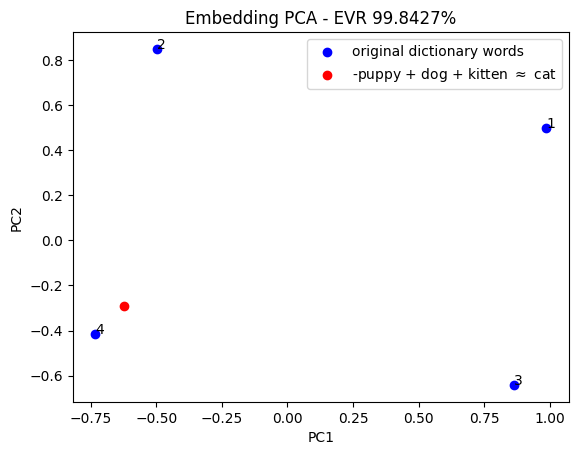

In [40]:
def cosine_similarity(a, b): return a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))
def euclidian_distance(a, b): return np.linalg.norm(a - b)

emb_matrix = np.array([
    [0.87, -0.65, 0.91, -0.7],
    [0.82, 0.9, 0.03, .1],
    [0.02, -0.09, 0.85, 0.92],
    [0.01, -0.01, 0.03, 0.02],
    [0.94, 0.97, 0.95, 0.98],
])
print(f"emb_matrix {emb_matrix.shape}\n{emb_matrix}\n")
names = ["puppy", "dog", "kitten", "cat"]
word_embs = {name: emb_matrix.dot(row) for row, name in zip(np.eye(len(names)), names)}

# puppy - dog = kitten - ?
cat_pred = -word_embs["puppy"] + word_embs["dog"] + word_embs["kitten"]
print(f"red:    {cat_pred}")
print(f"blue 4: {word_embs['cat']}")
print(f"cosine similarity:  {cosine_similarity(cat_pred, word_embs['cat']):.4f}")
print(f"euclidian distance: {euclidian_distance(cat_pred, word_embs['cat']):.4f}")

X = np.append(emb_matrix, cat_pred.reshape(-1,1), axis=1).T
pca_2 = PCA(n_components=2)
pca_2.fit(X)

X_pca_2 = pca_2.transform(X)
pc1 = X_pca_2[:, 0]
pc2 = X_pca_2[:, 1]
evr = np.sum(pca_2.explained_variance_ratio_) * 100

plt.scatter(pc1[:-1], pc2[:-1], color="b", label="original dictionary words")
plt.scatter(pc1[-1], pc2[-1], color="r", label=r"-puppy + dog + kitten $\approx$ cat")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"Embedding PCA - EVR {evr:.4f}%"); plt.legend()

for i in range(X.shape[0] - 1):
    plt.annotate(i+1, (pc1[i], pc2[i]))

#### Learning with Neural Language Model

This technique was created by Yoshua Bengio et al in 2003 and is documented [here](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf). The goal is to learn text embeddings using a relatively simple MLP. First, compute the embedding vectors $e_w$ for a fixed number of words within a sentence. This number of words is a hyperparameter $n$ which influences the number of units in the first MLP layer. Given an embedding dimensionality $D$ and the number of words $n$, the shape of the input matrix $X$ becomes $(D \times n, m)$ where $m$ is the number of $n$-word training examples. The first layer uses hyperbolic tangent activation.

The second and final layer uses a softmax activation, interpreted as an OHE vector selecting the correct next word. As such, it has shape $(V,m)$ where $V$ is the vocabulary size. Both of the MLP layers have traditional weights $W^{[l]}$ and biases $b^{[l]}$ to be trained. Additionally, the embedding matrix $E$ is also trainable.

#### Learning with word2vec

This technique was created by Thomas Mikolov et al in 2013 and is documented [here](https://arxiv.org/pdf/1301.3781). word2vec simpler way to learn embeddings and is an implementation of the "skip gram" method because given some context, it can skip some words in either direction and predict a target word. First, randomly select a context word $c$. If the training corpus is sampled uniformly at random, the context $c$ will be set to common words too often. If the vocabulary is sampled uniformly at random, the opposite problem occurs, with the context $c$ representing less common words. Various heuristics exist to balance these extremes.

Once a context word $c$ is selected, randomly select a target word $t$ within a certain window from the target (say, plus/minus 5 words). The mode will learn the mapping from the context $c$ to the target $t$. The network itself contains only one layer using softmax activation with $V$ units, much like the previous model.

The first computational step is to compute the embedding vector for the context word $e_c$. This feeds into the softmax layer to generate a prediction $\hat{y}$. Both the embedding matrix $E$ plus the softmax weights $W$ and biases $b$ are trainable. The goal isn't the optimize the context/target mapping per se, but to learn good embeddings. Note that $\theta_t$ is chance of target word $o_t$ being the correct answer (label) within the common softmax activation formula.

$$
\begin{aligned}
e_c & = o_c \bullet E \\
\hat{y} & = \text{softmax}(e_c) \\
p(t|c) & = \frac{e^{{\theta_t}^T \bullet e_c}}{\sum_{j=1}^V e^{{\theta_j}^T \bullet e_c}}
\end{aligned}
$$

In practice, this algorithm is computational expensive due to the softmax activation given a large vocabulary $V$. An alternative is to use a hierarchical softmax classifier by determining if the correct word is in the first or last "half" of the vocabularly. These "halves" are not necessarily equal in size and the word order is not necessarily preserved. More common words tend to be shallower in the tree (closer to the ropt), causing the algorithm to run faster as fewer traversals are required. This reduces the algorithm's time complexity from linear to logarithmic.

#### Learning with Negative Sampling

This technique was also created by Thomas Mikolov et al in 2013 and is documented [here](https://arxiv.org/pdf/1310.4546). For a context word $c$ and target word $t$, determine if they are related. Start with positive $y=1$ example, such as $c$=fast and $t$=car. Given the same value of $c$, sample random more target words $t$ from the vocabulary $V$. This sampling is conducted $k$ times, which are negative $y=0$ examples. Therefore, for every 1 positive $y=1$ example, there are $k$ negative examples $y=0$. Negative pairs might be (fast,red) or (fast,their).

Random forms of sampling, either by picking a single word from the vocabulary $V$ or the training corpus, leads to poor target $t$ selection. Instead, this heuristic approach works better in practice whereby $f(w)$ is the observed frequency of a word $w$. It reduces that frequency by raising to a power less than 1 while dividing by all the other frequencies in the vocabulary $V$.

$$
P(w_i) = \frac{f(w_i)^\frac{3}{4}}{\sum_{j=1}^V f(w_j)^\frac{3}{4}}
$$

The input to the model is a context/target pair $(c,t)$ and the predicted output $\hat{y}$ determines whether they are related to eachother. It uses binary classification (logistic regression) to determine that relation. Note that $\theta_t$ is a parameter vector for a given target word $t$. It is like having $V$ different binary classifiers, but only $k+1$ are trained on each iteration. The output isn't important, but as the model trains, $E$ is trainable.

$$
\begin{aligned}
e_c & = o_c \bullet E \\
\hat{y} & = P(y=1|c,t) = \sigma({\theta_t}^T \bullet e_c)
\end{aligned}
$$

#### Learning with GloVe
Short for Global Vectors, this unsupervised learning algorithm was created by Jeffrey Pennington et al in 2014 and is documented [here](https://nlp.stanford.edu/pubs/glove.pdf). This algorithm makes the sampling a of context and target word more explicit.

$X_{i,j}$ counts the number of times a target word $i$ appears in the context of another word $j$. For intuition, the characters $t$ and $c$ map to $i$ and $j$, respectively, from the previous learning algorithms. The cost function $J$ is defined below. Note that $\ln(0)$ is undefined, so whenever there is no relationship between the context $j$ and target $i$ ($X_{i,j}=0$), the algorithm breaks. To prevent this, a heuristic weighting term $f(X_{i,j})$ is implemented which returns 0 when $X_{i,j}=0$, allowing that particular context/target pair to be excluded from the sum. It also serves to give a higher weight to common (aka "stock") words like "the/this/that" while giving a lower weight to uncommon words like "appurtenance".

One example for $f$ is shown below with the exponent set to a number less than 1 to achieve this. The denominator is also variable but was set to 100 in the literature. Whenever the input $X_{i,j}$ is greater than this denominator, the result is limited to the ceiling value of 1. This prevents overweighting of values.

Both $\theta_i$ and $e_j$ can be initialized randomly (uniform), optimized/fitted with gradient descent, then averaged to get the final embedding vector $e_w^{final}$ for a given word $w$. Note that both $e_w$ and $\theta_w$ are trainable parameters in the model, mapping to $e_j$ and $\theta_i$ in the cost function.

$$
\begin{aligned}
f(X_{i,j}) &= 
\begin{cases}
\biggl(\frac{X_{i,j}}{100}\biggr)^{\frac{3}{4}} & x \lt 100 \\
1 & \text{otherwise}
\end{cases} \\
J & = \sum \limits_{i=1}^V \sum \limits_{j=1}^V f(X_{i,j}) \cdot ({\theta_i}^T \bullet e_j + b_i + b_j' - \ln(X_{i,j}))^2 \\
e_w^{final} & = \frac{e_w + \theta_w}{2}
\end{aligned}
$$

### Attention Mechanism

#### Overview
This design quantifies how much attention should be paid to various input time step values $x^{<t'>}$ when generating the output time step values $\hat{y}^{<t>}$. Note that $T_x$ and $T_y$ are often different, so $t'$ is used to measure inputs $x$ while $t$ is used to measure outputs $y$. This allows the model to learn complex grammatical structures found in human languages (and other sequences), allowing it to apply that learned context when making predictions. It is different than a traditional encoder/decoder model as it doesn't have to wait for the entire input to be processed for making predictions.

#### Using RNN Components
This design was developed by Dzmitry Bahdanau et al in 2014 and is documented [here](https://arxiv.org/pdf/1409.0473). Consider a language translation example from English to Chinese whereby the word order is quite different between the languages: $x=$"There is a table in the room.", $y=$"房间里有一张桌子。" Imagine that this was an entire paragraph of text with a sliding "context window", rather than processing everything at once.

There are 3 layers in this architecture:

First, the __pre-attention layer__ uses a bidirectional LSTM, process the input time steps $x^{<t'>}$, the forward/backward activations $a^{<t'-1>}_{forw},a^{<t'+1>}_{back}$, and the forward/backward memory cells $c^{<t'-1>}_{forw},c^{<t'+1>}_{back}$ to generate the current time step's activations $a^{<t'>}$. Note that this output $a^{<t'>}$ is typically implemented as the concatenation of $a^{<t'>}_{forw},a^{<t'>}_{back}$.

$$
\begin{aligned}
a^{<t'>}_{forw} & = \Gamma_{o\_forw} \odot \text{tanh}(c^{<t'>}_{forw}) \\
a^{<t'>}_{back} & = \Gamma_{o\_back} \odot \text{tanh}(c^{<t'>}_{back}) \\
a^{<t'>} & = [a^{<t'>}_{forw}, a^{<t'>}_{back}]
\end{aligned}
$$

Next, the __attention layer__ has several steps. First, process pre-attention activations $a^{<t'>}$ and post-attention activations (states) from the previous step $s^{<t-1>}$ by feeding them into a fully-connected (dense) layer with ReLU activation. This outputs the energies $z^{<t,t'>}$, which is passed into another fully-connected layer with softmax activation, yielding the attention values $\alpha^{<t,t'>}$. Due to softmax, these attention values for a given value of $t$ must sum to 1. Note that this is "alpha" and not "a"; it represents the attention $\hat{y}^{<t>}$ pays to $a^{<t'>}$. That is, how much does Chinese word at time step $t$ ultimately care about the English word at time step $t'$ (although the English word is abstracted through the pre-attention activations). Last, the product of these attentions $\alpha^{<t,t'>}$ and the activations $a^{<t'>}$ are summed, producing the context $o^{<t>}$.

$$
\begin{aligned}
z^{<t,t'>} & = \text{fc\_relu}(a^{<t'>}, s^{<t-1>}) \\
\alpha^{<t,t'>} & = \text{fc\_softmax}(z^{<t,t'>}) = \frac{e^{z^{<t,t'>}}}{\sum^{T_x}_{t'=1} e^{z^{<t,t'>}}} \\
o^{<t>} & = \sum \limits_{t'=1}^{T_x} \alpha^{<t,t'>} \bullet a^{<t'>}
\end{aligned}
$$

Last, __post-attention layer__ uses a unidirectional LSTM, procesing the attention layer's context $o^{<t>}$, previous time step's state $s^{<t-1>}$, and the previous time step's memory cell $c^{<t-1>}$ to generate the current time step's prediction $\hat{y}^{<t>}$. Note that sometimes the previous time step's prediction $\hat{y}^{<t-1>}$ is also passed as input to the next LSTM block.

$$
\begin{aligned}
\tilde{c}^{<t>} & = \text{tanh}(W_c \bullet [s^{<t-1>},o^{<t>}] + b_c) \\
c^{<t>} & = \Gamma_u \odot \tilde{c}^{<t>} + (1-\Gamma_f) \odot c^{<t-1>} \\
s^{<t>} & = \Gamma_o \odot \text{tanh}(c^{<t>}) \\
\hat{y}^{<t>} & = \text{softmax}(W_{y} \bullet s^{<t>} + b_y)
\end{aligned}
$$

#### Using Transformers
This architecture was designed by Ashish Vaswani et al in 2017 and is documented [here](https://arxiv.org/pdf/1706.03762). Although GRU and LSTM blocks within traditional RNNs can communicate state using memory cells at each time step $c^{<t>}$, transformers can retain entire input context using a parallel processing method that more closely resembles a CNN than an RNN.

Assuming each time step is exactly one one word, each word has 3 associated vectors:

  1. __Query__: question asked about the word, $q$
  2. __Key__: relative importance of the input, $k$
  3. __Value__: meaning of the input, $v$

Each of these vectors has it's own set of trainable weights, and like a typically RNN, are shared across all time steps:

$$
\begin{aligned}
q^{<t>} & = W^q \bullet x^{<t>} \\
k^{<t>} & = W^k \bullet x^{<t>} \\
v^{<t>} & = W^v \bullet x^{<t>}
\end{aligned}
$$

Note that the query/key dot product $q^{<t>} \bullet k^{<i>}$ is similar to the role of $\alpha^{<t,t'>}$ from the previous section. However, the manner in which the two results are computed differs significantly. The final multiplication by the value $v^{<i>}$ is similar to the role of $a^{<t'>}$ from the previous section.

Given the query vector $q^{<t>}$ for a given word, multiply it by all possible $k$ vectors for all words (including itself), scale by $d_k$ (dimensionality of $k$, or context size), then apply softmax. Said another way, take the dot product of all query/key pairs; the largest results appear when the 2 vectors are most closely aligned. When the dot products are large, it can be said that the key "attends to" the query (i.e. it answers the question asked). The size of matrix is ${d_k}^2$, which is why increasing the context size in transformer models is expensive.

The key is used to provide the best "answer" to a query, while the value contains the actual information used to update the embedding. Last, multiply the softmax result the value $v$ for the words (corresponding with $k$) and sum the results. The equations below are equivalent with the latter being the vectorized version from the literature. This is called "self-attention".

$$
\begin{aligned}
A^{<t>}(q^{<t>},K,V) & = \sum_i \frac{e^{\frac{1}{\sqrt{d_k}} \cdot (q^{<t>} \bullet k^{<i>})}}
{\sum_j e^{\frac{1}{\sqrt{d_k}} \cdot (q^{<t>} \bullet k^{<j>})}} \bullet v^{<i>} \\
A(Q,K,V) & = \text{softmax}\bigl(\frac{Q \bullet K^T}{\sqrt{d_k}}\bigr) \bullet V
\end{aligned}
$$

In a sentence, the query is compared (dot product) to the key of each word to measure relatedness, and after applying softmax, is multiplied by the value to compute the attention value. This calculation is for a single head of attention. Larger transformer models will employ multi-head attention using a head-specific set of weight matrices for the query, key, and value vectors. The attention equation remains unchanged, but the aforementioned vectors are scaled by the per-head weight matrices $W_h$. Each head is like a different feature, which provides a richer representation to the model. The individual per-head attention matricies are concatenated together and multiplied by a final output weight matrix $W_o$ to compute the total attention.

$$
A(Q,K,V) = \text{concat}(A_h(W^Q_h \bullet q^{<t>}, W^K_h \bullet k^{<t>}, W^V_h \bullet v^{<t>})) \bullet W_o 
$$

The transformer network consists of an encoder and decoder. First, the input time steps $x^{<t>}$ are fed into the encoder tot have their Q/K/V values computed.  Then, the attention output values are passed to a small feed forward neural network (MLP), using ReLU activations at intermediate layers and linear (no) activation at the final layer. The results are passed back into the encoder block about 6 times (i.e. there are 6 heads).

The decoder takes in a single input token, typically the "start of sentence" `<sos>` token, which is processed by a multi-head attention block. Only the $Q$ output is passed onwards to another multi-head attention block, which combines with the $K$ and $V$ outputs from the encoder's feed forward MLP. This allows the decoder's input (words translated to the target language so far) to form the basis of the query while the encoder's output (words from the source language) to provide context about what target language word should come next. Next, there is another feed-forward MLP (similar architecture to that seen in the encoder) to process the attention values and predict the next word in the sentence. The decoder process also loops onto itself about 6 times. Also, the predicted word $\hat{y}^{<t>}$ feeds back into the decoder block, which is generated by a final dense layer using softmax activation.

To optimize this architecture, the original input time steps $x^{<t>}$ passed into the encoder and the translated words $\hat{y}^{<t>}$ fed into the decoder will have positional encoding. This tells the model where in the sentence a specific word is location. This is required because the transformer consumes all the inputs at once (like a CNN) and thus loses the position context. Because RNNs process time steps in series, position encoding is unnecessary in that architecture.

The position embedding at a given time step $p^{<t>}$ has the same dimensions as the text embedding associated with $x$ or $\hat{y}$. Using trigonometric functions sine and cosine, the resulting position embeddings $p^{<t>}$ are unique for each word. The value $k$ represents the integer position of a word starting at 0, while $i$ iterates over the dimensions from 0 to $d$. When $i$ is even (modulus is 0), use sine, otherwise use cosine. Using floor division by 2 ensures that each value of $i$ is repeated, such as `0, 0, 1, 1, 2, 2`, allowing both sine and cosine to process each value of $i$. The scaling value $n$ is typically set to 10,000 in the literature. Because the text embedding of $x^{<t>}$ and its corresponding position emmbedding $p^{<t>}$ are the same shape, they are summed together element-wise and passed into the encoder.

$$
p^{<t>} =
\begin{cases}
\sin\left(\frac{k}{{n}^{2i \div d}}\right) & i \bmod 2 = 0 \,\text{(even)} \\
\cos\left(\frac{k}{{n}^{2i \div d}}\right) & i \bmod 2 = 1 \,\text{(odd)}
\end{cases}
$$

The snippet below implements this process and attempts to visualize it. Note that `n=5`, a small number, for easy viewing. Increasing this number will rapidly increase the wavelength of the curves, making them hard to differentiate in small subplots. The text embedding (and therefore the position embedding) both have $d$ dimensions (`d=8` here), and as this increases, the curve's wavelengths also increase. The graphs depict position embeddings for several sample words, marking the points for each word in each dimension using a different shape.

[[ 0.    1.    0.    1.    0.    1.    0.    1.  ]
 [ 0.91 -0.42  0.97  0.23  0.78  0.63  0.56  0.83]
 [-0.76 -0.65  0.45 -0.89  0.98 -0.22  0.93  0.37]
 [-0.28  0.96 -0.76 -0.64  0.44 -0.9   0.98 -0.22]
 [ 0.99 -0.15 -0.8   0.6  -0.42 -0.91  0.68 -0.73]]


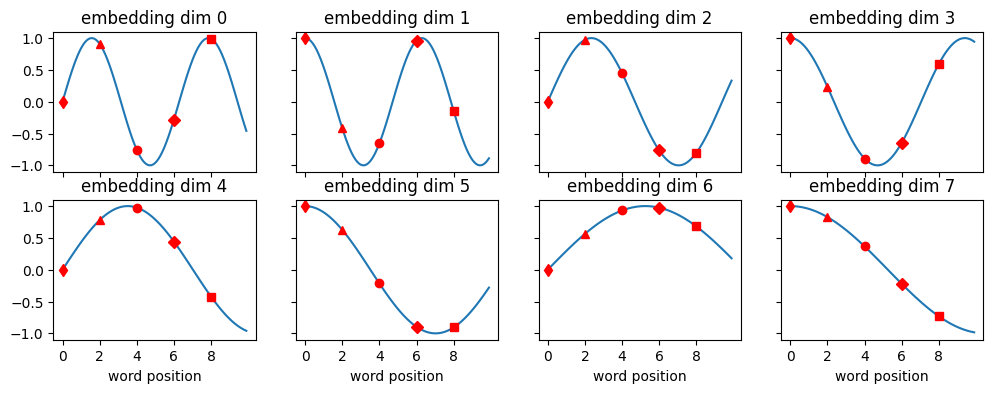

In [137]:
dims = 8
rng_many = (0, 10, 0.1)
rng_few = (0, 10, 2)

def positional_encoding(k, d, n=10000):
    i = np.arange(d) // 2
    angle_rads = k / n ** ((2 * i) / d)
    angle_rads[0::2] = np.sin(angle_rads[0::2])
    angle_rads[1::2] = np.cos(angle_rads[1::2])
    return angle_rads

pes = np.array([positional_encoding(k, dims, n=5) for k in np.arange(*rng_many)])
print(np.round(pes[::20], 2))

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)
fig.set_size_inches(12, 4)
x = np.arange(*rng_many)
for row in range(ax.shape[0]):
    for col in range(ax.shape[1]):
        i = row * ax.shape[1] + col
        ax[row, col].set_title(f"embedding dim {i}")
        ax[row, col].set_xticks(range(*rng_few))
        if row == ax.shape[0] - 1:
            ax[row, col].set_xlabel("word position")
        ax[row, col].plot(x, pes[:, i])
        for k, marker in zip(range(*rng_few), "d^oDs"):
            ax[row, col].plot(k, y := pes[k*10, i], f"r{marker}")
            # ax[row, col].annotate(f" k={k}", (k, y))

In [41]:
print("EOF")

EOF
